# ML Project - House Price Advanced Regression Techniques

## 1. import data set for train and test

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [3]:
train_df = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')

In [4]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
test_df = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')

In [6]:
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

## 2. Feature selection

In [7]:
train_df.shape

(1460, 81)

- Since there are 80 variables to fit 1 response variable, SalePrice, we need to perform feature selection to minimize the complexity and noise of a regression model. First, let's remove the 'ID' column and get a heatmap for correlation within train data set features. We can focus on the SalePrice vs the other features.

In [8]:
train_noid = train_df.drop(columns = ['Id'])

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

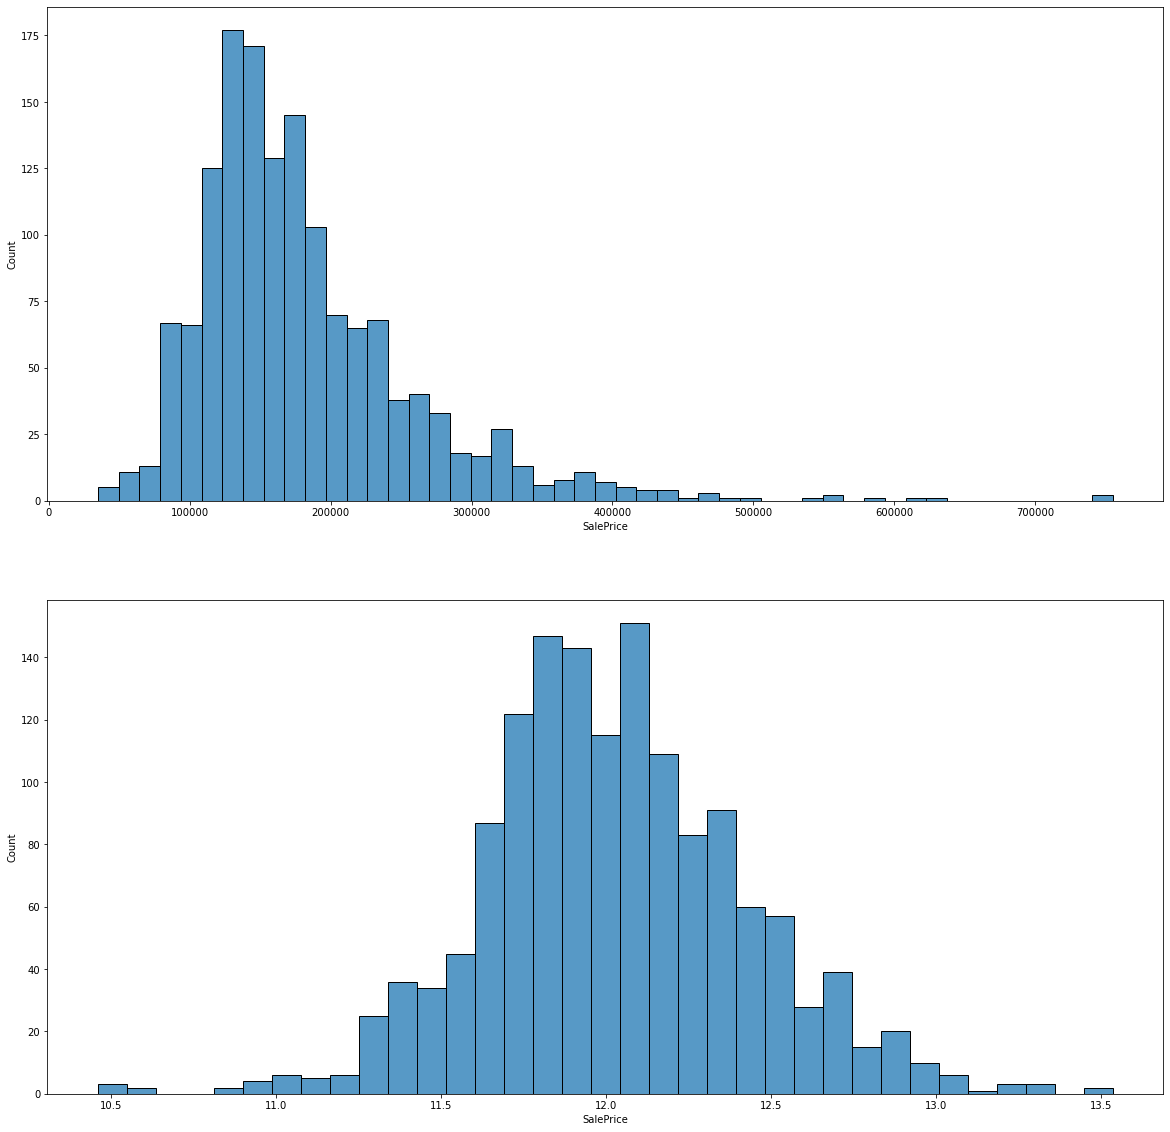

In [10]:
fig, ax =plt.subplots(2,1, figsize=(20,20))
sns.histplot(train_noid['SalePrice'], ax = ax[0])
sns.histplot(np.log(train_noid['SalePrice']), ax = ax[1]);

In [11]:
from matplotlib import colors

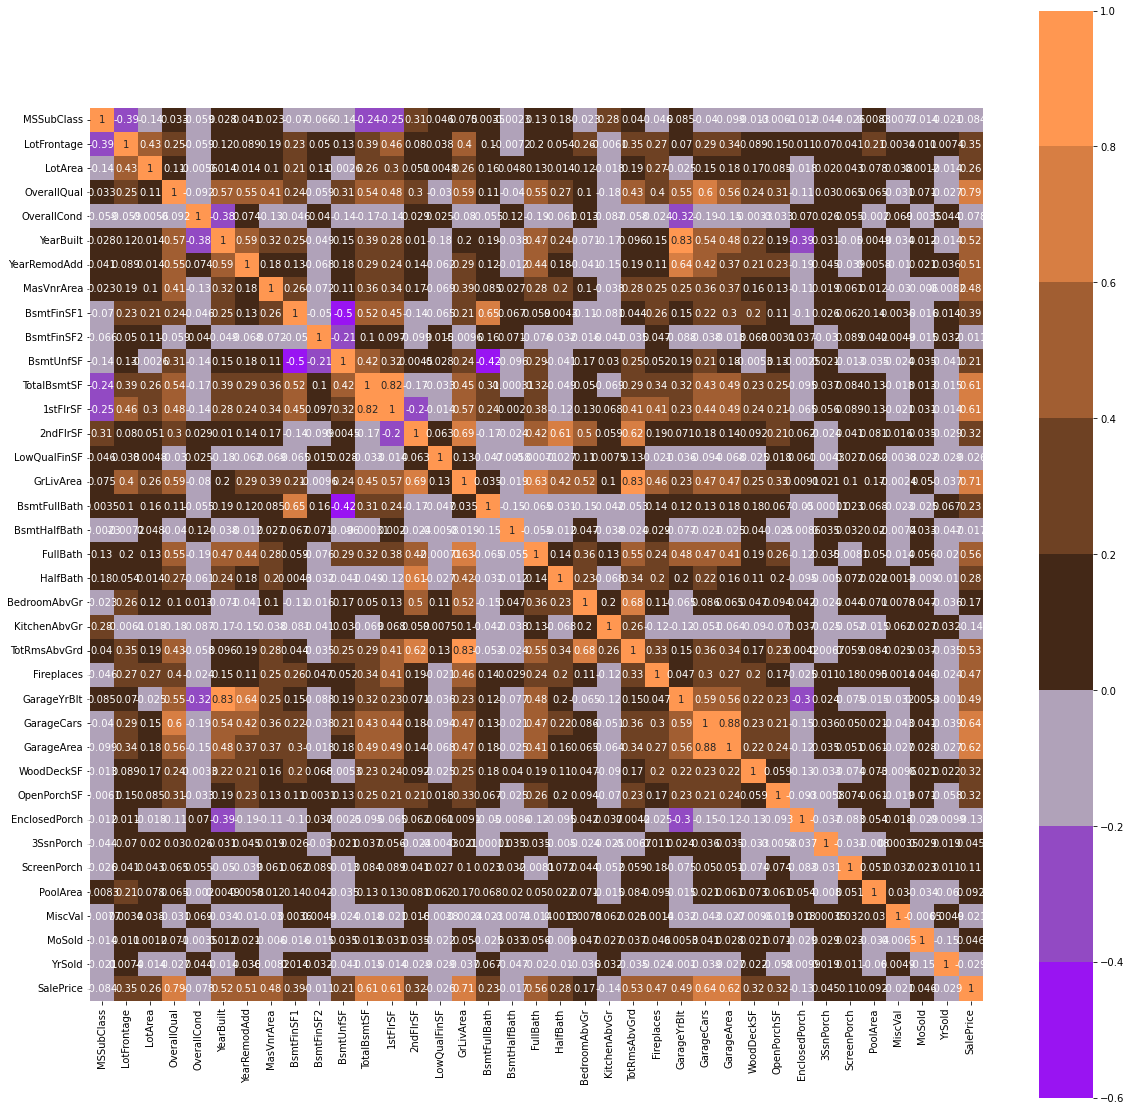

In [12]:
cmap = colors.ListedColormap(["#9914F2", "#924AC3", "#B0A2B9", "#432817", "#6E4123", "#A15E32", "#D77E43", "#FF9751"])
train_corr = train_noid.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(train_corr, annot=True, cmap=cmap, vmin= -.6, square=True);

- Let's take a look some high correlated features.  
1) OverallQual: Rates the overall material and finish of the house. There's no reason to discard it.  
2) GrLivArea: Above grade (ground) living area square feet. It makes sense that people would like to consider it when they buy a house.  
3) GarageCars: Size of garage in car capacity. People may have multiple cars, so it could be important. Note that some observations have 0.  
4) GarageArea: Size of garage in square feet. It is the same of the GarageCars. The heatmap also shows that GarageCars and GarageArea have a close correlation (0.8824). Note that some observations have 0.   
5) TotalBsmtSF: Total square feet of basement area. It's important for buying a house. Note that some observations have 0.  
6) 1stFlrSF: First Floor square feet. It may have some overlapping with 'GrLivArea'. Later we should do feature engineering for this.   
7) FullBath: The number of full bathrooms above grade. If you want to buy a bigger house, it may be important to have multiple full bathrooms.  
8) TotRmsAbvGrd: Total rooms above grade (does not include bathrooms). It depends on the family size. It's an important factor.  
9) YearBuilt: Original construction date. It make sense that the year built is related to the house price.  
10) YearRemodAdd: Remodel date (same as construction date if no remodeling or additions). It's pretty much duplicated as YearBuilt, but newer version. I would like to choose this feature only and remove the YearBuilt because if the house was in remodeling, I would assume it's quite same as newly built at the moment.  
- But, can we ignore other features? we should do invest for the nominal features too.
- Also, we need some feature engineering to make data simple if we can.

- Actually, there are many features having 0. For example, only 7 houses are having pool area and the other are not. However, it may affect the house price. Therefore, I would like to change some features as yes or no.

## 3. Preprocessing

- Since some values were recorded as NA or None, we should separated it between missing and not available

In [13]:
train_noid.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [14]:
train_noid.isna().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

PoolQC, MiscFeature, Alley, Fence, FireplaceQu, and LotFrontage have NA values but these are a categorical record. So need to replace NA to No Pool or something like this

In [15]:
train_pp = train_noid

In [16]:
# train_pp[train_pp['GarageFinish'].isna()].index == train_pp[train_pp['GarageYrBlt'].isna()].index

In [17]:
sum(train_pp['GarageArea']==0)

81

In [18]:
train_pp['GarageFinish'].isna().sum()

81

In [19]:
# check if NA is No Garage by compare the actual garage area
sum(train_pp[train_pp['GarageFinish'].isna()].index == train_pp[train_pp['GarageArea'] == 0].index)

81

In [20]:
# GarageFinish vs GarageCond, GarageType, GarageQual, GarageYrBlt are also all True
for col in ['GarageCond','GarageType','GarageQual','GarageYrBlt']:
    print(sum(train_pp[train_pp['GarageFinish'].isna()].index == train_pp[train_pp[col].isna()].index))

81
81
81
81


- Since GarageYrBlt is in numerical, NA can't be replaced to No Garage (in string). This column is pending to be removed. 
- If there's a no good way to deal with the NA values, maybe remove it

In [21]:
sum(train_pp['TotalBsmtSF']==0)

37

In [22]:
train_pp['BsmtFinType1'].isna().sum()

37

In [23]:
# check if NA is No Basement by compare the actual basement area
sum(train_pp[train_pp['BsmtFinType1'].isna()].index == train_pp[train_pp['TotalBsmtSF'] == 0].index)

37

In [24]:
# BsmtFinType1 vs BsmtQual, BsmtCond are also all True
for col in ['BsmtQual','BsmtCond']:
    print(sum(train_pp[train_pp['BsmtFinType1'].isna()].index == train_pp[train_pp[col].isna()].index))

37
37


In [25]:
train_pp[train_pp['BsmtFinType1'].isna()].index

Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412],
           dtype='int64')

In [26]:
train_pp[train_pp['BsmtFinType2'].isna()].index

Int64Index([  17,   39,   90,  102,  156,  182,  259,  332,  342,  362,  371,
             392,  520,  532,  533,  553,  646,  705,  736,  749,  778,  868,
             894,  897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179,
            1216, 1218, 1232, 1321, 1412],
           dtype='int64')

In [27]:
train_pp[train_pp['BsmtExposure'].isna()].index

Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  948,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179,
            1216, 1218, 1232, 1321, 1412],
           dtype='int64')

- As comparing the indices, index number 332 and 948 say it has no basement while there's actual TotalBsmtSf is not 0
- So, remove these two observations as the record is wrong

In [28]:
train_pp = train_pp.drop([332, 948])

In [29]:
# NA for Masonry Veneer is actually missing data, None is for not exist
# Delete these 8 points as well since we can't fillna for the categorical value
# check the NA observations are the same index
sum(train_pp[train_pp['MasVnrType'].isna()].index == train_pp[train_pp['MasVnrArea'].isna()].index)

8

In [30]:
train_pp[train_pp['MasVnrType'].isna()].index

Int64Index([234, 529, 650, 936, 973, 977, 1243, 1278], dtype='int64')

In [31]:
train_pp = train_pp.drop([234, 529, 650, 936, 973, 977, 1243, 1278])

In [32]:
train_pp[train_pp['Electrical'].isna()].index

Int64Index([1379], dtype='int64')

In [33]:
# Delete this 1 point since we can't fillna for the categorical value
train_pp = train_pp.drop([1379])

- The data is now with no NA values. 
- Total 11 observations were removed
- Other NA values were corrected as another categorical value to remove a confusion for modeling

In [34]:
train_pp.loc[train_pp['PoolQC'].isna(), 'PoolQC'] = 'No Pool'
train_pp.loc[train_pp['MiscFeature'].isna(), 'MiscFeature'] = 'No Misc'
train_pp.loc[train_pp['Alley'].isna(), 'Alley'] = 'No Alley'
train_pp.loc[train_pp['Fence'].isna(), 'Fence'] = 'No Fence'
train_pp.loc[train_pp['FireplaceQu'].isna(), 'FireplaceQu'] = 'No Fireplace'
train_pp.loc[train_pp['LotFrontage'].isna(), 'LotFrontage'] = 0
train_pp.loc[train_pp['GarageFinish'].isna(), ['GarageFinish','GarageCond','GarageType','GarageQual']] = 'No Garage'
train_pp.loc[train_pp['BsmtFinType1'].isna(), ['BsmtFinType1','BsmtQual','BsmtCond','BsmtFinType2','BsmtExposure']] = 'No Basement'

In [35]:
train_pp.isna().sum().sort_values(ascending=False)

GarageYrBlt    81
MSSubClass      0
MSZoning        0
GarageType      0
FireplaceQu     0
               ..
MasVnrArea      0
MasVnrType      0
Exterior2nd     0
Exterior1st     0
SalePrice       0
Length: 80, dtype: int64

In [36]:
train_pp

MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
0             60       RL         65.0     8450   Pave  No Alley      Reg   
1             20       RL         80.0     9600   Pave  No Alley      Reg   
2             60       RL         68.0    11250   Pave  No Alley      IR1   
3             70       RL         60.0     9550   Pave  No Alley      IR1   
4             60       RL         84.0    14260   Pave  No Alley      IR1   
...          ...      ...          ...      ...    ...       ...      ...   
1455          60       RL         62.0     7917   Pave  No Alley      Reg   
1456          20       RL         85.0    13175   Pave  No Alley      Reg   
1457          70       RL         66.0     9042   Pave  No Alley      Reg   
1458          20       RL         68.0     9717   Pave  No Alley      Reg   
1459          20       RL         75.0     9937   Pave  No Alley      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0     

## 4. Feature Engineering

- As we reviewed the features, we need to perform feature engineering for some variables.   
- First of all, let's remove duplicated features and mark features that may be less important for now.
- Also, can you adjust/fix the feature after you purchase the house? would be a question for feature engineering

1) MSSubClass - related to totalSF and bulit year : to be removed  
2) MSZoning - related the purpose and density : to be kept, categorical of 8  
3) LotFrontage - less important: to be removed, numerical  
4) LotArea - bigger area, more spacious : to be kept, numerical  
5) Street - less important : pending to remove, categorical of 2  
6) Alley - less important : pending to remove, categorical of 3  
7) LotShape - less important : pending to remove, categorical of 4, could be reduced as reg vs irreg  
8) LandContour - flatness of the house which may be a factor : to be kept, categorical of 4, could be reduced as flat vs not flat +++ to be removed bc similar to LandSlope  
9) Utilities - public or not, to be kept, categorical of 4, could be reduced as all public vs partial  
10) LotConfig - less important : pending to remove, categorical of 5  
11) LandSlope - related to LandContour, to be kept, categorical of 3  
12) Neighborhood - important, to be kept, categorical of 25  
13) Condition1 - less important, pending to remove, categorical of 9  
14) Condition2 - less important, to be removed  
15) BldgType - maybe important, pending to remove, categorical of 5  
16) HouseStyle - it's related to the total SF, to be removed  
17) OverallQual - important, to be kept, categorical of 10  
18) OverallCond - important but similar to OverallQual?, pending to remove, categorical of 10  
19) YearBuilt - important but replaced to remodeling year, to be removed, numerical  
20) YearRemodAdd - important, to be kept, numerical  
21) RoofStyle - less important, to be removed  
22) RoofMatl - less important, to be removed  
23) Exterior1st - less important, to be removed  
24) Exterior2nd - less important, to be removed  
25) MasVnrType - less important, to be removed  
26) MasVnrArea - less important, to be removed  
27) ExterQual - less imporatnt, to be removed  
28) ExterCond - less important, to be reomoved  
29) Foundation - less imporatnat, to be removed  
30) BsmtQual - height of the basement, pending to remove, categorical of 6, could be reduced as >= typical vs shorter vs na  
31) BsmtCond - condition of the basement, to be kept, categorical of 6, could be reduced as >= typical vs poor vs na  
32) BsmtExposure - less important, to be removed  
33) BsmtFinType1 - less important, to be removed  
34) BsmtFinSF1 - square feet, to be replaced to TotalBsmtSF  
35) BsmtFinType2 - less important, to be removed  
36) BsmtFinSF2 - square feet, to be replaced to TotalBsmtSF  
37) BsmtUnfSF - square feet, to be replaced to TotalBsmtSF  
38) TotalBsmtSF - Total SF for basement area, to be kept, numerical, 0 means na  
39) Heating - type of heating, pending to remove, categorical of 6  
40) HeatingQC - quality of heating, to be removed, categorical of 5  
41) CetralAir - yes or no, to be kept, categorical of 2  
42) Electrical - electrical system, pending to remove, categorical of 5  
43) 1stFlrSF - SF of first floor, to be replaced to GrLivArea  
44) 2ndFlrSF - SF of second floor, to be replaced to GrLivArea  
45) LowQualFinSF - Low quality finished square feet (all floors), to be replaced to GrLivArea  
46) GrLivArea - above ground living area SF, to be kept, numerical  
47) BsmtFullBath - number of fullbath in basement, to be replaced to TotBathNum (new feature)  
48) BsmtHalfBath - number of halfbath in basement, to be replaced to TotBathNum (new feature)  
49) FullBath - number of fullbath above ground, to be replaced to TotBathNum (new feature)  
50) HalfBath - number of halfbath above ground, to be replaced to TotBathNum (new feature)  
51) Bedroom - number of bedroom above ground, to be replaced to TotRmsAbvGrd, numerical  
52) Kitchen - number of kitchen above ground, to be replaced to TotRmsAbvGrd, numerical, one observation has 0 (no kitchen?)  
53) KitchenQual - kitchen quality, to be removed  
54) TotRmsAbvGrd - generally, it is agreed that bedrooms, living rooms, dens, kitchens, and dining rooms are counted as rooms. not bathrooms, to be kept, numerical  
55) Functional - home functionality that maybe similar to overall quality, to be removed  
56) Fireplaces - number of fireplaces, pending to remove, numerical  
57) FireplaceQu - fire place quality, to be removed  
58) GarageType - garage location, to be kept, categorical of 7  
59) GarageYrBlt - year garage built similar to yrbuilt or yrremodadd, to be removed  
60) GarageFinish - interior finish of the garage, to be removed  
61) GarageCars - size of garage in car capacity, to be replaced to GarageArea  
62) GarageArea - size of garage SF, to be kept, numerical  
63) GarageQual - to be removed  
64) GarageCond - to be removed  
65) PavedDrive - Paved driveway, pending to remove, categorical of 3  
66) WoodDeckSF - wooddeck SF, to be replaced to TotOtherSF (new feature)  
67) OpenPorchSF - openporch SF, to be replaced to TotOtherSF (new feature)  
68) EnclosedPorch - enclosed porch SF, to be replaced to TotOtherSF (new feature)  
69) 3SsnPorch - three season porch SF, to be replaced to TotOtherSF (new feature)  
70) ScreenPorch - screen porch SF, to be replaced to TotOtherSF (new feature)  
71) PoolArea - pool area SF, to be replaced to TotOtherSF (new feature)  
72) PoolQC - pool quality, to be removed  
73) Fence - fence quality, pending to remove, categorical of 5, it has NA  
74) MiscFeature - miscellaneous feature, to be removed  
75) MiscVal - value of miscellaneous feature, pending to remove, numerical  
76) MoSold - month sold(MM), pending to remove, categorical  
77) YrSold - year sold(YYYY), pending to remove, numerical  
78) SaleType - type of sale, to be removed  
79) SaleCondition - condition of sale, pending to remove, categorical of 6  

### These steps should be repeated in the test dataset as well
- Let's remove some features first that to be removed  
- Then, create new features and remove the original features  

### Categorical features first

In [37]:
train_fe = train_pp

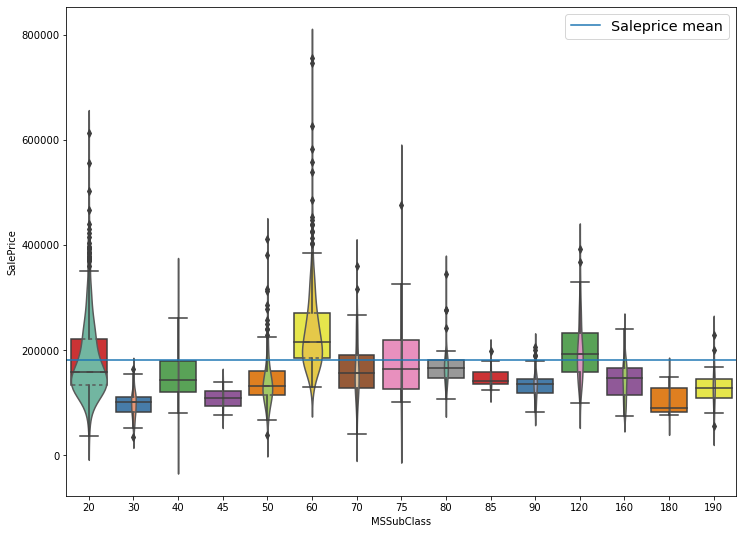

In [38]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='MSSubClass', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="MSSubClass", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [39]:
# to see what records in MSSubClass have the correlation higher than 0.3 no matter positive or negative with the logSalePrice 
abs(pd.concat([pd.get_dummies(train_fe['MSSubClass']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
60           0.381115
30           0.238898
50           0.156017
90           0.114367
160          0.112653
190          0.093395
45           0.082924
180          0.082261
120          0.064133
85           0.048840
20           0.037839
70           0.036099
80           0.027482
40           0.016203
75           0.015849
Name: SalePrice, dtype: float64

- As a result, let's keep the category 60, 2-STORY 1946 & NEWER, as a feature

In [40]:
train_fe = pd.concat([train_fe, pd.get_dummies(train_fe['MSSubClass'])[[30, 45, 60, 180]].rename(columns = {30:"MSSC_1str_older", 45:"MSSC_1h_unf", 60:'MSSC_2str_newer', 180:'MSSC_Pud_Multi'})], axis = 1)
train_fe = train_fe.drop(columns=['MSSubClass'])
train_fe

MSZoning  LotFrontage  LotArea Street     Alley LotShape LandContour  \
0          RL         65.0     8450   Pave  No Alley      Reg         Lvl   
1          RL         80.0     9600   Pave  No Alley      Reg         Lvl   
2          RL         68.0    11250   Pave  No Alley      IR1         Lvl   
3          RL         60.0     9550   Pave  No Alley      IR1         Lvl   
4          RL         84.0    14260   Pave  No Alley      IR1         Lvl   
...       ...          ...      ...    ...       ...      ...         ...   
1455       RL         62.0     7917   Pave  No Alley      Reg         Lvl   
1456       RL         85.0    13175   Pave  No Alley      Reg         Lvl   
1457       RL         66.0     9042   Pave  No Alley      Reg         Lvl   
1458       RL         68.0     9717   Pave  No Alley      Reg         Lvl   
1459       RL         75.0     9937   Pave  No Alley      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
0       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
1       AllPub       FR2       Gtl      Veenker      Feedr       Norm   
2       AllPub    Inside       Gtl      CollgCr       Norm       Norm   
3       AllPub    Corner       Gtl      Crawfor       Norm       Norm   
4       AllPub       FR2       Gtl      NoRidge       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1455    AllPub    Inside       Gtl      Gilbert       Norm       Norm   
1456    AllPub    Inside       Gtl       NWAmes       Norm       Norm   
1457    AllPub    Inside       Gtl      Crawfor       Norm       Norm   
1458    AllPub    Inside       Gtl        NAmes       Norm       Norm   
1459    AllPub    Inside       Gtl      Edwards       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0        1Fam     2Story            7            5       2003          2003   
1        1Fam     1Story            6            8       1976          1976   
2        1Fam     2Story            7            5       2001          2002   
3        1Fam     2Story            7            5       1915          1970   
4        1Fam     2Story            8            5       2000          2000   
...       ...        ...          ...          ...        ...           ...   
1455     1Fam     2Story            6            5       1999          2000   
1456     1Fam     1Story            6            6       1978          1988   
1457     1Fam     2Story            7            9       1941          2006   
1458     1Fam     1Story            5            6       1950          1996   
1459     1Fam     1Story            5            6       1965          1965   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0        Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0   
1        Gable  CompShg     MetalSd     MetalSd       None         0.0   
2        Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0   
3        Gable  CompShg     Wd Sdng     Wd Shng       None         0.0   
4        Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0   
...        ...      ...         ...         ...        ...         ...   
1455     Gable  CompShg     VinylSd     VinylSd       None         0.0   
1456     Gable  CompShg     Plywood     Plywood      Stone       119.0   
1457     Gable  CompShg     CemntBd     CmentBd       None         0.0   
1458       Hip  CompShg     MetalSd     MetalSd       None         0.0   
1459     Gable  CompShg     HdBoard     HdBoard       None         0.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0           Gd        TA      PConc       Gd       TA           No   
1           TA        TA     CBlock       Gd       TA           Gd   
2           Gd        TA      PConc       Gd       TA           Mn   
3           TA        TA     BrkTil       TA       Gd           No   
4           Gd 

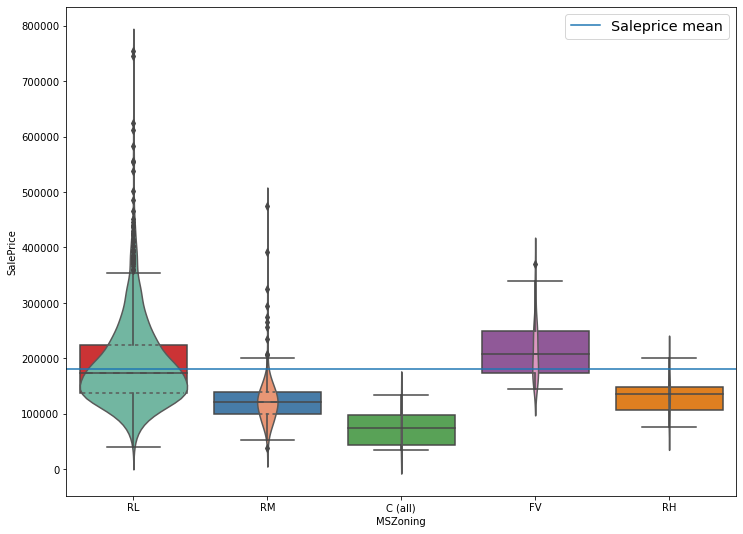

In [41]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='MSZoning', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="MSZoning", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [42]:
# to see what records in MSZoning have the correlation higher than 0.3 no matter positive or negative with the logSalePrice 
abs(pd.concat([pd.get_dummies(train_fe['MSZoning']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
RM           0.287799
RL           0.246009
C (all)      0.111458
FV           0.091574
RH           0.065280
Name: SalePrice, dtype: float64

- No record has correlation higher than 0.3 so discard MSZoning column

In [43]:
train_fe = train_fe.drop(columns=['MSZoning'])
train_fe

LotFrontage  LotArea Street     Alley LotShape LandContour Utilities  \
0            65.0     8450   Pave  No Alley      Reg         Lvl    AllPub   
1            80.0     9600   Pave  No Alley      Reg         Lvl    AllPub   
2            68.0    11250   Pave  No Alley      IR1         Lvl    AllPub   
3            60.0     9550   Pave  No Alley      IR1         Lvl    AllPub   
4            84.0    14260   Pave  No Alley      IR1         Lvl    AllPub   
...           ...      ...    ...       ...      ...         ...       ...   
1455         62.0     7917   Pave  No Alley      Reg         Lvl    AllPub   
1456         85.0    13175   Pave  No Alley      Reg         Lvl    AllPub   
1457         66.0     9042   Pave  No Alley      Reg         Lvl    AllPub   
1458         68.0     9717   Pave  No Alley      Reg         Lvl    AllPub   
1459         75.0     9937   Pave  No Alley      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0       Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1          FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2       Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3       Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4          FR2       Gtl      NoRidge       Norm       Norm     1Fam   
...        ...       ...          ...        ...        ...      ...   
1455    Inside       Gtl      Gilbert       Norm       Norm     1Fam   
1456    Inside       Gtl       NWAmes       Norm       Norm     1Fam   
1457    Inside       Gtl      Crawfor       Norm       Norm     1Fam   
1458    Inside       Gtl        NAmes       Norm       Norm     1Fam   
1459    Inside       Gtl      Edwards       Norm       Norm     1Fam   

     HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0        2Story            7            5       2003          2003     Gable   
1        1Story            6            8       1976          1976     Gable   
2        2Story            7            5       2001          2002     Gable   
3        2Story            7            5       1915          1970     Gable   
4        2Story            8            5       2000          2000     Gable   
...         ...          ...          ...        ...           ...       ...   
1455     2Story            6            5       1999          2000     Gable   
1456     1Story            6            6       1978          1988     Gable   
1457     2Story            7            9       1941          2006     Gable   
1458     1Story            5            6       1950          1996       Hip   
1459     1Story            5            6       1965          1965     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     CompShg     MetalSd     MetalSd       None         0.0        TA   
2     CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4     CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   
...       ...         ...         ...        ...         ...       ...   
1455  CompShg     VinylSd     VinylSd       None         0.0        TA   
1456  CompShg     Plywood     Plywood      Stone       119.0        TA   
1457  CompShg     CemntBd     CmentBd       None         0.0        Ex   
1458  CompShg     MetalSd     MetalSd       None         0.0        TA   
1459  CompShg     HdBoard     HdBoard       None         0.0        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0           TA      PConc       Gd       TA           No          GLQ   
1           TA     CBlock       Gd       TA           Gd          ALQ   
2           TA      PConc       Gd       TA           Mn          GLQ   
3           TA     BrkTil       TA       Gd           No      

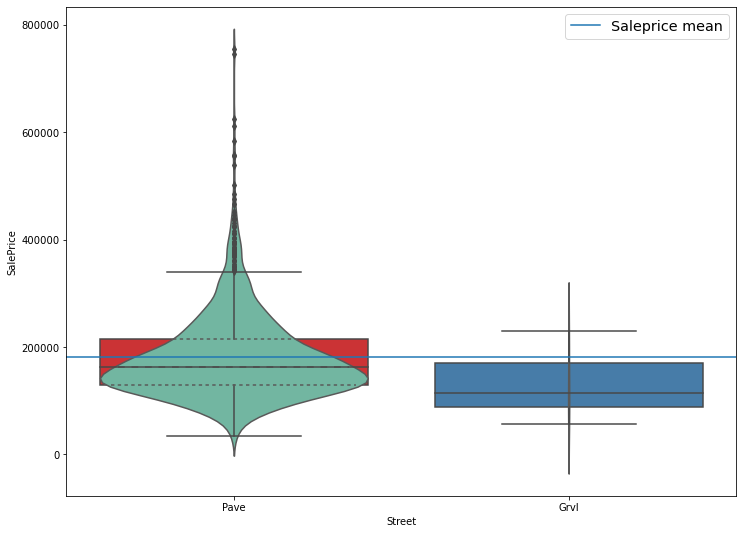

In [44]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='Street', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="Street", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [45]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['Street']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
Grvl         0.040949
Pave         0.040949
Name: SalePrice, dtype: float64

In [46]:
# no features has high correlation
train_fe = train_fe.drop(columns=['Street'])
train_fe

LotFrontage  LotArea     Alley LotShape LandContour Utilities LotConfig  \
0            65.0     8450  No Alley      Reg         Lvl    AllPub    Inside   
1            80.0     9600  No Alley      Reg         Lvl    AllPub       FR2   
2            68.0    11250  No Alley      IR1         Lvl    AllPub    Inside   
3            60.0     9550  No Alley      IR1         Lvl    AllPub    Corner   
4            84.0    14260  No Alley      IR1         Lvl    AllPub       FR2   
...           ...      ...       ...      ...         ...       ...       ...   
1455         62.0     7917  No Alley      Reg         Lvl    AllPub    Inside   
1456         85.0    13175  No Alley      Reg         Lvl    AllPub    Inside   
1457         66.0     9042  No Alley      Reg         Lvl    AllPub    Inside   
1458         68.0     9717  No Alley      Reg         Lvl    AllPub    Inside   
1459         75.0     9937  No Alley      Reg         Lvl    AllPub    Inside   

     LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0          Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1          Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2          Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3          Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4          Gtl      NoRidge       Norm       Norm     1Fam     2Story   
...        ...          ...        ...        ...      ...        ...   
1455       Gtl      Gilbert       Norm       Norm     1Fam     2Story   
1456       Gtl       NWAmes       Norm       Norm     1Fam     1Story   
1457       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
1458       Gtl        NAmes       Norm       Norm     1Fam     1Story   
1459       Gtl      Edwards       Norm       Norm     1Fam     1Story   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0               7            5       2003          2003     Gable  CompShg   
1               6            8       1976          1976     Gable  CompShg   
2               7            5       2001          2002     Gable  CompShg   
3               7            5       1915          1970     Gable  CompShg   
4               8            5       2000          2000     Gable  CompShg   
...           ...          ...        ...           ...       ...      ...   
1455            6            5       1999          2000     Gable  CompShg   
1456            6            6       1978          1988     Gable  CompShg   
1457            7            9       1941          2006     Gable  CompShg   
1458            5            6       1950          1996       Hip  CompShg   
1459            5            6       1965          1965     Gable  CompShg   

     Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0        VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1        MetalSd     MetalSd       None         0.0        TA        TA   
2        VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3        Wd Sdng     Wd Shng       None         0.0        TA        TA   
4        VinylSd     VinylSd    BrkFace       350.0        Gd        TA   
...          ...         ...        ...         ...       ...       ...   
1455     VinylSd     VinylSd       None         0.0        TA        TA   
1456     Plywood     Plywood      Stone       119.0        TA        TA   
1457     CemntBd     CmentBd       None         0.0        Ex        Gd   
1458     MetalSd     MetalSd       None         0.0        TA        TA   
1459     HdBoard     HdBoard       None         0.0        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0         PConc       Gd       TA           No          GLQ         706   
1        CBlock       Gd       TA           Gd          ALQ         978   
2         PConc       Gd       TA           Mn          GLQ         486   
3        BrkTil   

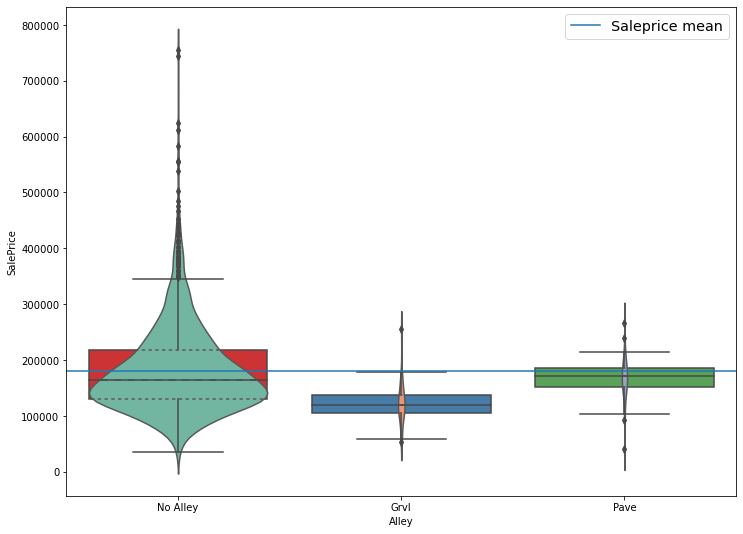

In [47]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='Alley', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="Alley", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [48]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['Alley']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
Grvl         0.139060
No Alley     0.124408
Pave         0.028350
Name: SalePrice, dtype: float64

In [49]:
# no features has high correlation
train_fe = train_fe.drop(columns=['Alley'])
train_fe

LotFrontage  LotArea LotShape LandContour Utilities LotConfig LandSlope  \
0            65.0     8450      Reg         Lvl    AllPub    Inside       Gtl   
1            80.0     9600      Reg         Lvl    AllPub       FR2       Gtl   
2            68.0    11250      IR1         Lvl    AllPub    Inside       Gtl   
3            60.0     9550      IR1         Lvl    AllPub    Corner       Gtl   
4            84.0    14260      IR1         Lvl    AllPub       FR2       Gtl   
...           ...      ...      ...         ...       ...       ...       ...   
1455         62.0     7917      Reg         Lvl    AllPub    Inside       Gtl   
1456         85.0    13175      Reg         Lvl    AllPub    Inside       Gtl   
1457         66.0     9042      Reg         Lvl    AllPub    Inside       Gtl   
1458         68.0     9717      Reg         Lvl    AllPub    Inside       Gtl   
1459         75.0     9937      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0         CollgCr       Norm       Norm     1Fam     2Story            7   
1         Veenker      Feedr       Norm     1Fam     1Story            6   
2         CollgCr       Norm       Norm     1Fam     2Story            7   
3         Crawfor       Norm       Norm     1Fam     2Story            7   
4         NoRidge       Norm       Norm     1Fam     2Story            8   
...           ...        ...        ...      ...        ...          ...   
1455      Gilbert       Norm       Norm     1Fam     2Story            6   
1456       NWAmes       Norm       Norm     1Fam     1Story            6   
1457      Crawfor       Norm       Norm     1Fam     2Story            7   
1458        NAmes       Norm       Norm     1Fam     1Story            5   
1459      Edwards       Norm       Norm     1Fam     1Story            5   

      OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
0               5       2003          2003     Gable  CompShg     VinylSd   
1               8       1976          1976     Gable  CompShg     MetalSd   
2               5       2001          2002     Gable  CompShg     VinylSd   
3               5       1915          1970     Gable  CompShg     Wd Sdng   
4               5       2000          2000     Gable  CompShg     VinylSd   
...           ...        ...           ...       ...      ...         ...   
1455            5       1999          2000     Gable  CompShg     VinylSd   
1456            6       1978          1988     Gable  CompShg     Plywood   
1457            9       1941          2006     Gable  CompShg     CemntBd   
1458            6       1950          1996       Hip  CompShg     MetalSd   
1459            6       1965          1965     Gable  CompShg     HdBoard   

     Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
0        VinylSd    BrkFace       196.0        Gd        TA      PConc   
1        MetalSd       None         0.0        TA        TA     CBlock   
2        VinylSd    BrkFace       162.0        Gd        TA      PConc   
3        Wd Shng       None         0.0        TA        TA     BrkTil   
4        VinylSd    BrkFace       350.0        Gd        TA      PConc   
...          ...        ...         ...       ...       ...        ...   
1455     VinylSd       None         0.0        TA        TA      PConc   
1456     Plywood      Stone       119.0        TA        TA     CBlock   
1457     CmentBd       None         0.0        Ex        Gd      Stone   
1458     MetalSd       None         0.0        TA        TA     CBlock   
1459     HdBoard       None         0.0        Gd        TA     CBlock   

     BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0          Gd       TA           No          GLQ         706          Unf   
1          Gd       TA           Gd          ALQ         978          Unf   
2          Gd       TA           Mn          GLQ         486          Unf  

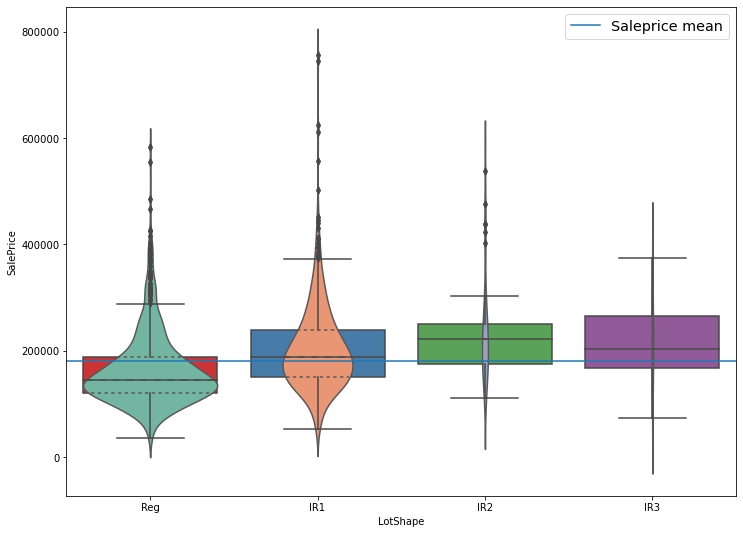

In [50]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='LotShape', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="LotShape", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [51]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['LotShape']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
Reg          0.270961
IR1          0.225877
IR2          0.127595
IR3          0.037314
Name: SalePrice, dtype: float64

In [52]:
# no features has high correlation
train_fe = train_fe.drop(columns=['LotShape'])
train_fe

LotFrontage  LotArea LandContour Utilities LotConfig LandSlope  \
0            65.0     8450         Lvl    AllPub    Inside       Gtl   
1            80.0     9600         Lvl    AllPub       FR2       Gtl   
2            68.0    11250         Lvl    AllPub    Inside       Gtl   
3            60.0     9550         Lvl    AllPub    Corner       Gtl   
4            84.0    14260         Lvl    AllPub       FR2       Gtl   
...           ...      ...         ...       ...       ...       ...   
1455         62.0     7917         Lvl    AllPub    Inside       Gtl   
1456         85.0    13175         Lvl    AllPub    Inside       Gtl   
1457         66.0     9042         Lvl    AllPub    Inside       Gtl   
1458         68.0     9717         Lvl    AllPub    Inside       Gtl   
1459         75.0     9937         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0         CollgCr       Norm       Norm     1Fam     2Story            7   
1         Veenker      Feedr       Norm     1Fam     1Story            6   
2         CollgCr       Norm       Norm     1Fam     2Story            7   
3         Crawfor       Norm       Norm     1Fam     2Story            7   
4         NoRidge       Norm       Norm     1Fam     2Story            8   
...           ...        ...        ...      ...        ...          ...   
1455      Gilbert       Norm       Norm     1Fam     2Story            6   
1456       NWAmes       Norm       Norm     1Fam     1Story            6   
1457      Crawfor       Norm       Norm     1Fam     2Story            7   
1458        NAmes       Norm       Norm     1Fam     1Story            5   
1459      Edwards       Norm       Norm     1Fam     1Story            5   

      OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
0               5       2003          2003     Gable  CompShg     VinylSd   
1               8       1976          1976     Gable  CompShg     MetalSd   
2               5       2001          2002     Gable  CompShg     VinylSd   
3               5       1915          1970     Gable  CompShg     Wd Sdng   
4               5       2000          2000     Gable  CompShg     VinylSd   
...           ...        ...           ...       ...      ...         ...   
1455            5       1999          2000     Gable  CompShg     VinylSd   
1456            6       1978          1988     Gable  CompShg     Plywood   
1457            9       1941          2006     Gable  CompShg     CemntBd   
1458            6       1950          1996       Hip  CompShg     MetalSd   
1459            6       1965          1965     Gable  CompShg     HdBoard   

     Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
0        VinylSd    BrkFace       196.0        Gd        TA      PConc   
1        MetalSd       None         0.0        TA        TA     CBlock   
2        VinylSd    BrkFace       162.0        Gd        TA      PConc   
3        Wd Shng       None         0.0        TA        TA     BrkTil   
4        VinylSd    BrkFace       350.0        Gd        TA      PConc   
...          ...        ...         ...       ...       ...        ...   
1455     VinylSd       None         0.0        TA        TA      PConc   
1456     Plywood      Stone       119.0        TA        TA     CBlock   
1457     CmentBd       None         0.0        Ex        Gd      Stone   
1458     MetalSd       None         0.0        TA        TA     CBlock   
1459     HdBoard       None         0.0        Gd        TA     CBlock   

     BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0          Gd       TA           No          GLQ         706          Unf   
1          Gd       TA           Gd          ALQ         978          Unf   
2          Gd       TA           Mn          GLQ         486          Unf   
3          TA       Gd           No          ALQ         216          Unf   
4          Gd       TA       

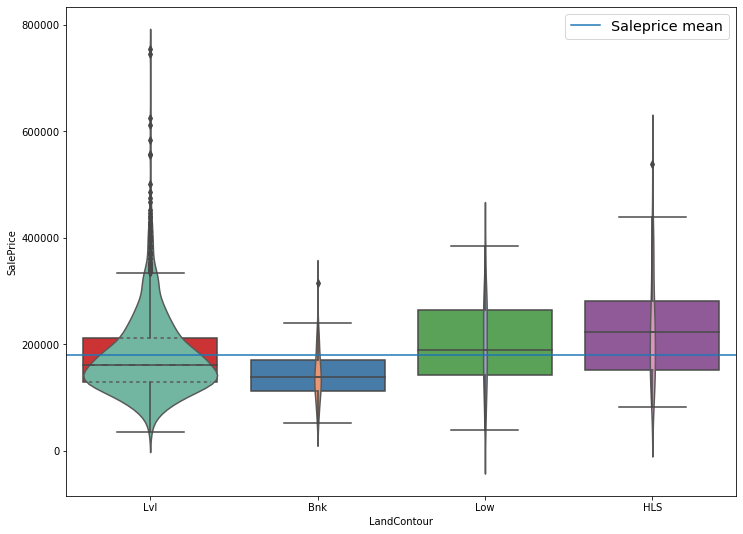

In [53]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='LandContour', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="LandContour", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [54]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['LandContour']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
HLS          0.121569
Bnk          0.100670
Low          0.046534
Lvl          0.029312
Name: SalePrice, dtype: float64

In [55]:
# no features has high correlation
train_fe = train_fe.drop(columns=['LandContour'])
train_fe

LotFrontage  LotArea Utilities LotConfig LandSlope Neighborhood  \
0            65.0     8450    AllPub    Inside       Gtl      CollgCr   
1            80.0     9600    AllPub       FR2       Gtl      Veenker   
2            68.0    11250    AllPub    Inside       Gtl      CollgCr   
3            60.0     9550    AllPub    Corner       Gtl      Crawfor   
4            84.0    14260    AllPub       FR2       Gtl      NoRidge   
...           ...      ...       ...       ...       ...          ...   
1455         62.0     7917    AllPub    Inside       Gtl      Gilbert   
1456         85.0    13175    AllPub    Inside       Gtl       NWAmes   
1457         66.0     9042    AllPub    Inside       Gtl      Crawfor   
1458         68.0     9717    AllPub    Inside       Gtl        NAmes   
1459         75.0     9937    AllPub    Inside       Gtl      Edwards   

     Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0          Norm       Norm     1Fam     2Story            7            5   
1         Feedr       Norm     1Fam     1Story            6            8   
2          Norm       Norm     1Fam     2Story            7            5   
3          Norm       Norm     1Fam     2Story            7            5   
4          Norm       Norm     1Fam     2Story            8            5   
...         ...        ...      ...        ...          ...          ...   
1455       Norm       Norm     1Fam     2Story            6            5   
1456       Norm       Norm     1Fam     1Story            6            6   
1457       Norm       Norm     1Fam     2Story            7            9   
1458       Norm       Norm     1Fam     1Story            5            6   
1459       Norm       Norm     1Fam     1Story            5            6   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0          2003          2003     Gable  CompShg     VinylSd     VinylSd   
1          1976          1976     Gable  CompShg     MetalSd     MetalSd   
2          2001          2002     Gable  CompShg     VinylSd     VinylSd   
3          1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4          2000          2000     Gable  CompShg     VinylSd     VinylSd   
...         ...           ...       ...      ...         ...         ...   
1455       1999          2000     Gable  CompShg     VinylSd     VinylSd   
1456       1978          1988     Gable  CompShg     Plywood     Plywood   
1457       1941          2006     Gable  CompShg     CemntBd     CmentBd   
1458       1950          1996       Hip  CompShg     MetalSd     MetalSd   
1459       1965          1965     Gable  CompShg     HdBoard     HdBoard   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1          None         0.0        TA        TA     CBlock       Gd       TA   
2       BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3          None         0.0        TA        TA     BrkTil       TA       Gd   
4       BrkFace       350.0        Gd        TA      PConc       Gd       TA   
...         ...         ...       ...       ...        ...      ...      ...   
1455       None         0.0        TA        TA      PConc       Gd       TA   
1456      Stone       119.0        TA        TA     CBlock       Gd       TA   
1457       None         0.0        Ex        Gd      Stone       TA       Gd   
1458       None         0.0        TA        TA     CBlock       TA       TA   
1459       None         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0              No          GLQ         706          Unf           0   
1              Gd          ALQ         978          Unf           0   
2              Mn          GLQ         486          Unf           0   
3              No          ALQ         216          Unf   

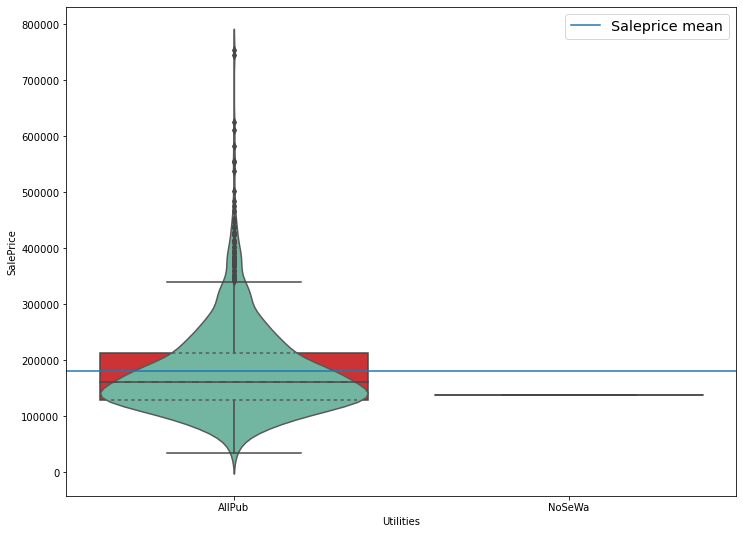

In [56]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='Utilities', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="Utilities", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [57]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['Utilities']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
AllPub       0.014266
NoSeWa       0.014266
Name: SalePrice, dtype: float64

In [58]:
# no features has high correlation
train_fe = train_fe.drop(columns=['Utilities'])
train_fe

LotFrontage  LotArea LotConfig LandSlope Neighborhood Condition1  \
0            65.0     8450    Inside       Gtl      CollgCr       Norm   
1            80.0     9600       FR2       Gtl      Veenker      Feedr   
2            68.0    11250    Inside       Gtl      CollgCr       Norm   
3            60.0     9550    Corner       Gtl      Crawfor       Norm   
4            84.0    14260       FR2       Gtl      NoRidge       Norm   
...           ...      ...       ...       ...          ...        ...   
1455         62.0     7917    Inside       Gtl      Gilbert       Norm   
1456         85.0    13175    Inside       Gtl       NWAmes       Norm   
1457         66.0     9042    Inside       Gtl      Crawfor       Norm   
1458         68.0     9717    Inside       Gtl        NAmes       Norm   
1459         75.0     9937    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   
...          ...       ...       ...        ...      ...      ...   
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0              No          GLQ         706          Unf           0   
1              Gd          ALQ         978          Unf           0   
2              Mn          GLQ         486          Unf           0   
3              No          ALQ         216          Unf           0   
4              Av          GLQ         655          Unf           0   
...           ...          ...      

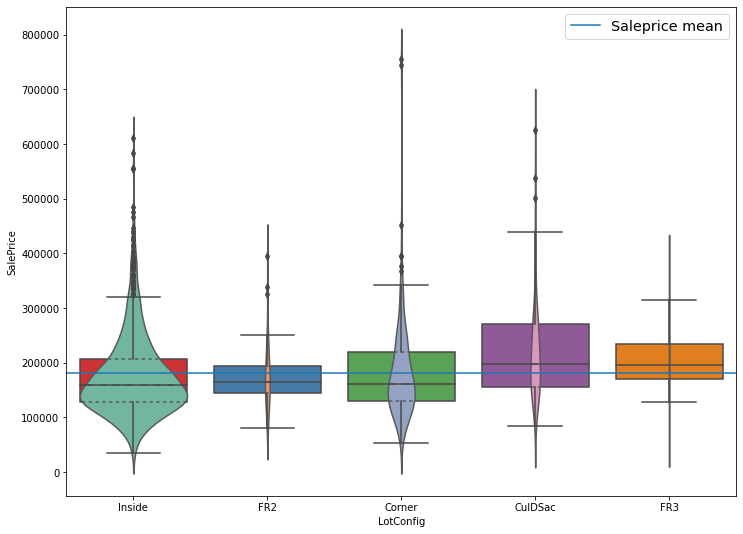

In [59]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='LotConfig', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="LotConfig", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [60]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['LotConfig']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
CulDSac      0.143869
Inside       0.083770
FR3          0.018533
Corner       0.006384
FR2          0.006027
Name: SalePrice, dtype: float64

In [61]:
# no features has high correlation
train_fe = train_fe.drop(columns=['LotConfig'])
train_fe

LotFrontage  LotArea LandSlope Neighborhood Condition1 Condition2  \
0            65.0     8450       Gtl      CollgCr       Norm       Norm   
1            80.0     9600       Gtl      Veenker      Feedr       Norm   
2            68.0    11250       Gtl      CollgCr       Norm       Norm   
3            60.0     9550       Gtl      Crawfor       Norm       Norm   
4            84.0    14260       Gtl      NoRidge       Norm       Norm   
...           ...      ...       ...          ...        ...        ...   
1455         62.0     7917       Gtl      Gilbert       Norm       Norm   
1456         85.0    13175       Gtl       NWAmes       Norm       Norm   
1457         66.0     9042       Gtl      Crawfor       Norm       Norm   
1458         68.0     9717       Gtl        NAmes       Norm       Norm   
1459         75.0     9937       Gtl      Edwards       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0        1Fam     2Story            7            5       2003          2003   
1        1Fam     1Story            6            8       1976          1976   
2        1Fam     2Story            7            5       2001          2002   
3        1Fam     2Story            7            5       1915          1970   
4        1Fam     2Story            8            5       2000          2000   
...       ...        ...          ...          ...        ...           ...   
1455     1Fam     2Story            6            5       1999          2000   
1456     1Fam     1Story            6            6       1978          1988   
1457     1Fam     2Story            7            9       1941          2006   
1458     1Fam     1Story            5            6       1950          1996   
1459     1Fam     1Story            5            6       1965          1965   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0        Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0   
1        Gable  CompShg     MetalSd     MetalSd       None         0.0   
2        Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0   
3        Gable  CompShg     Wd Sdng     Wd Shng       None         0.0   
4        Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0   
...        ...      ...         ...         ...        ...         ...   
1455     Gable  CompShg     VinylSd     VinylSd       None         0.0   
1456     Gable  CompShg     Plywood     Plywood      Stone       119.0   
1457     Gable  CompShg     CemntBd     CmentBd       None         0.0   
1458       Hip  CompShg     MetalSd     MetalSd       None         0.0   
1459     Gable  CompShg     HdBoard     HdBoard       None         0.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0           Gd        TA      PConc       Gd       TA           No   
1           TA        TA     CBlock       Gd       TA           Gd   
2           Gd        TA      PConc       Gd       TA           Mn   
3           TA        TA     BrkTil       TA       Gd           No   
4           Gd        TA      PConc       Gd       TA           Av   
...        ...       ...        ...      ...      ...          ...   
1455        TA        TA      PConc       Gd       TA           No   
1456        TA        TA     CBlock       Gd       TA           No   
1457        Ex        Gd      Stone       TA       Gd           No   
1458        TA        TA     CBlock       TA       TA           Mn   
1459        Gd        TA     CBlock       TA       TA           No   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0             GLQ         706          Unf           0        150   
1             ALQ         978          Unf           0        284   
2             GLQ         486          Unf           0        434   
3             ALQ         216          Unf           0        540   
4             GLQ         655          Unf           0        490   
...         

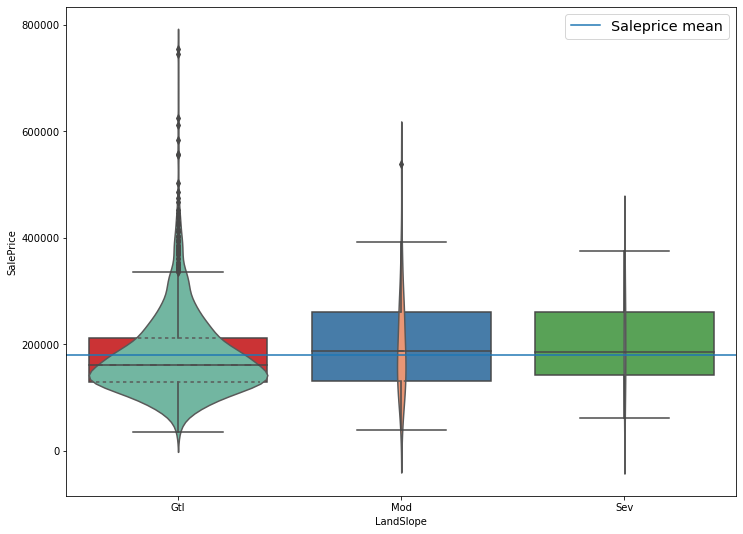

In [62]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='LandSlope', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="LandSlope", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [63]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['LandSlope']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
Gtl          0.052533
Mod          0.044248
Sev          0.028600
Name: SalePrice, dtype: float64

In [64]:
# no features has high correlation
train_fe = train_fe.drop(columns=['LandSlope'])
train_fe

LotFrontage  LotArea Neighborhood Condition1 Condition2 BldgType  \
0            65.0     8450      CollgCr       Norm       Norm     1Fam   
1            80.0     9600      Veenker      Feedr       Norm     1Fam   
2            68.0    11250      CollgCr       Norm       Norm     1Fam   
3            60.0     9550      Crawfor       Norm       Norm     1Fam   
4            84.0    14260      NoRidge       Norm       Norm     1Fam   
...           ...      ...          ...        ...        ...      ...   
1455         62.0     7917      Gilbert       Norm       Norm     1Fam   
1456         85.0    13175       NWAmes       Norm       Norm     1Fam   
1457         66.0     9042      Crawfor       Norm       Norm     1Fam   
1458         68.0     9717        NAmes       Norm       Norm     1Fam   
1459         75.0     9937      Edwards       Norm       Norm     1Fam   

     HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0        2Story            7            5       2003          2003     Gable   
1        1Story            6            8       1976          1976     Gable   
2        2Story            7            5       2001          2002     Gable   
3        2Story            7            5       1915          1970     Gable   
4        2Story            8            5       2000          2000     Gable   
...         ...          ...          ...        ...           ...       ...   
1455     2Story            6            5       1999          2000     Gable   
1456     1Story            6            6       1978          1988     Gable   
1457     2Story            7            9       1941          2006     Gable   
1458     1Story            5            6       1950          1996       Hip   
1459     1Story            5            6       1965          1965     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     CompShg     MetalSd     MetalSd       None         0.0        TA   
2     CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4     CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   
...       ...         ...         ...        ...         ...       ...   
1455  CompShg     VinylSd     VinylSd       None         0.0        TA   
1456  CompShg     Plywood     Plywood      Stone       119.0        TA   
1457  CompShg     CemntBd     CmentBd       None         0.0        Ex   
1458  CompShg     MetalSd     MetalSd       None         0.0        TA   
1459  CompShg     HdBoard     HdBoard       None         0.0        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0           TA      PConc       Gd       TA           No          GLQ   
1           TA     CBlock       Gd       TA           Gd          ALQ   
2           TA      PConc       Gd       TA           Mn          GLQ   
3           TA     BrkTil       TA       Gd           No          ALQ   
4           TA      PConc       Gd       TA           Av          GLQ   
...        ...        ...      ...      ...          ...          ...   
1455        TA      PConc       Gd       TA           No          Unf   
1456        TA     CBlock       Gd       TA           No          ALQ   
1457        Gd      Stone       TA       Gd           No          GLQ   
1458        TA     CBlock       TA       TA           Mn          GLQ   
1459        TA     CBlock       TA       TA           No          BLQ   

      BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0            706          Unf           0        150          856    GasA   
1            978          Unf           0        284         1262    GasA   
2            486          Unf           0        434          920    GasA   
3            216          Unf           0        540          756    GasA   
4    

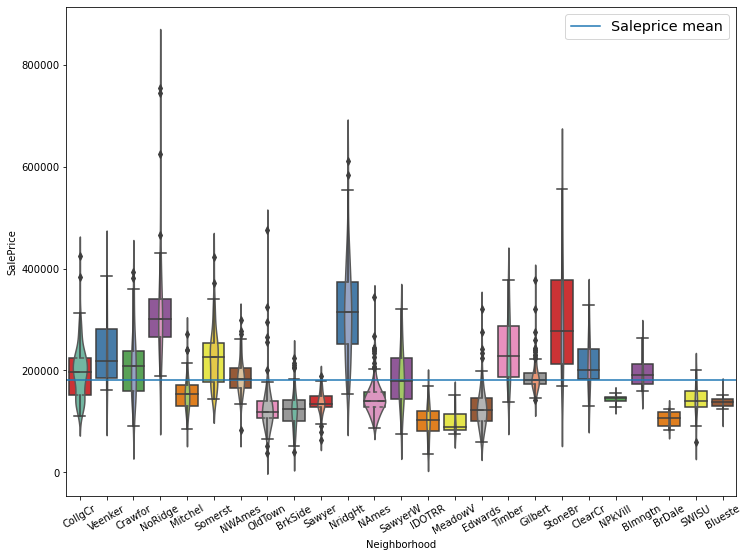

In [65]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='Neighborhood', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="Neighborhood", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [66]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['Neighborhood']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
NridgHt      0.395341
NoRidge      0.333037
StoneBr      0.217158
OldTown      0.191896
NAmes        0.187615
Edwards      0.179668
IDOTRR       0.164180
BrkSide      0.143468
Somerst      0.142687
Timber       0.130092
Sawyer       0.128005
MeadowV      0.112633
BrDale       0.101347
CollgCr      0.073139
Crawfor      0.072194
Veenker      0.064227
SWISU        0.063421
Mitchel      0.057273
ClearCr      0.056687
NPkVill      0.037738
Gilbert      0.036118
NWAmes       0.024707
Blueste      0.020182
Blmngtn      0.019686
SawyerW      0.015554
Name: SalePrice, dtype: float64

In [67]:
# NridgHt, NoRidge have higher than 0.3 correlation
train_fe = pd.concat([train_fe, pd.get_dummies(train_fe['Neighborhood'])[['NridgHt','NoRidge']].rename(columns = {'NridgHt':'Nbrhd_NridgHt','NoRidge':'Nbrhd_NoRidge'})], axis = 1)
train_fe = train_fe.drop(columns=['Neighborhood'])
train_fe

LotFrontage  LotArea Condition1 Condition2 BldgType HouseStyle  \
0            65.0     8450       Norm       Norm     1Fam     2Story   
1            80.0     9600      Feedr       Norm     1Fam     1Story   
2            68.0    11250       Norm       Norm     1Fam     2Story   
3            60.0     9550       Norm       Norm     1Fam     2Story   
4            84.0    14260       Norm       Norm     1Fam     2Story   
...           ...      ...        ...        ...      ...        ...   
1455         62.0     7917       Norm       Norm     1Fam     2Story   
1456         85.0    13175       Norm       Norm     1Fam     1Story   
1457         66.0     9042       Norm       Norm     1Fam     2Story   
1458         68.0     9717       Norm       Norm     1Fam     1Story   
1459         75.0     9937       Norm       Norm     1Fam     1Story   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0               7            5       2003          2003     Gable  CompShg   
1               6            8       1976          1976     Gable  CompShg   
2               7            5       2001          2002     Gable  CompShg   
3               7            5       1915          1970     Gable  CompShg   
4               8            5       2000          2000     Gable  CompShg   
...           ...          ...        ...           ...       ...      ...   
1455            6            5       1999          2000     Gable  CompShg   
1456            6            6       1978          1988     Gable  CompShg   
1457            7            9       1941          2006     Gable  CompShg   
1458            5            6       1950          1996       Hip  CompShg   
1459            5            6       1965          1965     Gable  CompShg   

     Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0        VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1        MetalSd     MetalSd       None         0.0        TA        TA   
2        VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3        Wd Sdng     Wd Shng       None         0.0        TA        TA   
4        VinylSd     VinylSd    BrkFace       350.0        Gd        TA   
...          ...         ...        ...         ...       ...       ...   
1455     VinylSd     VinylSd       None         0.0        TA        TA   
1456     Plywood     Plywood      Stone       119.0        TA        TA   
1457     CemntBd     CmentBd       None         0.0        Ex        Gd   
1458     MetalSd     MetalSd       None         0.0        TA        TA   
1459     HdBoard     HdBoard       None         0.0        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0         PConc       Gd       TA           No          GLQ         706   
1        CBlock       Gd       TA           Gd          ALQ         978   
2         PConc       Gd       TA           Mn          GLQ         486   
3        BrkTil       TA       Gd           No          ALQ         216   
4         PConc       Gd       TA           Av          GLQ         655   
...         ...      ...      ...          ...          ...         ...   
1455      PConc       Gd       TA           No          Unf           0   
1456     CBlock       Gd       TA           No          ALQ         790   
1457      Stone       TA       Gd           No          GLQ         275   
1458     CBlock       TA       TA           Mn          GLQ          49   
1459     CBlock       TA       TA           No          BLQ         830   

     BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0             Unf           0        150          856    GasA        Ex   
1             Unf           0        284         1262    GasA        Ex   
2             Unf           0        434          920    GasA        Ex   
3             Unf           0        540          756    GasA        Gd   
4             Unf          

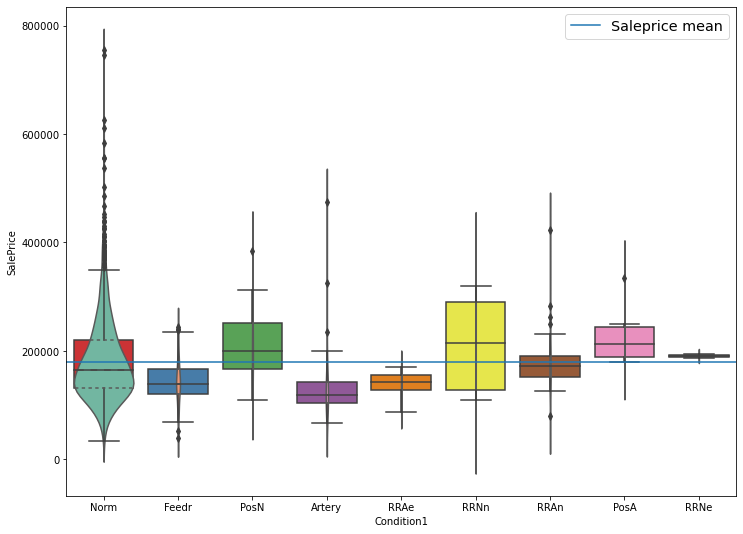

In [68]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='Condition1', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="Condition1", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [69]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['Condition1']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
Feedr        0.116826
Norm         0.111740
Artery       0.106104
PosN         0.050356
RRAe         0.046487
PosA         0.042596
RRNn         0.023640
RRAn         0.006567
RRNe         0.004785
Name: SalePrice, dtype: float64

In [70]:
# no features has high correlation
train_fe = train_fe.drop(columns=['Condition1'])
train_fe

LotFrontage  LotArea Condition2 BldgType HouseStyle  OverallQual  \
0            65.0     8450       Norm     1Fam     2Story            7   
1            80.0     9600       Norm     1Fam     1Story            6   
2            68.0    11250       Norm     1Fam     2Story            7   
3            60.0     9550       Norm     1Fam     2Story            7   
4            84.0    14260       Norm     1Fam     2Story            8   
...           ...      ...        ...      ...        ...          ...   
1455         62.0     7917       Norm     1Fam     2Story            6   
1456         85.0    13175       Norm     1Fam     1Story            6   
1457         66.0     9042       Norm     1Fam     2Story            7   
1458         68.0     9717       Norm     1Fam     1Story            5   
1459         75.0     9937       Norm     1Fam     1Story            5   

      OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
0               5       2003          2003     Gable  CompShg     VinylSd   
1               8       1976          1976     Gable  CompShg     MetalSd   
2               5       2001          2002     Gable  CompShg     VinylSd   
3               5       1915          1970     Gable  CompShg     Wd Sdng   
4               5       2000          2000     Gable  CompShg     VinylSd   
...           ...        ...           ...       ...      ...         ...   
1455            5       1999          2000     Gable  CompShg     VinylSd   
1456            6       1978          1988     Gable  CompShg     Plywood   
1457            9       1941          2006     Gable  CompShg     CemntBd   
1458            6       1950          1996       Hip  CompShg     MetalSd   
1459            6       1965          1965     Gable  CompShg     HdBoard   

     Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
0        VinylSd    BrkFace       196.0        Gd        TA      PConc   
1        MetalSd       None         0.0        TA        TA     CBlock   
2        VinylSd    BrkFace       162.0        Gd        TA      PConc   
3        Wd Shng       None         0.0        TA        TA     BrkTil   
4        VinylSd    BrkFace       350.0        Gd        TA      PConc   
...          ...        ...         ...       ...       ...        ...   
1455     VinylSd       None         0.0        TA        TA      PConc   
1456     Plywood      Stone       119.0        TA        TA     CBlock   
1457     CmentBd       None         0.0        Ex        Gd      Stone   
1458     MetalSd       None         0.0        TA        TA     CBlock   
1459     HdBoard       None         0.0        Gd        TA     CBlock   

     BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0          Gd       TA           No          GLQ         706          Unf   
1          Gd       TA           Gd          ALQ         978          Unf   
2          Gd       TA           Mn          GLQ         486          Unf   
3          TA       Gd           No          ALQ         216          Unf   
4          Gd       TA           Av          GLQ         655          Unf   
...       ...      ...          ...          ...         ...          ...   
1455       Gd       TA           No          Unf           0          Unf   
1456       Gd       TA           No          ALQ         790          Rec   
1457       TA       Gd           No          GLQ         275          Unf   
1458       TA       TA           Mn          GLQ          49          Rec   
1459       TA       TA           No          BLQ         830          LwQ   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
0              0        150          856    GasA        Ex          Y   
1              0        284         1262    GasA        Ex          Y   
2              0        434          920    GasA        Ex          Y   
3              0        540          756    GasA        Gd          Y   
4            

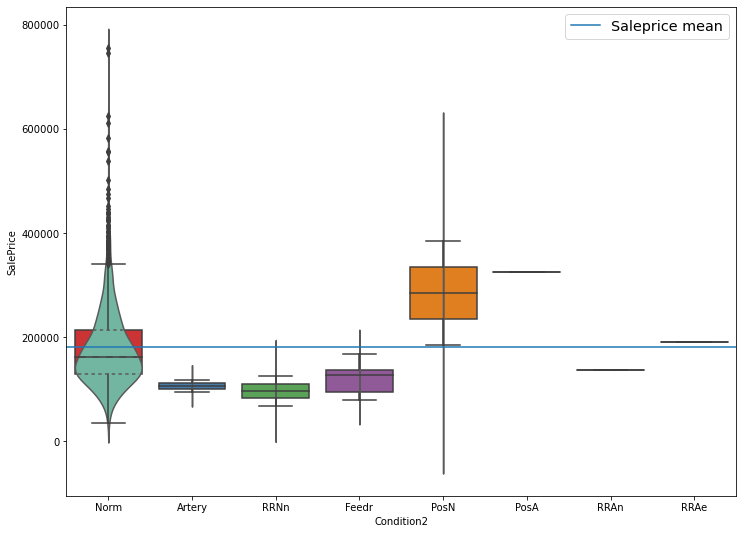

In [71]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='Condition2', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="Condition2", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [72]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['Condition2']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
PosN         0.048917
Feedr        0.048288
PosA         0.047876
RRNn         0.039288
Artery       0.034717
Norm         0.030356
RRAn         0.014463
RRAe         0.003134
Name: SalePrice, dtype: float64

In [73]:
# no features has high correlation
train_fe = train_fe.drop(columns=['Condition2'])
train_fe

LotFrontage  LotArea BldgType HouseStyle  OverallQual  OverallCond  \
0            65.0     8450     1Fam     2Story            7            5   
1            80.0     9600     1Fam     1Story            6            8   
2            68.0    11250     1Fam     2Story            7            5   
3            60.0     9550     1Fam     2Story            7            5   
4            84.0    14260     1Fam     2Story            8            5   
...           ...      ...      ...        ...          ...          ...   
1455         62.0     7917     1Fam     2Story            6            5   
1456         85.0    13175     1Fam     1Story            6            6   
1457         66.0     9042     1Fam     2Story            7            9   
1458         68.0     9717     1Fam     1Story            5            6   
1459         75.0     9937     1Fam     1Story            5            6   

      YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0          2003          2003     Gable  CompShg     VinylSd     VinylSd   
1          1976          1976     Gable  CompShg     MetalSd     MetalSd   
2          2001          2002     Gable  CompShg     VinylSd     VinylSd   
3          1915          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4          2000          2000     Gable  CompShg     VinylSd     VinylSd   
...         ...           ...       ...      ...         ...         ...   
1455       1999          2000     Gable  CompShg     VinylSd     VinylSd   
1456       1978          1988     Gable  CompShg     Plywood     Plywood   
1457       1941          2006     Gable  CompShg     CemntBd     CmentBd   
1458       1950          1996       Hip  CompShg     MetalSd     MetalSd   
1459       1965          1965     Gable  CompShg     HdBoard     HdBoard   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1          None         0.0        TA        TA     CBlock       Gd       TA   
2       BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3          None         0.0        TA        TA     BrkTil       TA       Gd   
4       BrkFace       350.0        Gd        TA      PConc       Gd       TA   
...         ...         ...       ...       ...        ...      ...      ...   
1455       None         0.0        TA        TA      PConc       Gd       TA   
1456      Stone       119.0        TA        TA     CBlock       Gd       TA   
1457       None         0.0        Ex        Gd      Stone       TA       Gd   
1458       None         0.0        TA        TA     CBlock       TA       TA   
1459       None         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0              No          GLQ         706          Unf           0   
1              Gd          ALQ         978          Unf           0   
2              Mn          GLQ         486          Unf           0   
3              No          ALQ         216          Unf           0   
4              Av          GLQ         655          Unf           0   
...           ...          ...         ...          ...         ...   
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0           150          856    GasA        Ex          Y      SBrkr   
1           284         1262    GasA        Ex          Y      SBrkr   
2           434          920    GasA        Ex          Y      SBrkr   
3           540          756    GasA        Gd          Y      SBrkr   
4     

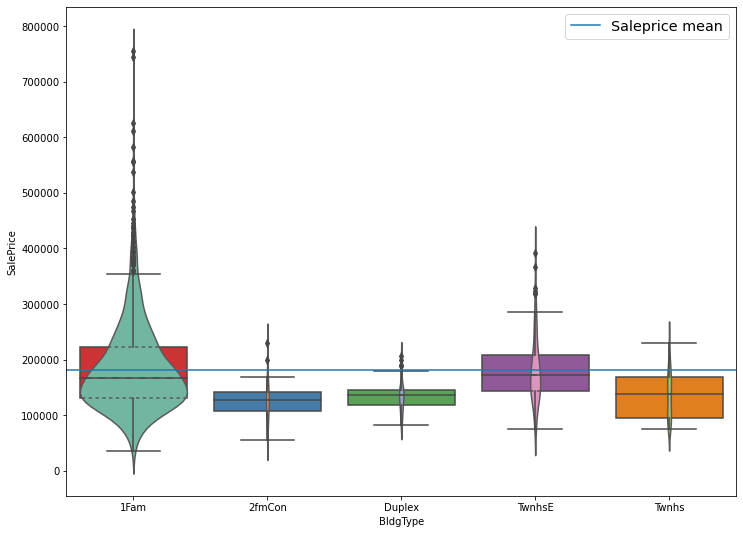

In [74]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='BldgType', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="BldgType", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [75]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['BldgType']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
1Fam         0.136887
Duplex       0.114367
Twnhs        0.098439
2fmCon       0.097174
TwnhsE       0.004607
Name: SalePrice, dtype: float64

In [76]:
# no features has high correlation
train_fe = train_fe.drop(columns=['BldgType'])
train_fe

LotFrontage  LotArea HouseStyle  OverallQual  OverallCond  YearBuilt  \
0            65.0     8450     2Story            7            5       2003   
1            80.0     9600     1Story            6            8       1976   
2            68.0    11250     2Story            7            5       2001   
3            60.0     9550     2Story            7            5       1915   
4            84.0    14260     2Story            8            5       2000   
...           ...      ...        ...          ...          ...        ...   
1455         62.0     7917     2Story            6            5       1999   
1456         85.0    13175     1Story            6            6       1978   
1457         66.0     9042     2Story            7            9       1941   
1458         68.0     9717     1Story            5            6       1950   
1459         75.0     9937     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   
...          ...       ...       ...        ...      ...      ...   
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0              No          GLQ         706          Unf           0   
1              Gd          ALQ         978          Unf           0   
2              Mn          GLQ         486          Unf           0   
3              No          ALQ         216          Unf           0   
4              Av          GLQ         655          Unf           0   
...           ...          ...         ...          ...         ...   
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0           150          856    GasA        Ex          Y      SBrkr   
1           284         1262    GasA        Ex          Y      SBrkr   
2           434          920    GasA        Ex          Y      SBrkr   
3           540          756    GasA        Gd          Y      SBrkr   
4           490         1145    GasA        Ex          Y      SBrkr   
...         ...          ...     ...      

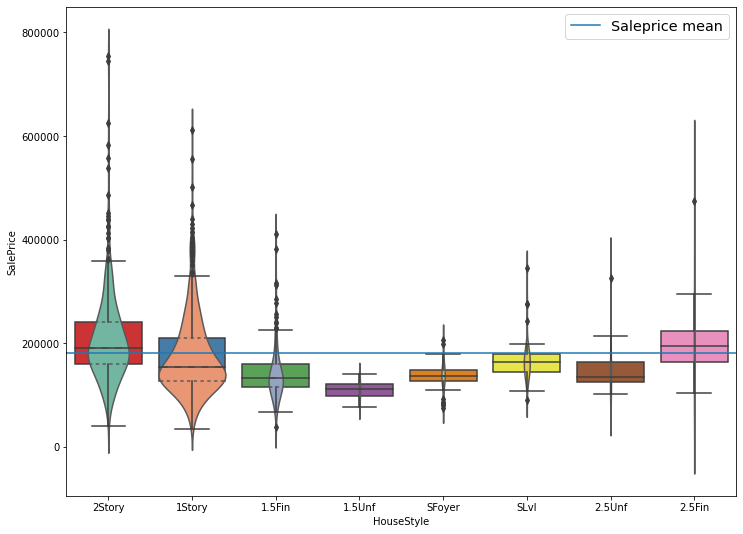

In [77]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='HouseStyle', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="HouseStyle", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [78]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['HouseStyle']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
2Story       0.245920
1.5Fin       0.162775
SFoyer       0.092828
1.5Unf       0.087689
1Story       0.065158
SLvl         0.037558
2.5Fin       0.037076
2.5Unf       0.025579
Name: SalePrice, dtype: float64

In [79]:
# no features has high correlation
train_fe = train_fe.drop(columns=['HouseStyle'])
train_fe

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            65.0     8450            7            5       2003          2003   
1            80.0     9600            6            8       1976          1976   
2            68.0    11250            7            5       2001          2002   
3            60.0     9550            7            5       1915          1970   
4            84.0    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
1455         62.0     7917            6            5       1999          2000   
1456         85.0    13175            6            6       1978          1988   
1457         66.0     9042            7            9       1941          2006   
1458         68.0     9717            5            6       1950          1996   
1459         75.0     9937            5            6       1965          1965   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0        Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0   
1        Gable  CompShg     MetalSd     MetalSd       None         0.0   
2        Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0   
3        Gable  CompShg     Wd Sdng     Wd Shng       None         0.0   
4        Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0   
...        ...      ...         ...         ...        ...         ...   
1455     Gable  CompShg     VinylSd     VinylSd       None         0.0   
1456     Gable  CompShg     Plywood     Plywood      Stone       119.0   
1457     Gable  CompShg     CemntBd     CmentBd       None         0.0   
1458       Hip  CompShg     MetalSd     MetalSd       None         0.0   
1459     Gable  CompShg     HdBoard     HdBoard       None         0.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0           Gd        TA      PConc       Gd       TA           No   
1           TA        TA     CBlock       Gd       TA           Gd   
2           Gd        TA      PConc       Gd       TA           Mn   
3           TA        TA     BrkTil       TA       Gd           No   
4           Gd        TA      PConc       Gd       TA           Av   
...        ...       ...        ...      ...      ...          ...   
1455        TA        TA      PConc       Gd       TA           No   
1456        TA        TA     CBlock       Gd       TA           No   
1457        Ex        Gd      Stone       TA       Gd           No   
1458        TA        TA     CBlock       TA       TA           Mn   
1459        Gd        TA     CBlock       TA       TA           No   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0             GLQ         706          Unf           0        150   
1             ALQ         978          Unf           0        284   
2             GLQ         486          Unf           0        434   
3             ALQ         216          Unf           0        540   
4             GLQ         655          Unf           0        490   
...           ...         ...          ...         ...        ...   
1455          Unf           0          Unf           0        953   
1456          ALQ         790          Rec         163        589   
1457          GLQ         275          Unf           0        877   
1458          GLQ          49          Rec        1029          0   
1459          BLQ         830          LwQ         290        136   

      TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0             856    GasA        Ex          Y      SBrkr       856       854   
1            1262    GasA        Ex          Y      SBrkr      1262         0   
2             920    GasA        Ex          Y      SBrkr       920       866   
3             756    GasA        Gd          Y      SBrkr       961       756   
4            1145    GasA        Ex          Y      SBrkr      1145  

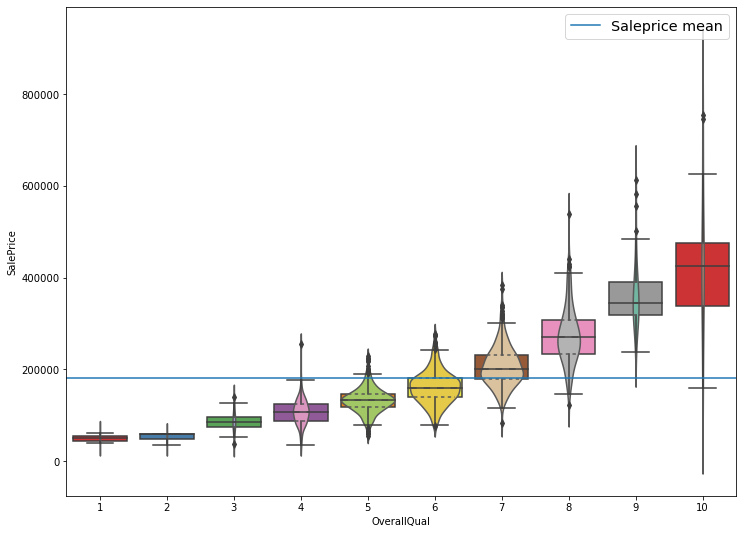

In [80]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='OverallQual', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="OverallQual", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

- It should be considered as numerical

In [81]:
train_fe

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            65.0     8450            7            5       2003          2003   
1            80.0     9600            6            8       1976          1976   
2            68.0    11250            7            5       2001          2002   
3            60.0     9550            7            5       1915          1970   
4            84.0    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
1455         62.0     7917            6            5       1999          2000   
1456         85.0    13175            6            6       1978          1988   
1457         66.0     9042            7            9       1941          2006   
1458         68.0     9717            5            6       1950          1996   
1459         75.0     9937            5            6       1965          1965   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0        Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0   
1        Gable  CompShg     MetalSd     MetalSd       None         0.0   
2        Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0   
3        Gable  CompShg     Wd Sdng     Wd Shng       None         0.0   
4        Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0   
...        ...      ...         ...         ...        ...         ...   
1455     Gable  CompShg     VinylSd     VinylSd       None         0.0   
1456     Gable  CompShg     Plywood     Plywood      Stone       119.0   
1457     Gable  CompShg     CemntBd     CmentBd       None         0.0   
1458       Hip  CompShg     MetalSd     MetalSd       None         0.0   
1459     Gable  CompShg     HdBoard     HdBoard       None         0.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0           Gd        TA      PConc       Gd       TA           No   
1           TA        TA     CBlock       Gd       TA           Gd   
2           Gd        TA      PConc       Gd       TA           Mn   
3           TA        TA     BrkTil       TA       Gd           No   
4           Gd        TA      PConc       Gd       TA           Av   
...        ...       ...        ...      ...      ...          ...   
1455        TA        TA      PConc       Gd       TA           No   
1456        TA        TA     CBlock       Gd       TA           No   
1457        Ex        Gd      Stone       TA       Gd           No   
1458        TA        TA     CBlock       TA       TA           Mn   
1459        Gd        TA     CBlock       TA       TA           No   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0             GLQ         706          Unf           0        150   
1             ALQ         978          Unf           0        284   
2             GLQ         486          Unf           0        434   
3             ALQ         216          Unf           0        540   
4             GLQ         655          Unf           0        490   
...           ...         ...          ...         ...        ...   
1455          Unf           0          Unf           0        953   
1456          ALQ         790          Rec         163        589   
1457          GLQ         275          Unf           0        877   
1458          GLQ          49          Rec        1029          0   
1459          BLQ         830          LwQ         290        136   

      TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0             856    GasA        Ex          Y      SBrkr       856       854   
1            1262    GasA        Ex          Y      SBrkr      1262         0   
2             920    GasA        Ex          Y      SBrkr       920       866   
3             756    GasA        Gd          Y      SBrkr       961       756   
4            1145    GasA        Ex          Y      SBrkr      1145  

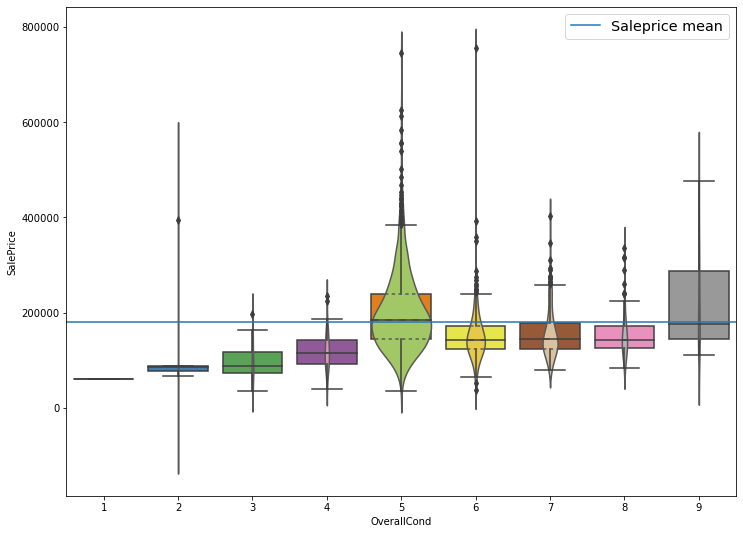

In [82]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='OverallCond', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="OverallCond", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [83]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['OverallCond']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
5            0.316555
6            0.154651
4            0.153393
3            0.135399
7            0.114674
8            0.071786
9            0.055527
1            0.039620
2            0.028615
Name: SalePrice, dtype: float64

In [84]:
# NridgHt, NoRidge have higher than 0.3 correlation
train_fe = pd.concat([train_fe, pd.get_dummies(train_fe['OverallCond'])[5].rename('OverallCond_5')], axis = 1)
train_fe = train_fe.drop(columns=['OverallCond'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd RoofStyle  \
0            65.0     8450            7       2003          2003     Gable   
1            80.0     9600            6       1976          1976     Gable   
2            68.0    11250            7       2001          2002     Gable   
3            60.0     9550            7       1915          1970     Gable   
4            84.0    14260            8       2000          2000     Gable   
...           ...      ...          ...        ...           ...       ...   
1455         62.0     7917            6       1999          2000     Gable   
1456         85.0    13175            6       1978          1988     Gable   
1457         66.0     9042            7       1941          2006     Gable   
1458         68.0     9717            5       1950          1996       Hip   
1459         75.0     9937            5       1965          1965     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     CompShg     MetalSd     MetalSd       None         0.0        TA   
2     CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4     CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   
...       ...         ...         ...        ...         ...       ...   
1455  CompShg     VinylSd     VinylSd       None         0.0        TA   
1456  CompShg     Plywood     Plywood      Stone       119.0        TA   
1457  CompShg     CemntBd     CmentBd       None         0.0        Ex   
1458  CompShg     MetalSd     MetalSd       None         0.0        TA   
1459  CompShg     HdBoard     HdBoard       None         0.0        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0           TA      PConc       Gd       TA           No          GLQ   
1           TA     CBlock       Gd       TA           Gd          ALQ   
2           TA      PConc       Gd       TA           Mn          GLQ   
3           TA     BrkTil       TA       Gd           No          ALQ   
4           TA      PConc       Gd       TA           Av          GLQ   
...        ...        ...      ...      ...          ...          ...   
1455        TA      PConc       Gd       TA           No          Unf   
1456        TA     CBlock       Gd       TA           No          ALQ   
1457        Gd      Stone       TA       Gd           No          GLQ   
1458        TA     CBlock       TA       TA           Mn          GLQ   
1459        TA     CBlock       TA       TA           No          BLQ   

      BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0            706          Unf           0        150          856    GasA   
1            978          Unf           0        284         1262    GasA   
2            486          Unf           0        434          920    GasA   
3            216          Unf           0        540          756    GasA   
4            655          Unf           0        490         1145    GasA   
...          ...          ...         ...        ...          ...     ...   
1455           0          Unf           0        953          953    GasA   
1456         790          Rec         163        589         1542    GasA   
1457         275          Unf           0        877         1152    GasA   
1458          49          Rec        1029          0         1078    GasA   
1459         830          LwQ         290        136         1256    GasA   

     HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           Ex          Y      SBrkr       856       854             0   
1           Ex          Y      SBrkr      1262         0             0   
2           Ex          Y      SBrkr       920       866             0   
3           Gd          Y      SBrkr       961       756             0   
4       

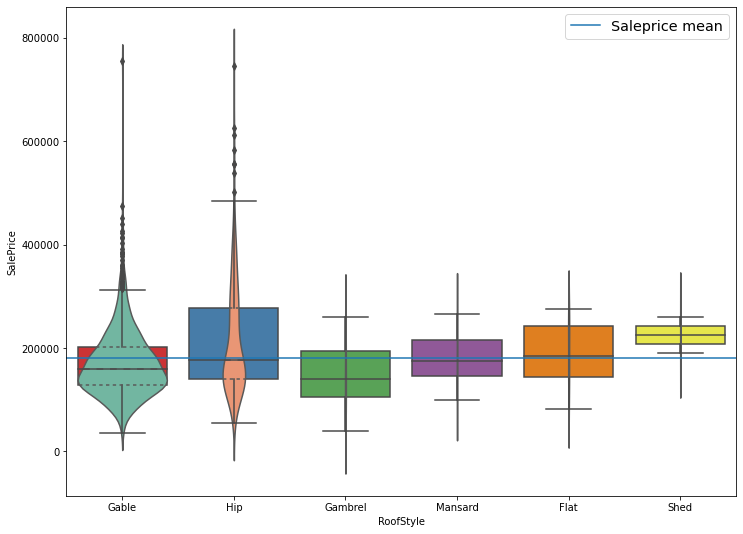

In [85]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='RoofStyle', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="RoofStyle", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [86]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['RoofStyle']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
Hip          0.239610
Gable        0.228545
Gambrel      0.034895
Shed         0.020844
Flat         0.016974
Mansard      0.000021
Name: SalePrice, dtype: float64

In [87]:
# no features has high correlation
train_fe = train_fe.drop(columns=['RoofStyle'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd RoofMatl  \
0            65.0     8450            7       2003          2003  CompShg   
1            80.0     9600            6       1976          1976  CompShg   
2            68.0    11250            7       2001          2002  CompShg   
3            60.0     9550            7       1915          1970  CompShg   
4            84.0    14260            8       2000          2000  CompShg   
...           ...      ...          ...        ...           ...      ...   
1455         62.0     7917            6       1999          2000  CompShg   
1456         85.0    13175            6       1978          1988  CompShg   
1457         66.0     9042            7       1941          2006  CompShg   
1458         68.0     9717            5       1950          1996  CompShg   
1459         75.0     9937            5       1965          1965  CompShg   

     Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0        VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1        MetalSd     MetalSd       None         0.0        TA        TA   
2        VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3        Wd Sdng     Wd Shng       None         0.0        TA        TA   
4        VinylSd     VinylSd    BrkFace       350.0        Gd        TA   
...          ...         ...        ...         ...       ...       ...   
1455     VinylSd     VinylSd       None         0.0        TA        TA   
1456     Plywood     Plywood      Stone       119.0        TA        TA   
1457     CemntBd     CmentBd       None         0.0        Ex        Gd   
1458     MetalSd     MetalSd       None         0.0        TA        TA   
1459     HdBoard     HdBoard       None         0.0        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0         PConc       Gd       TA           No          GLQ         706   
1        CBlock       Gd       TA           Gd          ALQ         978   
2         PConc       Gd       TA           Mn          GLQ         486   
3        BrkTil       TA       Gd           No          ALQ         216   
4         PConc       Gd       TA           Av          GLQ         655   
...         ...      ...      ...          ...          ...         ...   
1455      PConc       Gd       TA           No          Unf           0   
1456     CBlock       Gd       TA           No          ALQ         790   
1457      Stone       TA       Gd           No          GLQ         275   
1458     CBlock       TA       TA           Mn          GLQ          49   
1459     CBlock       TA       TA           No          BLQ         830   

     BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0             Unf           0        150          856    GasA        Ex   
1             Unf           0        284         1262    GasA        Ex   
2             Unf           0        434          920    GasA        Ex   
3             Unf           0        540          756    GasA        Gd   
4             Unf           0        490         1145    GasA        Ex   
...           ...         ...        ...          ...     ...       ...   
1455          Unf           0        953          953    GasA        Ex   
1456          Rec         163        589         1542    GasA        TA   
1457          Unf           0        877         1152    GasA        Ex   
1458          Rec        1029          0         1078    GasA        Gd   
1459          LwQ         290        136         1256    GasA        Gd   

     CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0             Y      SBrkr       856       854             0       1710   
1             Y      SBrkr      1262         0             0       1262   
2             Y      SBrkr       920       866             0       1786   
3             Y      SBrkr       961       756             0       1717   
4  

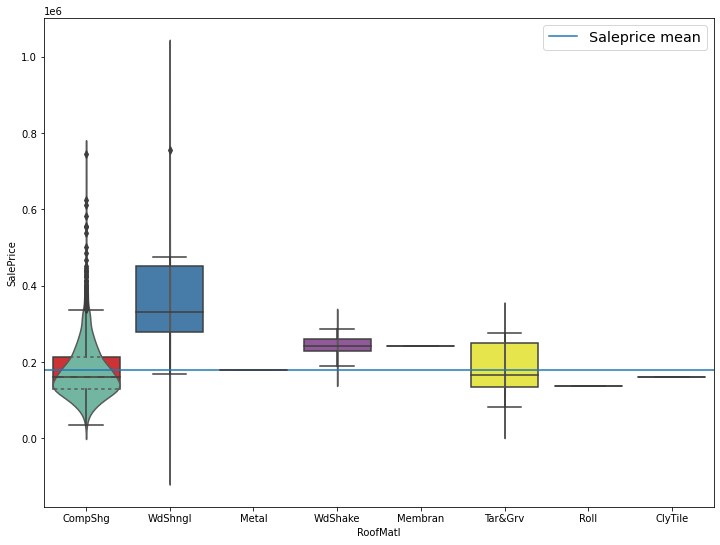

In [88]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='RoofMatl', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="RoofMatl", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [89]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['RoofMatl']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
WdShngl      0.170538
CompShg      0.105713
WdShake      0.045162
Membran      0.020202
Roll         0.014432
ClyTile      0.006809
Tar&Grv      0.005363
Metal        0.000180
Name: SalePrice, dtype: float64

In [90]:
# no features has high correlation
train_fe = train_fe.drop(columns=['RoofMatl'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd Exterior1st  \
0            65.0     8450            7       2003          2003     VinylSd   
1            80.0     9600            6       1976          1976     MetalSd   
2            68.0    11250            7       2001          2002     VinylSd   
3            60.0     9550            7       1915          1970     Wd Sdng   
4            84.0    14260            8       2000          2000     VinylSd   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000     VinylSd   
1456         85.0    13175            6       1978          1988     Plywood   
1457         66.0     9042            7       1941          2006     CemntBd   
1458         68.0     9717            5       1950          1996     MetalSd   
1459         75.0     9937            5       1965          1965     HdBoard   

     Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  \
0        VinylSd    BrkFace       196.0        Gd        TA      PConc   
1        MetalSd       None         0.0        TA        TA     CBlock   
2        VinylSd    BrkFace       162.0        Gd        TA      PConc   
3        Wd Shng       None         0.0        TA        TA     BrkTil   
4        VinylSd    BrkFace       350.0        Gd        TA      PConc   
...          ...        ...         ...       ...       ...        ...   
1455     VinylSd       None         0.0        TA        TA      PConc   
1456     Plywood      Stone       119.0        TA        TA     CBlock   
1457     CmentBd       None         0.0        Ex        Gd      Stone   
1458     MetalSd       None         0.0        TA        TA     CBlock   
1459     HdBoard       None         0.0        Gd        TA     CBlock   

     BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0          Gd       TA           No          GLQ         706          Unf   
1          Gd       TA           Gd          ALQ         978          Unf   
2          Gd       TA           Mn          GLQ         486          Unf   
3          TA       Gd           No          ALQ         216          Unf   
4          Gd       TA           Av          GLQ         655          Unf   
...       ...      ...          ...          ...         ...          ...   
1455       Gd       TA           No          Unf           0          Unf   
1456       Gd       TA           No          ALQ         790          Rec   
1457       TA       Gd           No          GLQ         275          Unf   
1458       TA       TA           Mn          GLQ          49          Rec   
1459       TA       TA           No          BLQ         830          LwQ   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
0              0        150          856    GasA        Ex          Y   
1              0        284         1262    GasA        Ex          Y   
2              0        434          920    GasA        Ex          Y   
3              0        540          756    GasA        Gd          Y   
4              0        490         1145    GasA        Ex          Y   
...          ...        ...          ...     ...       ...        ...   
1455           0        953          953    GasA        Ex          Y   
1456         163        589         1542    GasA        TA          Y   
1457           0        877         1152    GasA        Ex          Y   
1458        1029          0         1078    GasA        Gd          Y   
1459         290        136         1256    GasA        Gd          Y   

     Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0         SBrkr       856       854             0       1710             1   
1         SBrkr      1262         0             0       1262             0   
2         SBrkr       920       866             0       1786             1   
3         SBrkr       961       756       

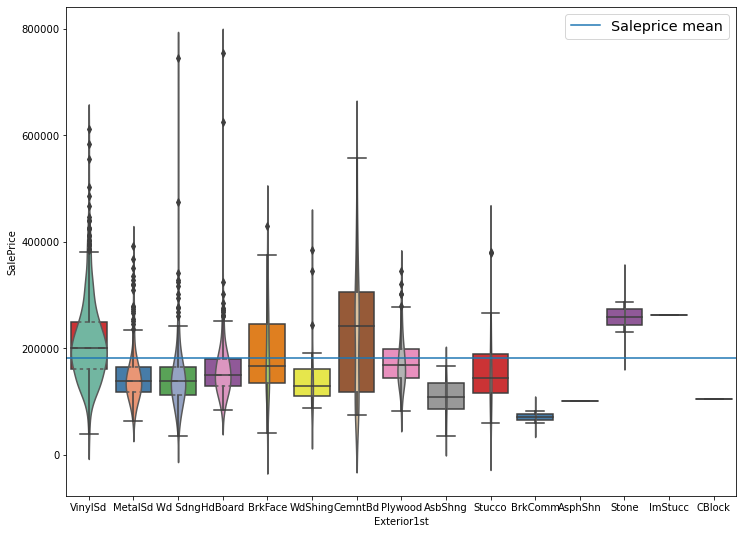

In [91]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='Exterior1st', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="Exterior1st", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [92]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['Exterior1st']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
VinylSd      0.302734
MetalSd      0.166065
Wd Sdng      0.158455
CemntBd      0.136214
AsbShng      0.109153
HdBoard      0.093701
BrkComm      0.051362
WdShing      0.050953
Stone        0.036551
BrkFace      0.033447
Stucco       0.029334
ImStucc      0.026996
AsphShn      0.026694
CBlock       0.025037
Plywood      0.016471
Name: SalePrice, dtype: float64

In [93]:
# VinylSd has higher than 0.3 correlation
train_fe = pd.concat([train_fe, pd.get_dummies(train_fe['Exterior1st'])['VinylSd'].rename('Ext_1st_VinylSd')], axis = 1)
train_fe = train_fe.drop(columns=['Exterior1st'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd Exterior2nd  \
0            65.0     8450            7       2003          2003     VinylSd   
1            80.0     9600            6       1976          1976     MetalSd   
2            68.0    11250            7       2001          2002     VinylSd   
3            60.0     9550            7       1915          1970     Wd Shng   
4            84.0    14260            8       2000          2000     VinylSd   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000     VinylSd   
1456         85.0    13175            6       1978          1988     Plywood   
1457         66.0     9042            7       1941          2006     CmentBd   
1458         68.0     9717            5       1950          1996     MetalSd   
1459         75.0     9937            5       1965          1965     HdBoard   

     MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0       BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1          None         0.0        TA        TA     CBlock       Gd       TA   
2       BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3          None         0.0        TA        TA     BrkTil       TA       Gd   
4       BrkFace       350.0        Gd        TA      PConc       Gd       TA   
...         ...         ...       ...       ...        ...      ...      ...   
1455       None         0.0        TA        TA      PConc       Gd       TA   
1456      Stone       119.0        TA        TA     CBlock       Gd       TA   
1457       None         0.0        Ex        Gd      Stone       TA       Gd   
1458       None         0.0        TA        TA     CBlock       TA       TA   
1459       None         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0              No          GLQ         706          Unf           0   
1              Gd          ALQ         978          Unf           0   
2              Mn          GLQ         486          Unf           0   
3              No          ALQ         216          Unf           0   
4              Av          GLQ         655          Unf           0   
...           ...          ...         ...          ...         ...   
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0           150          856    GasA        Ex          Y      SBrkr   
1           284         1262    GasA        Ex          Y      SBrkr   
2           434          920    GasA        Ex          Y      SBrkr   
3           540          756    GasA        Gd          Y      SBrkr   
4           490         1145    GasA        Ex          Y      SBrkr   
...         ...          ...     ...       ...        ...        ...   
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0          856       854             0       1710             1             0   
1         1262         0             0       1262             0             1   
2          920       866             0       1786             1             0   
3          961       756             0    

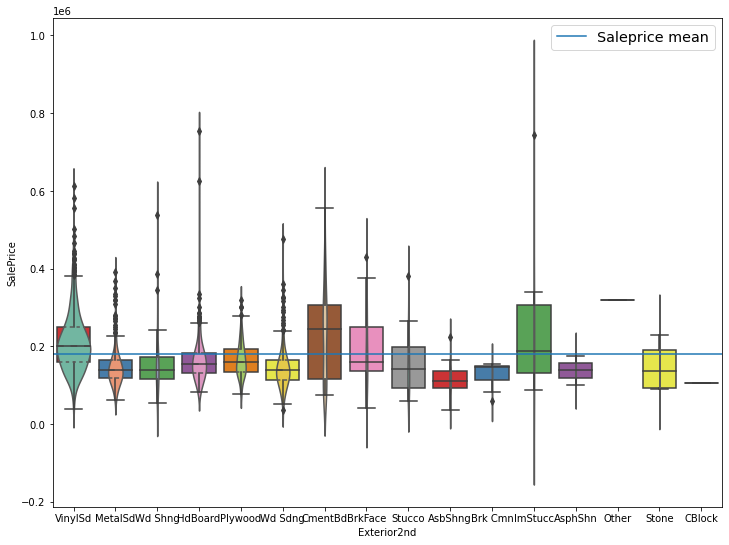

In [94]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='Exterior2nd', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="Exterior2nd", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [95]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['Exterior2nd']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
VinylSd      0.304072
MetalSd      0.161386
Wd Sdng      0.160878
CmentBd      0.130809
AsbShng      0.099194
ImStucc      0.075197
HdBoard      0.066330
Plywood      0.051680
Brk Cmn      0.047300
Other        0.045888
Stucco       0.042003
Wd Shng      0.039770
BrkFace      0.025522
CBlock       0.025037
AsphShn      0.024439
Stone        0.021843
Name: SalePrice, dtype: float64

In [96]:
# VinylSd has higher than 0.3 correlation
train_fe = pd.concat([train_fe, pd.get_dummies(train_fe['Exterior2nd'])['VinylSd'].rename('Ext_2nd_VinylSd')], axis = 1)
train_fe = train_fe.drop(columns=['Exterior2nd'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd MasVnrType  \
0            65.0     8450            7       2003          2003    BrkFace   
1            80.0     9600            6       1976          1976       None   
2            68.0    11250            7       2001          2002    BrkFace   
3            60.0     9550            7       1915          1970       None   
4            84.0    14260            8       2000          2000    BrkFace   
...           ...      ...          ...        ...           ...        ...   
1455         62.0     7917            6       1999          2000       None   
1456         85.0    13175            6       1978          1988      Stone   
1457         66.0     9042            7       1941          2006       None   
1458         68.0     9717            5       1950          1996       None   
1459         75.0     9937            5       1965          1965       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   
...          ...       ...       ...        ...      ...      ...   
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0              No          GLQ         706          Unf           0   
1              Gd          ALQ         978          Unf           0   
2              Mn          GLQ         486          Unf           0   
3              No          ALQ         216          Unf           0   
4              Av          GLQ         655          Unf           0   
...           ...          ...         ...          ...         ...   
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0           150          856    GasA        Ex          Y      SBrkr   
1           284         1262    GasA        Ex          Y      SBrkr   
2           434          920    GasA        Ex          Y      SBrkr   
3           540          756    GasA        Gd          Y      SBrkr   
4           490         1145    GasA        Ex          Y      SBrkr   
...         ...          ...     ...       ...        ...        ...   
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0          856       854             0       1710             1             0   
1         1262         0             0       1262             0             1   
2          920       866             0       1786             1             0   
3          961       756             0       1717             1             0   
4         1145      1053             0       2198             1             0   
...        ...       ...

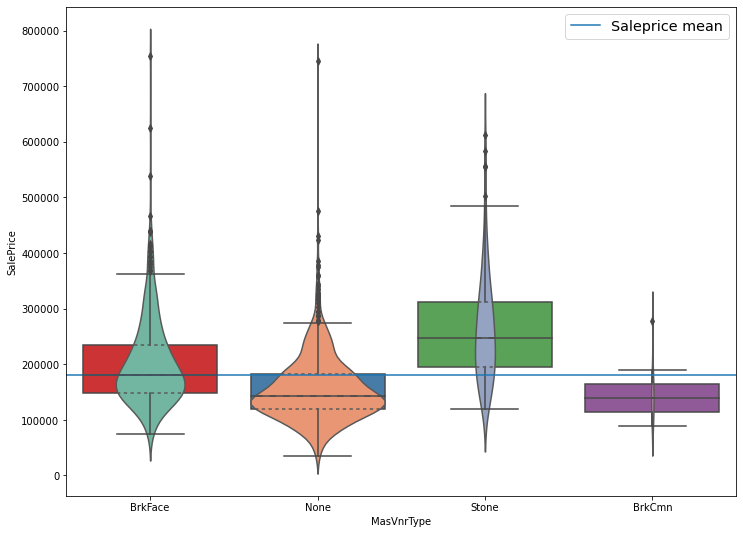

In [97]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='MasVnrType', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="MasVnrType", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [98]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['MasVnrType']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
None         0.372452
Stone        0.333842
BrkFace      0.200820
BrkCmn       0.044147
Name: SalePrice, dtype: float64

In [99]:
# None, Stone have higher than 0.3 correlation
train_fe = pd.concat([train_fe, pd.get_dummies(train_fe['MasVnrType'])[['None','Stone']].rename(columns = {'None':'MasVnr_None','Stone':'MasVnr_Stone'})], axis = 1)
train_fe = train_fe.drop(columns=['MasVnrType'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0           Gd        TA      PConc       Gd       TA           No   
1           TA        TA     CBlock       Gd       TA           Gd   
2           Gd        TA      PConc       Gd       TA           Mn   
3           TA        TA     BrkTil       TA       Gd           No   
4           Gd        TA      PConc       Gd       TA           Av   
...        ...       ...        ...      ...      ...          ...   
1455        TA        TA      PConc       Gd       TA           No   
1456        TA        TA     CBlock       Gd       TA           No   
1457        Ex        Gd      Stone       TA       Gd           No   
1458        TA        TA     CBlock       TA       TA           Mn   
1459        Gd        TA     CBlock       TA       TA           No   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0             GLQ         706          Unf           0        150   
1             ALQ         978          Unf           0        284   
2             GLQ         486          Unf           0        434   
3             ALQ         216          Unf           0        540   
4             GLQ         655          Unf           0        490   
...           ...         ...          ...         ...        ...   
1455          Unf           0          Unf           0        953   
1456          ALQ         790          Rec         163        589   
1457          GLQ         275          Unf           0        877   
1458          GLQ          49          Rec        1029          0   
1459          BLQ         830          LwQ         290        136   

      TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0             856    GasA        Ex          Y      SBrkr       856       854   
1            1262    GasA        Ex          Y      SBrkr      1262         0   
2             920    GasA        Ex          Y      SBrkr       920       866   
3             756    GasA        Gd          Y      SBrkr       961       756   
4            1145    GasA        Ex          Y      SBrkr      1145      1053   
...           ...     ...       ...        ...        ...       ...       ...   
1455          953    GasA        Ex          Y      SBrkr       953       694   
1456         1542    GasA        TA          Y      SBrkr      2073         0   
1457         1152    GasA        Ex          Y      SBrkr      1188      1152   
1458         1078    GasA        Gd          Y      FuseA      1078         0   
1459         1256    GasA        Gd          Y      SBrkr      1256         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0                0       1710             1             0         2         1   
1                0       1262             0             1         2         0   
2                0       1786             1             0         2         1   
3                0       1717             1             0         1         0 

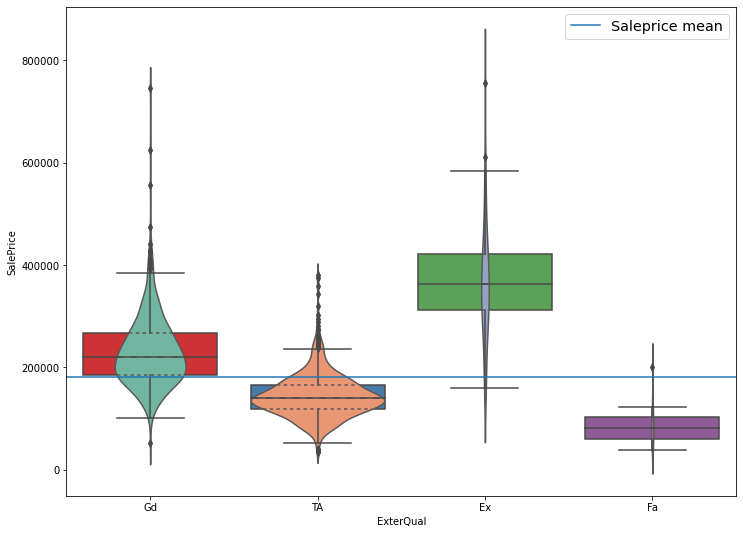

In [100]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='ExterQual', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="ExterQual", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [101]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['ExterQual']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
TA           0.589316
Gd           0.456125
Ex           0.445391
Fa           0.115299
Name: SalePrice, dtype: float64

In [102]:
# TA, Gd, Ex have higher than 0.3 correlation
train_fe = pd.concat([train_fe, pd.get_dummies(train_fe['ExterQual'])[['TA','Gd','Ex']].rename(columns = {'TA':'Ext_Qu_Avg','Gd':'Ext_Qu_Good','Ex':'Ext_Qu_Excel'})], axis = 1)
train_fe = train_fe.drop(columns=['ExterQual'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0           TA      PConc       Gd       TA           No          GLQ   
1           TA     CBlock       Gd       TA           Gd          ALQ   
2           TA      PConc       Gd       TA           Mn          GLQ   
3           TA     BrkTil       TA       Gd           No          ALQ   
4           TA      PConc       Gd       TA           Av          GLQ   
...        ...        ...      ...      ...          ...          ...   
1455        TA      PConc       Gd       TA           No          Unf   
1456        TA     CBlock       Gd       TA           No          ALQ   
1457        Gd      Stone       TA       Gd           No          GLQ   
1458        TA     CBlock       TA       TA           Mn          GLQ   
1459        TA     CBlock       TA       TA           No          BLQ   

      BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0            706          Unf           0        150          856    GasA   
1            978          Unf           0        284         1262    GasA   
2            486          Unf           0        434          920    GasA   
3            216          Unf           0        540          756    GasA   
4            655          Unf           0        490         1145    GasA   
...          ...          ...         ...        ...          ...     ...   
1455           0          Unf           0        953          953    GasA   
1456         790          Rec         163        589         1542    GasA   
1457         275          Unf           0        877         1152    GasA   
1458          49          Rec        1029          0         1078    GasA   
1459         830          LwQ         290        136         1256    GasA   

     HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           Ex          Y      SBrkr       856       854             0   
1           Ex          Y      SBrkr      1262         0             0   
2           Ex          Y      SBrkr       920       866             0   
3           Gd          Y      SBrkr       961       756             0   
4           Ex          Y      SBrkr      1145      1053             0   
...        ...        ...        ...       ...       ...           ...   
1455        Ex          Y      SBrkr       953       694             0   
1456        TA          Y      SBrkr      2073         0             0   
1457        Ex          Y      SBrkr      1188      1152             0   
1458        Gd          Y      FuseA      1078         0             0   
1459        Gd          Y      SBrkr      1256         0             0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0          1710             1             0         2         1             3   
1          1262             0             1         2         0             3   
2          1786             1             0         2         1             3   
3          1717             1 

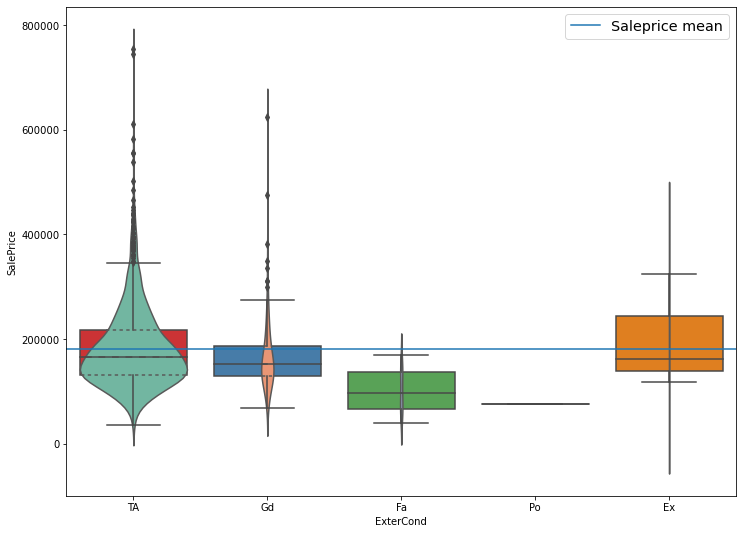

In [103]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='ExterCond', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="ExterCond", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [104]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['ExterCond']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
Fa           0.137995
TA           0.104063
Gd           0.049168
Po           0.034483
Ex           0.011942
Name: SalePrice, dtype: float64

In [105]:
# no features has high correlation
train_fe = train_fe.drop(columns=['ExterCond'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0         PConc       Gd       TA           No          GLQ         706   
1        CBlock       Gd       TA           Gd          ALQ         978   
2         PConc       Gd       TA           Mn          GLQ         486   
3        BrkTil       TA       Gd           No          ALQ         216   
4         PConc       Gd       TA           Av          GLQ         655   
...         ...      ...      ...          ...          ...         ...   
1455      PConc       Gd       TA           No          Unf           0   
1456     CBlock       Gd       TA           No          ALQ         790   
1457      Stone       TA       Gd           No          GLQ         275   
1458     CBlock       TA       TA           Mn          GLQ          49   
1459     CBlock       TA       TA           No          BLQ         830   

     BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0             Unf           0        150          856    GasA        Ex   
1             Unf           0        284         1262    GasA        Ex   
2             Unf           0        434          920    GasA        Ex   
3             Unf           0        540          756    GasA        Gd   
4             Unf           0        490         1145    GasA        Ex   
...           ...         ...        ...          ...     ...       ...   
1455          Unf           0        953          953    GasA        Ex   
1456          Rec         163        589         1542    GasA        TA   
1457          Unf           0        877         1152    GasA        Ex   
1458          Rec        1029          0         1078    GasA        Gd   
1459          LwQ         290        136         1256    GasA        Gd   

     CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0             Y      SBrkr       856       854             0       1710   
1             Y      SBrkr      1262         0             0       1262   
2             Y      SBrkr       920       866             0       1786   
3             Y      SBrkr       961       756             0       1717   
4             Y      SBrkr      1145      1053             0       2198   
...         ...        ...       ...       ...           ...        ...   
1455          Y      SBrkr       953       694             0       1647   
1456          Y      SBrkr      2073         0             0       2073   
1457          Y      SBrkr      1188      1152             0       2340   
1458          Y      FuseA      1078         0             0       1078   
1459          Y      SBrkr      1256         0             0       1256   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0                1             0         2         1             3   
1                0             1         2         0             3   
2                1             0         2         1             3   
3                1             0         1         0          

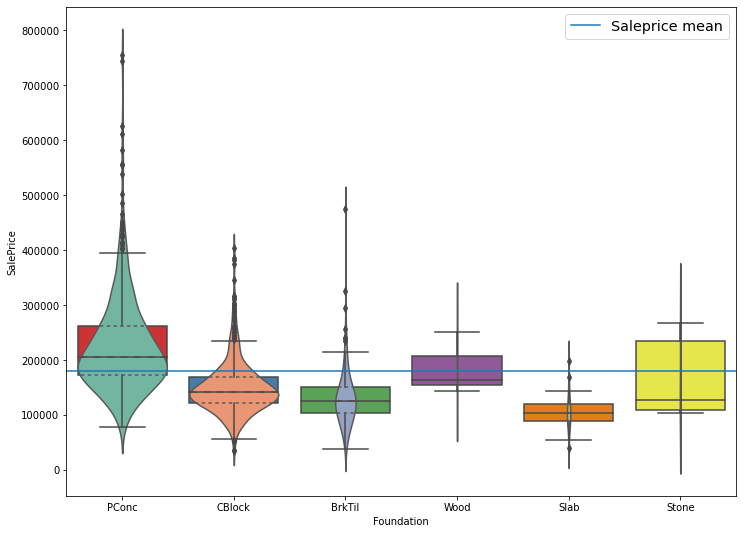

In [106]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='Foundation', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="Foundation", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [107]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['Foundation']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
PConc        0.497428
CBlock       0.341918
BrkTil       0.203705
Slab         0.119771
Stone        0.011861
Wood         0.002942
Name: SalePrice, dtype: float64

In [108]:
# PConc,CBlock have higher than 0.3 correlation
train_fe = pd.concat([train_fe, pd.get_dummies(train_fe['Foundation'])[['PConc','CBlock']].rename(columns = {'PConc':'Fnd_PouredConc','CBlock':'Fnd_CinderBlk'})], axis = 1)
train_fe = train_fe.drop(columns=['Foundation'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

     BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0          Gd       TA           No          GLQ         706          Unf   
1          Gd       TA           Gd          ALQ         978          Unf   
2          Gd       TA           Mn          GLQ         486          Unf   
3          TA       Gd           No          ALQ         216          Unf   
4          Gd       TA           Av          GLQ         655          Unf   
...       ...      ...          ...          ...         ...          ...   
1455       Gd       TA           No          Unf           0          Unf   
1456       Gd       TA           No          ALQ         790          Rec   
1457       TA       Gd           No          GLQ         275          Unf   
1458       TA       TA           Mn          GLQ          49          Rec   
1459       TA       TA           No          BLQ         830          LwQ   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir  \
0              0        150          856    GasA        Ex          Y   
1              0        284         1262    GasA        Ex          Y   
2              0        434          920    GasA        Ex          Y   
3              0        540          756    GasA        Gd          Y   
4              0        490         1145    GasA        Ex          Y   
...          ...        ...          ...     ...       ...        ...   
1455           0        953          953    GasA        Ex          Y   
1456         163        589         1542    GasA        TA          Y   
1457           0        877         1152    GasA        Ex          Y   
1458        1029          0         1078    GasA        Gd          Y   
1459         290        136         1256    GasA        Gd          Y   

     Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0         SBrkr       856       854             0       1710             1   
1         SBrkr      1262         0             0       1262             0   
2         SBrkr       920       866             0       1786             1   
3         SBrkr       961       756             0       1717             1   
4         SBrkr      1145      1053             0       2198             1   
...         ...       ...       ...           ...        ...           ...   
1455      SBrkr       953       694             0       1647             0   
1456      SBrkr      2073         0             0       2073             1   
1457      SBrkr      1188      1152             0       2340             0   
1458      FuseA      1078         0             0       1078             1   
1459      SBrkr      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0        

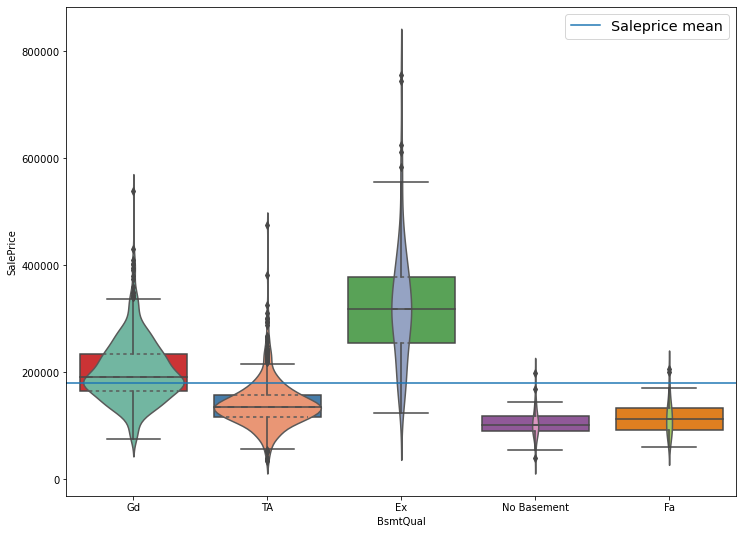

In [109]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='BsmtQual', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="BsmtQual", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [110]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['BsmtQual']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice      1.000000
Ex             0.550811
TA             0.452339
Gd             0.236977
No Basement    0.152892
Fa             0.128678
Name: SalePrice, dtype: float64

In [111]:
# Ex, TA have higher than 0.3 correlation
train_fe = pd.concat([train_fe, pd.get_dummies(train_fe['BsmtQual'])[['Ex','TA']].rename(columns = {'Ex':'BsmtQual_Excel','TA':'BsmtQual_Avg'})], axis = 1)
train_fe = train_fe.drop(columns=['BsmtQual'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

     BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0          TA           No          GLQ         706          Unf           0   
1          TA           Gd          ALQ         978          Unf           0   
2          TA           Mn          GLQ         486          Unf           0   
3          Gd           No          ALQ         216          Unf           0   
4          TA           Av          GLQ         655          Unf           0   
...       ...          ...          ...         ...          ...         ...   
1455       TA           No          Unf           0          Unf           0   
1456       TA           No          ALQ         790          Rec         163   
1457       Gd           No          GLQ         275          Unf           0   
1458       TA           Mn          GLQ          49          Rec        1029   
1459       TA           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0           150          856    GasA        Ex          Y      SBrkr   
1           284         1262    GasA        Ex          Y      SBrkr   
2           434          920    GasA        Ex          Y      SBrkr   
3           540          756    GasA        Gd          Y      SBrkr   
4           490         1145    GasA        Ex          Y      SBrkr   
...         ...          ...     ...       ...        ...        ...   
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0          856       854             0       1710             1             0   
1         1262         0             0       1262             0             1   
2          920       866             0       1786             1             0   
3          961       756             0       1717             1             0   
4         1145      1053             0       2198             1             0   
...        ...       ...           ...        ...           ...           ...   
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0            2         1             3             1          Gd   
1            2         0             3             1          TA   
2            2         1             3    

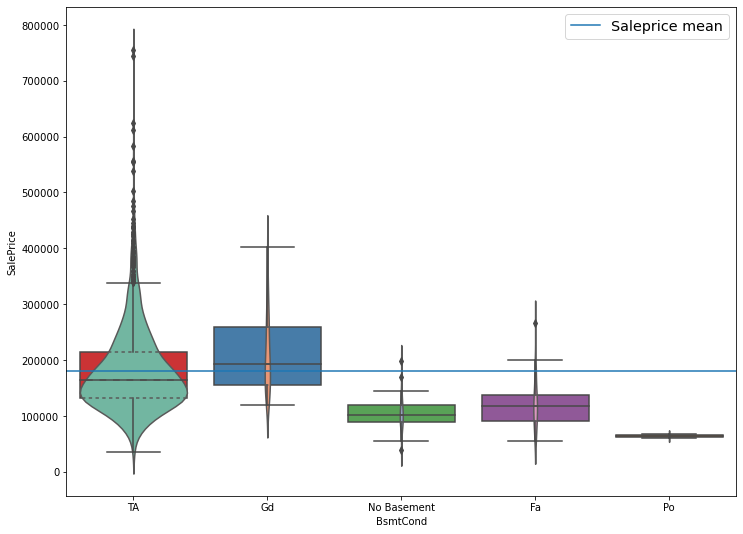

In [112]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='BsmtCond', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="BsmtCond", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [113]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['BsmtCond']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice      1.000000
No Basement    0.152892
Fa             0.132614
TA             0.108727
Gd             0.078965
Po             0.054644
Name: SalePrice, dtype: float64

In [114]:
# no features has high correlation
train_fe = train_fe.drop(columns=['BsmtCond'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0              No          GLQ         706          Unf           0   
1              Gd          ALQ         978          Unf           0   
2              Mn          GLQ         486          Unf           0   
3              No          ALQ         216          Unf           0   
4              Av          GLQ         655          Unf           0   
...           ...          ...         ...          ...         ...   
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0           150          856    GasA        Ex          Y      SBrkr   
1           284         1262    GasA        Ex          Y      SBrkr   
2           434          920    GasA        Ex          Y      SBrkr   
3           540          756    GasA        Gd          Y      SBrkr   
4           490         1145    GasA        Ex          Y      SBrkr   
...         ...          ...     ...       ...        ...        ...   
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0          856       854             0       1710             1             0   
1         1262         0             0       1262             0             1   
2          920       866             0       1786             1             0   
3          961       756             0       1717             1             0   
4         1145      1053             0       2198             1             0   
...        ...       ...           ...        ...           ...           ...   
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0            2         1             3             1          Gd   
1            2         0             3             1          TA   
2            2         1             3             1          Gd   
3            1         0             3             1          Gd   
4            2

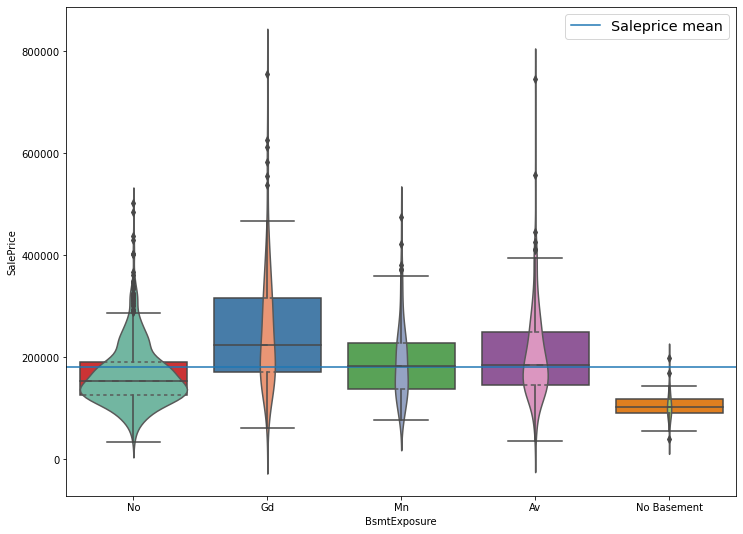

In [115]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='BsmtExposure', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="BsmtExposure", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [116]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['BsmtExposure']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice      1.000000
Gd             0.303048
No             0.263863
No Basement    0.152892
Av             0.139633
Mn             0.045128
Name: SalePrice, dtype: float64

In [117]:
# Gd has higher than 0.3 correlation
train_fe = pd.concat([train_fe, pd.get_dummies(train_fe['BsmtExposure'])[['Gd']].rename(columns = {'Gd':'Bsmt_Exposure_Good'})], axis = 1)
train_fe = train_fe.drop(columns=['BsmtExposure'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0             GLQ         706          Unf           0        150   
1             ALQ         978          Unf           0        284   
2             GLQ         486          Unf           0        434   
3             ALQ         216          Unf           0        540   
4             GLQ         655          Unf           0        490   
...           ...         ...          ...         ...        ...   
1455          Unf           0          Unf           0        953   
1456          ALQ         790          Rec         163        589   
1457          GLQ         275          Unf           0        877   
1458          GLQ          49          Rec        1029          0   
1459          BLQ         830          LwQ         290        136   

      TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0             856    GasA        Ex          Y      SBrkr       856       854   
1            1262    GasA        Ex          Y      SBrkr      1262         0   
2             920    GasA        Ex          Y      SBrkr       920       866   
3             756    GasA        Gd          Y      SBrkr       961       756   
4            1145    GasA        Ex          Y      SBrkr      1145      1053   
...           ...     ...       ...        ...        ...       ...       ...   
1455          953    GasA        Ex          Y      SBrkr       953       694   
1456         1542    GasA        TA          Y      SBrkr      2073         0   
1457         1152    GasA        Ex          Y      SBrkr      1188      1152   
1458         1078    GasA        Gd          Y      FuseA      1078         0   
1459         1256    GasA        Gd          Y      SBrkr      1256         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0                0       1710             1             0         2         1   
1                0       1262             0             1         2         0   
2                0       1786             1             0         2         1   
3                0       1717             1             0         1         0   
4                0       2198             1             0         2         1   
...            ...        ...           ...           ...       ...       ...   
1455             0       1647             0             0         2         1   
1456             0       2073             1             0         2         0   
1457             0       2340             0             0         2         0   
1458             0       1078             1             0         1         0   
1459             0       1256             1             0         1         1   

      BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0                3             1          Gd             8        Typ   
1                3             1          TA             6        Typ   
2                3             1          Gd       

In [118]:
# fig, ax =plt.subplots(1,1, figsize=(12,9))
# sns.boxplot(data= train_fe, x='BsmtFinType1', y='SalePrice', palette='Set1')
# sns.violinplot(y="SalePrice", x="BsmtFinType1", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
# plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
# plt.legend(fontsize = 'x-large');

In [119]:
# # correlation check
# abs(pd.concat([pd.get_dummies(train_fe['BsmtFinType1']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

In [120]:
# # GLQ has higher than 0.3 correlation
# train_fe = pd.concat([train_fe, pd.get_dummies(train_fe['BsmtFinType1'])[['GLQ']].rename(columns = {'GLQ':'Bsmt_FinTy1_GLQ'})], axis = 1)
# train_fe = train_fe.drop(columns=['BsmtFinType1'])
# train_fe

In [121]:
# fig, ax =plt.subplots(1,1, figsize=(12,9))
# sns.boxplot(data= train_fe, x='BsmtFinType2', y='SalePrice', palette='Set1')
# sns.violinplot(y="SalePrice", x="BsmtFinType2", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
# plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
# plt.legend(fontsize = 'x-large');

In [122]:
# # correlation check
# abs(pd.concat([pd.get_dummies(train_fe['BsmtFinType2']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

In [123]:
# # no features has high correlation
# train_fe = train_fe.drop(columns=['BsmtFinType2'])
# train_fe

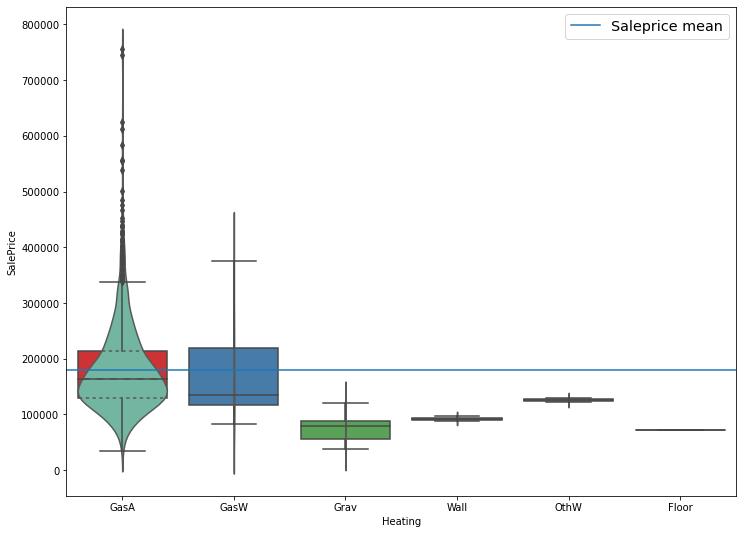

In [124]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='Heating', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="Heating", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [125]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['Heating']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
Grav         0.092502
GasA         0.092318
Wall         0.058686
Floor        0.035809
OthW         0.025691
GasW         0.019678
Name: SalePrice, dtype: float64

In [126]:
# no features has high correlation
train_fe = train_fe.drop(columns=['Heating'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0             GLQ         706          Unf           0        150   
1             ALQ         978          Unf           0        284   
2             GLQ         486          Unf           0        434   
3             ALQ         216          Unf           0        540   
4             GLQ         655          Unf           0        490   
...           ...         ...          ...         ...        ...   
1455          Unf           0          Unf           0        953   
1456          ALQ         790          Rec         163        589   
1457          GLQ         275          Unf           0        877   
1458          GLQ          49          Rec        1029          0   
1459          BLQ         830          LwQ         290        136   

      TotalBsmtSF HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0             856        Ex          Y      SBrkr       856       854   
1            1262        Ex          Y      SBrkr      1262         0   
2             920        Ex          Y      SBrkr       920       866   
3             756        Gd          Y      SBrkr       961       756   
4            1145        Ex          Y      SBrkr      1145      1053   
...           ...       ...        ...        ...       ...       ...   
1455          953        Ex          Y      SBrkr       953       694   
1456         1542        TA          Y      SBrkr      2073         0   
1457         1152        Ex          Y      SBrkr      1188      1152   
1458         1078        Gd          Y      FuseA      1078         0   
1459         1256        Gd          Y      SBrkr      1256         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0                0       1710             1             0         2         1   
1                0       1262             0             1         2         0   
2                0       1786             1             0         2         1   
3                0       1717             1             0         1         0   
4                0       2198             1             0         2         1   
...            ...        ...           ...           ...       ...       ...   
1455             0       1647             0             0         2         1   
1456             0       2073             1             0         2         0   
1457             0       2340             0             0         2         0   
1458             0       1078             1             0         1         0   
1459             0       1256             1             0         1         1   

      BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0                3             1          Gd             8        Typ   
1                3             1          TA             6        Typ   
2                3             1          Gd             6        Typ   
3                3             1          Gd             7        Typ   
4

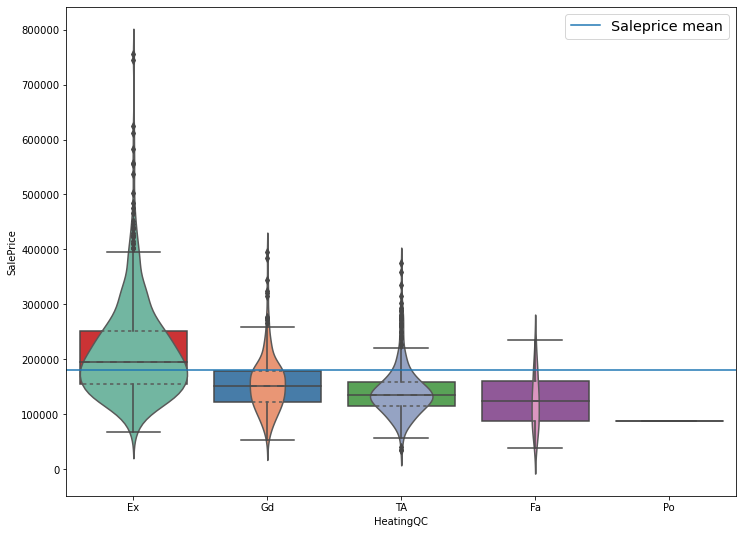

In [127]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='HeatingQC', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="HeatingQC", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [128]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['HeatingQC']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
Ex           0.433903
TA           0.312364
Fa           0.133602
Gd           0.133340
Po           0.031003
Name: SalePrice, dtype: float64

In [129]:
# GLQ has higher than 0.3 correlation
train_fe = pd.concat([train_fe, pd.get_dummies(train_fe['HeatingQC'])[['Ex','TA']].rename(columns = {'Ex':'Heat_Qu_Excel','TA':'Heat_Qu_Avg'})], axis = 1)
train_fe = train_fe.drop(columns=['HeatingQC'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0             GLQ         706          Unf           0        150   
1             ALQ         978          Unf           0        284   
2             GLQ         486          Unf           0        434   
3             ALQ         216          Unf           0        540   
4             GLQ         655          Unf           0        490   
...           ...         ...          ...         ...        ...   
1455          Unf           0          Unf           0        953   
1456          ALQ         790          Rec         163        589   
1457          GLQ         275          Unf           0        877   
1458          GLQ          49          Rec        1029          0   
1459          BLQ         830          LwQ         290        136   

      TotalBsmtSF CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0             856          Y      SBrkr       856       854             0   
1            1262          Y      SBrkr      1262         0             0   
2             920          Y      SBrkr       920       866             0   
3             756          Y      SBrkr       961       756             0   
4            1145          Y      SBrkr      1145      1053             0   
...           ...        ...        ...       ...       ...           ...   
1455          953          Y      SBrkr       953       694             0   
1456         1542          Y      SBrkr      2073         0             0   
1457         1152          Y      SBrkr      1188      1152             0   
1458         1078          Y      FuseA      1078         0             0   
1459         1256          Y      SBrkr      1256         0             0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0          1710             1             0         2         1             3   
1          1262             0             1         2         0             3   
2          1786             1             0         2         1             3   
3          1717             1             0         1         0             3   
4          2198             1             0         2         1             4   
...         ...           ...           ...       ...       ...           ...   
1455       1647             0             0         2         1             3   
1456       2073             1             0         2         0             3   
1457       2340             0             0         2         0             4   
1458       1078             1             0         1         0             2   
1459       1256             1             0         1         1             3   

      KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0                1          Gd             8        Typ           0   
1                1          TA             6        Typ           1   
2                1          Gd             6        Typ           1   
3                1          Gd    

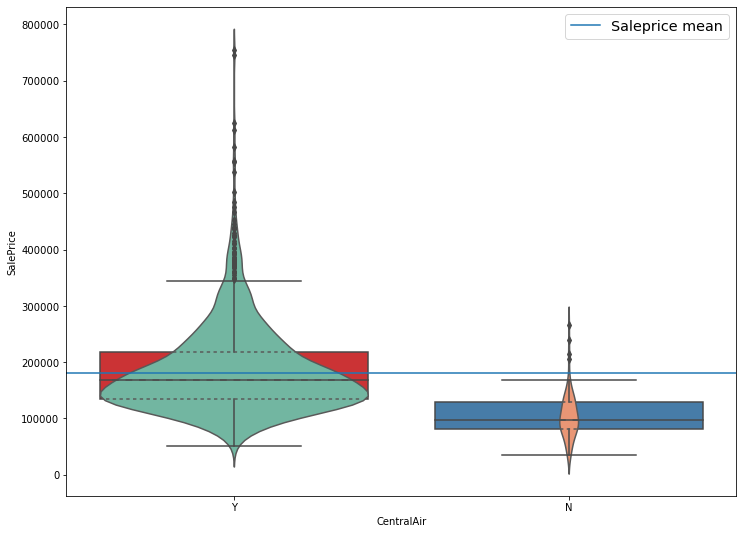

In [130]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='CentralAir', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="CentralAir", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [131]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['CentralAir']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.00000
N            0.25148
Y            0.25148
Name: SalePrice, dtype: float64

In [132]:
# no features has high correlation
train_fe = train_fe.drop(columns=['CentralAir'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0             GLQ         706          Unf           0        150   
1             ALQ         978          Unf           0        284   
2             GLQ         486          Unf           0        434   
3             ALQ         216          Unf           0        540   
4             GLQ         655          Unf           0        490   
...           ...         ...          ...         ...        ...   
1455          Unf           0          Unf           0        953   
1456          ALQ         790          Rec         163        589   
1457          GLQ         275          Unf           0        877   
1458          GLQ          49          Rec        1029          0   
1459          BLQ         830          LwQ         290        136   

      TotalBsmtSF Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0             856      SBrkr       856       854             0       1710   
1            1262      SBrkr      1262         0             0       1262   
2             920      SBrkr       920       866             0       1786   
3             756      SBrkr       961       756             0       1717   
4            1145      SBrkr      1145      1053             0       2198   
...           ...        ...       ...       ...           ...        ...   
1455          953      SBrkr       953       694             0       1647   
1456         1542      SBrkr      2073         0             0       2073   
1457         1152      SBrkr      1188      1152             0       2340   
1458         1078      FuseA      1078         0             0       1078   
1459         1256      SBrkr      1256         0             0       1256   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0                1             0         2         1             3   
1                0             1         2         0             3   
2                1             0         2         1             3   
3                1             0         1         0             3   
4                1             0         2         1             4   
...            ...           ...       ...       ...           ...   
1455             0             0         2         1             3   
1456             1             0         2         0             3   
1457             0             0         2         0             4   
1458             1             0         1         0             2   
1459             1             0         1         1             3   

      KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0                1          Gd             8        Typ           0   
1                1          TA             6        Typ           1   
2                1          Gd             6        Typ           1   
3                1          Gd             7        Typ           1   
4                1          Gd             9        Typ           1   
...            ...      

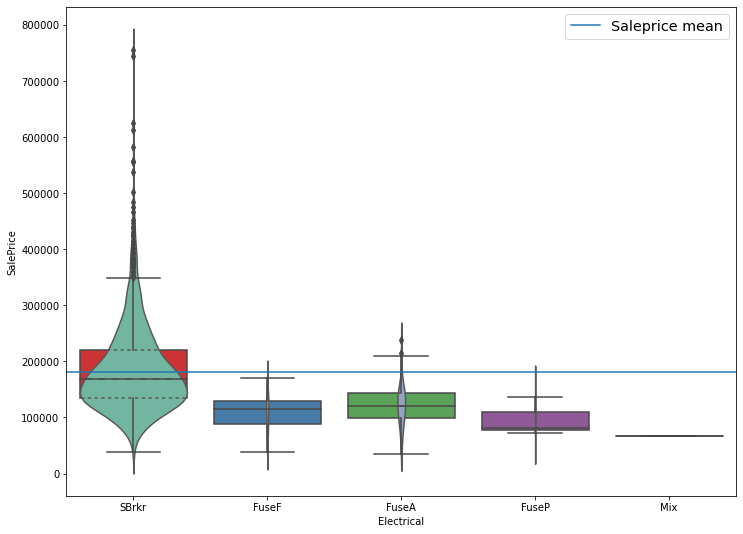

In [133]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='Electrical', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="Electrical", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [134]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['Electrical']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
SBrkr        0.242280
FuseA        0.193815
FuseF        0.126632
FuseP        0.047800
Mix          0.037631
Name: SalePrice, dtype: float64

In [135]:
# no features has high correlation
train_fe = train_fe.drop(columns=['Electrical'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0             GLQ         706          Unf           0        150   
1             ALQ         978          Unf           0        284   
2             GLQ         486          Unf           0        434   
3             ALQ         216          Unf           0        540   
4             GLQ         655          Unf           0        490   
...           ...         ...          ...         ...        ...   
1455          Unf           0          Unf           0        953   
1456          ALQ         790          Rec         163        589   
1457          GLQ         275          Unf           0        877   
1458          GLQ          49          Rec        1029          0   
1459          BLQ         830          LwQ         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

     KitchenQual  TotRmsAbvGrd Functional  Fireplaces   FireplaceQu  \
0             Gd             8        Typ           0  No Fireplace   
1             TA             6        Typ           1            TA   
2             Gd             6        Typ           1            TA   
3             Gd             7        Typ           1            Gd   
4             Gd             9        Typ           1      

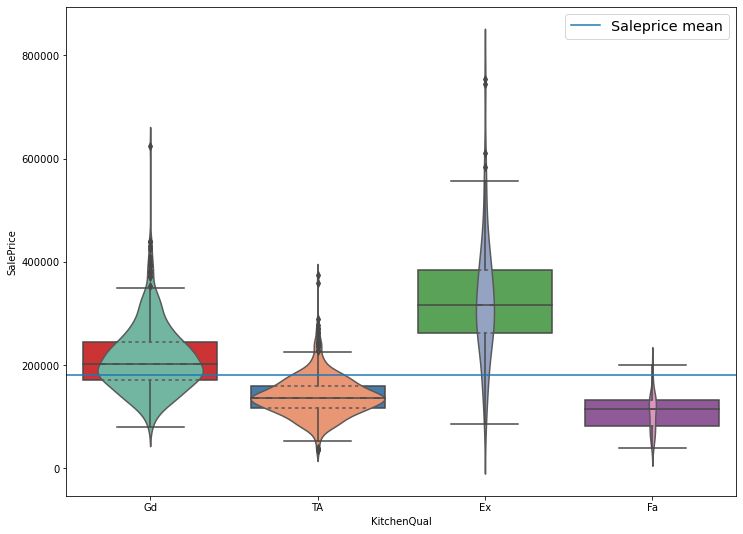

In [136]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='KitchenQual', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="KitchenQual", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [137]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['KitchenQual']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
TA           0.519615
Ex           0.500781
Gd           0.324576
Fa           0.157265
Name: SalePrice, dtype: float64

In [138]:
# TA, Ex, Gd has higher than 0.3 correlation
train_fe = pd.concat([train_fe, pd.get_dummies(train_fe['KitchenQual'])[['TA','Ex','Gd']].rename(columns = {'TA':'Kitchen_Qu_Avg','Ex':'Kitchen_Qu_Excel','Gd':'Kitchen_Qu_Good'})], axis = 1)
train_fe = train_fe.drop(columns=['KitchenQual'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0             GLQ         706          Unf           0        150   
1             ALQ         978          Unf           0        284   
2             GLQ         486          Unf           0        434   
3             ALQ         216          Unf           0        540   
4             GLQ         655          Unf           0        490   
...           ...         ...          ...         ...        ...   
1455          Unf           0          Unf           0        953   
1456          ALQ         790          Rec         163        589   
1457          GLQ         275          Unf           0        877   
1458          GLQ          49          Rec        1029          0   
1459          BLQ         830          LwQ         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd Functional  Fireplaces   FireplaceQu GarageType  \
0                8        Typ           0  No Fireplace     Attchd   
1                6        Typ           1            TA     Attchd   
2                6        Typ           1            TA     Attchd   
3                7        Typ           1            Gd     Detchd   
4                9        Typ           1            TA     Attc

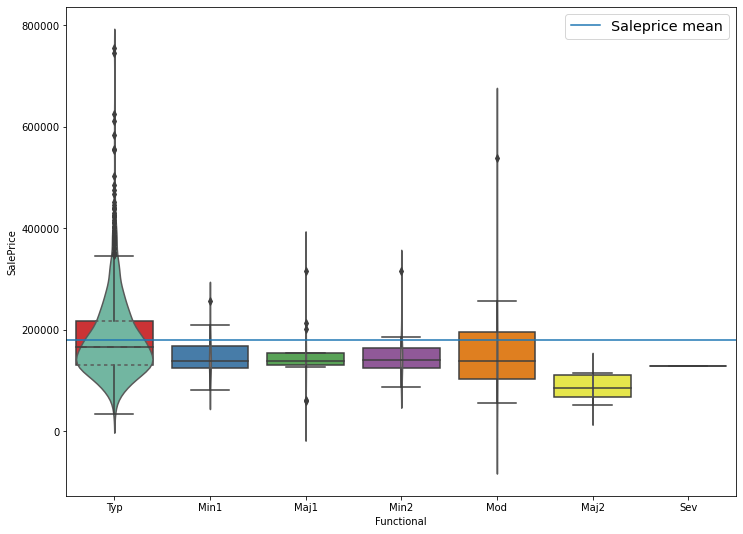

In [139]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='Functional', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="Functional", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [140]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['Functional']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
Typ          0.117057
Min2         0.070971
Maj2         0.070311
Min1         0.063697
Maj1         0.036223
Sev          0.017083
Mod          0.015673
Name: SalePrice, dtype: float64

In [141]:
# no features has high correlation
train_fe = train_fe.drop(columns=['Functional'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0             GLQ         706          Unf           0        150   
1             ALQ         978          Unf           0        284   
2             GLQ         486          Unf           0        434   
3             ALQ         216          Unf           0        540   
4             GLQ         655          Unf           0        490   
...           ...         ...          ...         ...        ...   
1455          Unf           0          Unf           0        953   
1456          ALQ         790          Rec         163        589   
1457          GLQ         275          Unf           0        877   
1458          GLQ          49          Rec        1029          0   
1459          BLQ         830          LwQ         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces   FireplaceQu GarageType  GarageYrBlt  \
0                8           0  No Fireplace     Attchd       2003.0   
1                6           1            TA     Attchd       1976.0   
2                6           1            TA     Attchd       2001.0   
3                7           1            Gd     Detchd       1998.0   
4                9           1            TA     Attch

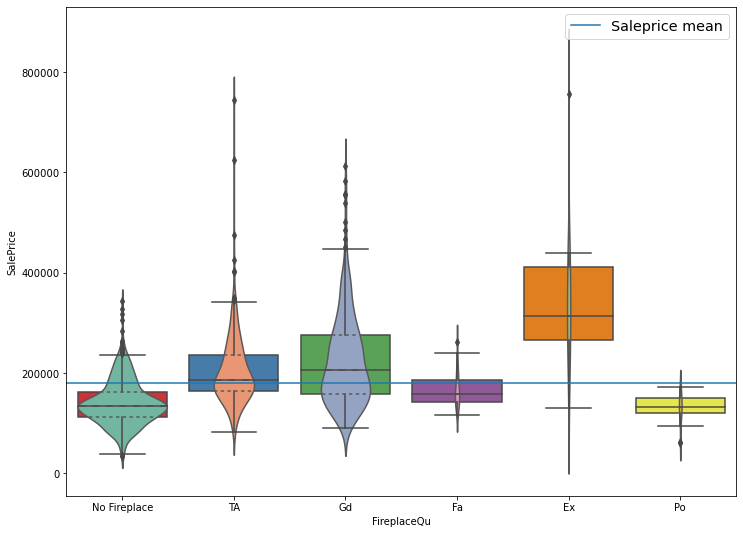

In [142]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='FireplaceQu', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="FireplaceQu", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [143]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['FireplaceQu']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice       1.000000
No Fireplace    0.472344
Gd              0.336499
Ex              0.257235
TA              0.165823
Po              0.075764
Fa              0.025502
Name: SalePrice, dtype: float64

In [144]:
# No Fireplace, Gd has higher than 0.3 correlation
train_fe = pd.concat([train_fe, pd.get_dummies(train_fe['FireplaceQu'])[['No Fireplace','Gd']].rename(columns = {'No Fireplace':'Fireplace_Qu_NA','Gd':'Fireplace_Qu_Good'})], axis = 1)
train_fe = train_fe.drop(columns=['FireplaceQu'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0             GLQ         706          Unf           0        150   
1             ALQ         978          Unf           0        284   
2             GLQ         486          Unf           0        434   
3             ALQ         216          Unf           0        540   
4             GLQ         655          Unf           0        490   
...           ...         ...          ...         ...        ...   
1455          Unf           0          Unf           0        953   
1456          ALQ         790          Rec         163        589   
1457          GLQ         275          Unf           0        877   
1458          GLQ          49          Rec        1029          0   
1459          BLQ         830          LwQ         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt GarageFinish  \
0                8           0     Attchd       2003.0          RFn   
1                6           1     Attchd       1976.0          RFn   
2                6           1     Attchd       2001.0          RFn   
3                7           1     Detchd       1998.0          Unf   
4                9           1     Attchd       2000.0     

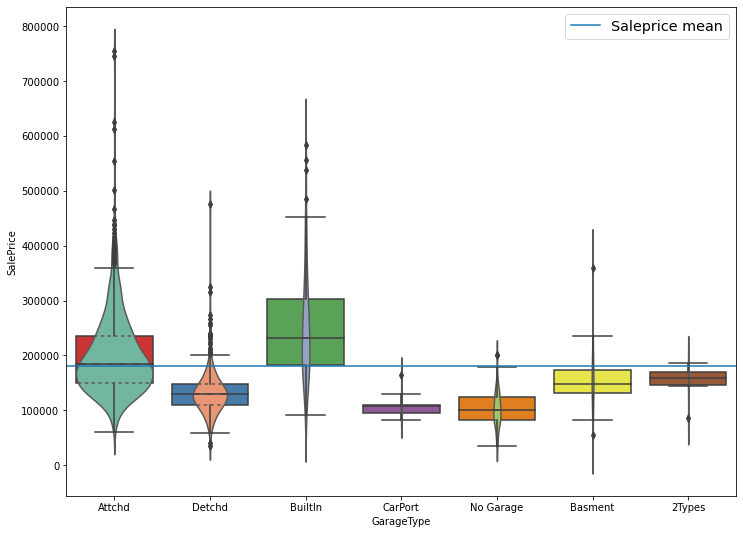

In [145]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='GarageType', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="GarageType", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [146]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['GarageType']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
Detchd       0.353655
Attchd       0.335278
BuiltIn      0.239703
No Garage    0.236995
CarPort      0.070373
Basment      0.029036
2Types       0.023796
Name: SalePrice, dtype: float64

In [147]:
# Detchd,Attchd has higher than 0.3 correlation
train_fe = pd.concat([train_fe, pd.get_dummies(train_fe['GarageType'])[['Detchd','Attchd']].rename(columns = {'Detchd':'Grg_Ty_Detchd','Attchd':'Grg_Ty_Attchd'})], axis = 1)
train_fe = train_fe.drop(columns=['GarageType'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0             GLQ         706          Unf           0        150   
1             ALQ         978          Unf           0        284   
2             GLQ         486          Unf           0        434   
3             ALQ         216          Unf           0        540   
4             GLQ         655          Unf           0        490   
...           ...         ...          ...         ...        ...   
1455          Unf           0          Unf           0        953   
1456          ALQ         790          Rec         163        589   
1457          GLQ         275          Unf           0        877   
1458          GLQ          49          Rec        1029          0   
1459          BLQ         830          LwQ         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt GarageFinish  GarageCars  \
0                8           0       2003.0          RFn           2   
1                6           1       1976.0          RFn           2   
2                6           1       2001.0          RFn           2   
3                7           1       1998.0          Unf           3   
4                9           1       2000.0          R

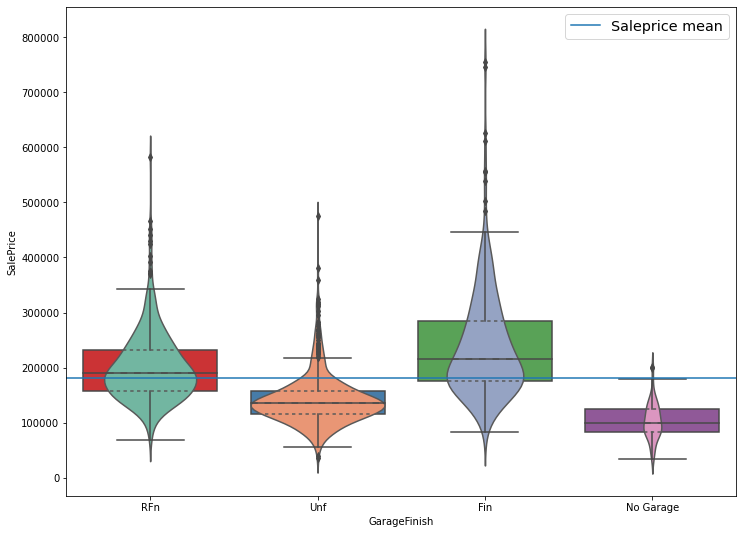

In [148]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='GarageFinish', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="GarageFinish", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [149]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['GarageFinish']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
Fin          0.420508
Unf          0.409895
No Garage    0.236995
RFn          0.170483
Name: SalePrice, dtype: float64

In [150]:
# Fin, Unf has higher than 0.3 correlation
train_fe = pd.concat([train_fe, pd.get_dummies(train_fe['GarageFinish'])[['Fin','Unf']].rename(columns = {'Fin':'Grg_Fin_Fin','Unf':'Grg_Fin_Unf'})], axis = 1)
train_fe = train_fe.drop(columns=['GarageFinish'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0             GLQ         706          Unf           0        150   
1             ALQ         978          Unf           0        284   
2             GLQ         486          Unf           0        434   
3             ALQ         216          Unf           0        540   
4             GLQ         655          Unf           0        490   
...           ...         ...          ...         ...        ...   
1455          Unf           0          Unf           0        953   
1456          ALQ         790          Rec         163        589   
1457          GLQ         275          Unf           0        877   
1458          GLQ          49          Rec        1029          0   
1459          BLQ         830          LwQ         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4                9           1       2000.0           3    

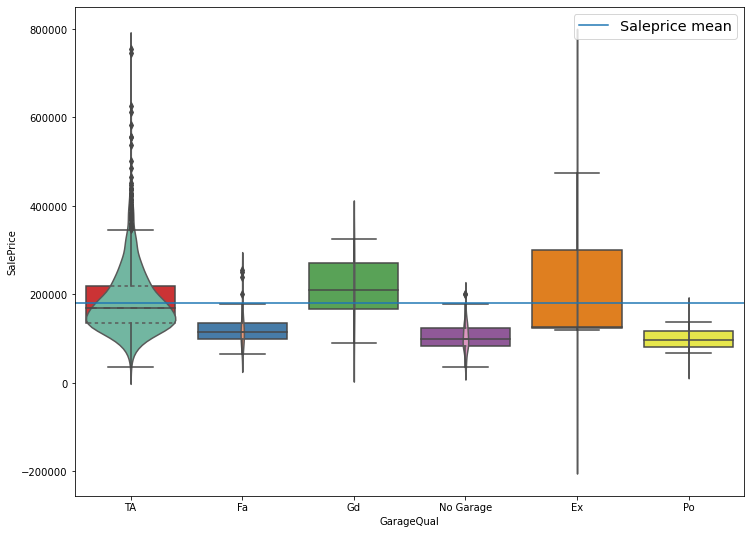

In [151]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='GarageQual', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="GarageQual", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [152]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['GarageQual']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
TA           0.245156
No Garage    0.236995
Fa           0.132992
Po           0.046172
Gd           0.043993
Ex           0.034728
Name: SalePrice, dtype: float64

In [153]:
# no features has high correlation
train_fe = train_fe.drop(columns=['GarageQual'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0             GLQ         706          Unf           0        150   
1             ALQ         978          Unf           0        284   
2             GLQ         486          Unf           0        434   
3             ALQ         216          Unf           0        540   
4             GLQ         655          Unf           0        490   
...           ...         ...          ...         ...        ...   
1455          Unf           0          Unf           0        953   
1456          ALQ         790          Rec         163        589   
1457          GLQ         275          Unf           0        877   
1458          GLQ          49          Rec        1029          0   
1459          BLQ         830          LwQ         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4                9           1       2000.0           3    

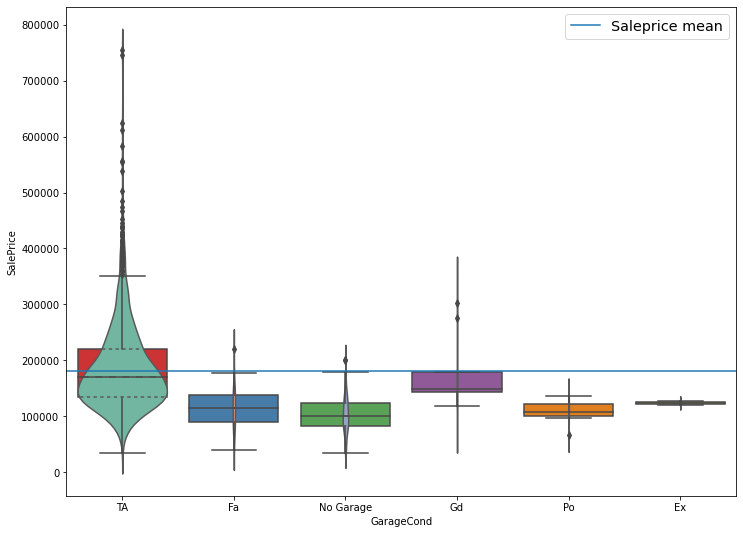

In [154]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='GarageCond', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="GarageCond", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [155]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['GarageCond']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
TA           0.275937
No Garage    0.236995
Fa           0.130738
Po           0.063305
Ex           0.026512
Gd           0.000613
Name: SalePrice, dtype: float64

In [156]:
# no features has high correlation
train_fe = train_fe.drop(columns=['GarageCond'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0             GLQ         706          Unf           0        150   
1             ALQ         978          Unf           0        284   
2             GLQ         486          Unf           0        434   
3             ALQ         216          Unf           0        540   
4             GLQ         655          Unf           0        490   
...           ...         ...          ...         ...        ...   
1455          Unf           0          Unf           0        953   
1456          ALQ         790          Rec         163        589   
1457          GLQ         275          Unf           0        877   
1458          GLQ          49          Rec        1029          0   
1459          BLQ         830          LwQ         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4                9           1       2000.0           3    

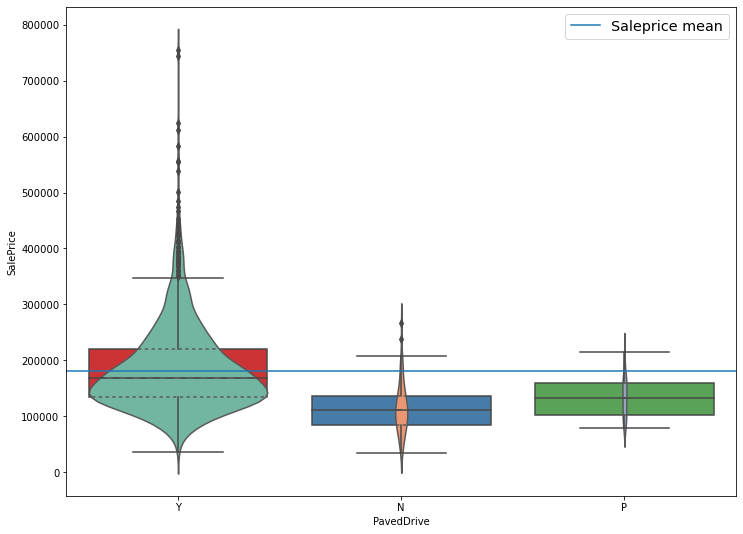

In [157]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='PavedDrive', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="PavedDrive", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [158]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['PavedDrive']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
Y            0.231860
N            0.212597
P            0.088413
Name: SalePrice, dtype: float64

In [159]:
# no features has high correlation
train_fe = train_fe.drop(columns=['PavedDrive'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0             GLQ         706          Unf           0        150   
1             ALQ         978          Unf           0        284   
2             GLQ         486          Unf           0        434   
3             ALQ         216          Unf           0        540   
4             GLQ         655          Unf           0        490   
...           ...         ...          ...         ...        ...   
1455          Unf           0          Unf           0        953   
1456          ALQ         790          Rec         163        589   
1457          GLQ         275          Unf           0        877   
1458          GLQ          49          Rec        1029          0   
1459          BLQ         830          LwQ         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4                9           1       2000.0           3    

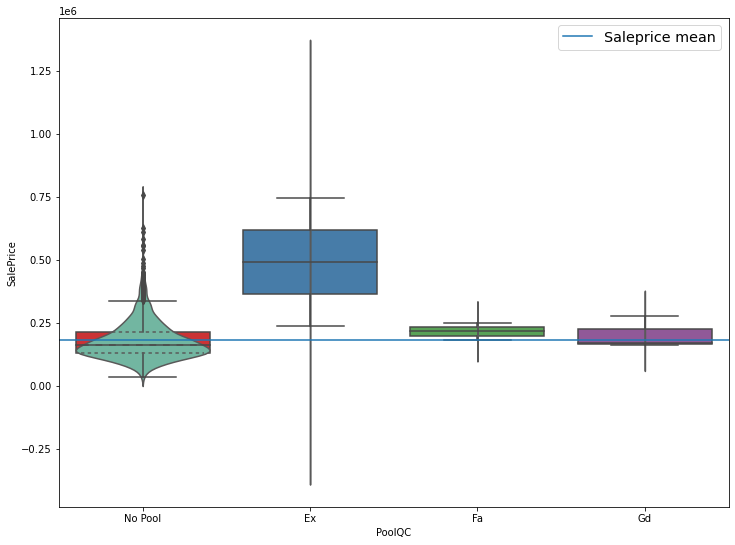

In [160]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='PoolQC', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="PoolQC", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [161]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['PoolQC']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
Ex           0.145093
No Pool      0.094542
Fa           0.016389
Gd           0.012319
Name: SalePrice, dtype: float64

In [162]:
# no features has high correlation
train_fe = train_fe.drop(columns=['PoolQC'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0             GLQ         706          Unf           0        150   
1             ALQ         978          Unf           0        284   
2             GLQ         486          Unf           0        434   
3             ALQ         216          Unf           0        540   
4             GLQ         655          Unf           0        490   
...           ...         ...          ...         ...        ...   
1455          Unf           0          Unf           0        953   
1456          ALQ         790          Rec         163        589   
1457          GLQ         275          Unf           0        877   
1458          GLQ          49          Rec        1029          0   
1459          BLQ         830          LwQ         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4                9           1       2000.0           3    

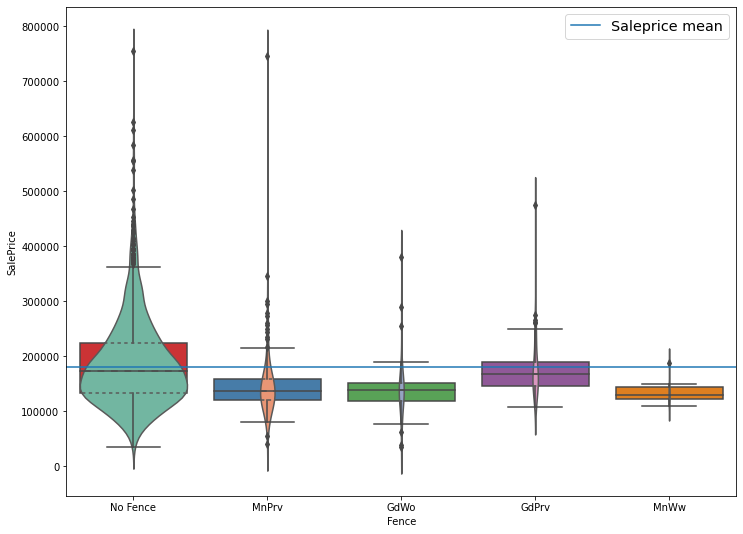

In [163]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='Fence', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="Fence", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [164]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['Fence']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
No Fence     0.170931
MnPrv        0.139774
GdWo         0.099662
MnWw         0.051024
GdPrv        0.004202
Name: SalePrice, dtype: float64

In [165]:
# no features has high correlation
train_fe = train_fe.drop(columns=['Fence'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0             GLQ         706          Unf           0        150   
1             ALQ         978          Unf           0        284   
2             GLQ         486          Unf           0        434   
3             ALQ         216          Unf           0        540   
4             GLQ         655          Unf           0        490   
...           ...         ...          ...         ...        ...   
1455          Unf           0          Unf           0        953   
1456          ALQ         790          Rec         163        589   
1457          GLQ         275          Unf           0        877   
1458          GLQ          49          Rec        1029          0   
1459          BLQ         830          LwQ         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4                9           1       2000.0           3    

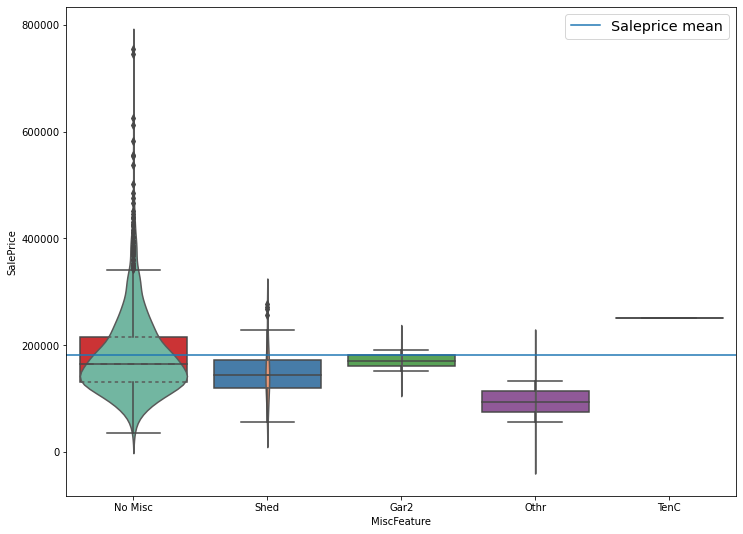

In [166]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='MiscFeature', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="MiscFeature", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [167]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['MiscFeature']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
No Misc      0.071761
Shed         0.069265
Othr         0.040578
TenC         0.023019
Gar2         0.004592
Name: SalePrice, dtype: float64

In [168]:
# no features has high correlation
train_fe = train_fe.drop(columns=['MiscFeature'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0             GLQ         706          Unf           0        150   
1             ALQ         978          Unf           0        284   
2             GLQ         486          Unf           0        434   
3             ALQ         216          Unf           0        540   
4             GLQ         655          Unf           0        490   
...           ...         ...          ...         ...        ...   
1455          Unf           0          Unf           0        953   
1456          ALQ         790          Rec         163        589   
1457          GLQ         275          Unf           0        877   
1458          GLQ          49          Rec        1029          0   
1459          BLQ         830          LwQ         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4                9           1       2000.0           3    

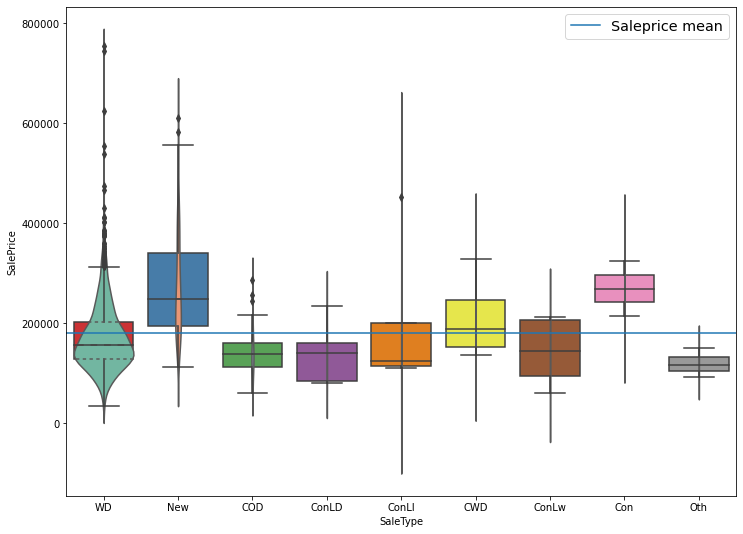

In [169]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='SaleType', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="SaleType", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [170]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['SaleType']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
New          0.355417
WD           0.239664
COD          0.080659
Con          0.041755
ConLD        0.041640
Oth          0.034865
ConLw        0.027343
CWD          0.019943
ConLI        0.014728
Name: SalePrice, dtype: float64

In [171]:
# New has higher than 0.3 correlation
train_fe = pd.concat([train_fe, pd.get_dummies(train_fe['SaleType'])[['New']].rename(columns = {'New':'Sale_Ty_New'})], axis = 1)
train_fe = train_fe.drop(columns=['SaleType'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0             GLQ         706          Unf           0        150   
1             ALQ         978          Unf           0        284   
2             GLQ         486          Unf           0        434   
3             ALQ         216          Unf           0        540   
4             GLQ         655          Unf           0        490   
...           ...         ...          ...         ...        ...   
1455          Unf           0          Unf           0        953   
1456          ALQ         790          Rec         163        589   
1457          GLQ         275          Unf           0        877   
1458          GLQ          49          Rec        1029          0   
1459          BLQ         830          LwQ         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4                9           1       2000.0           3    

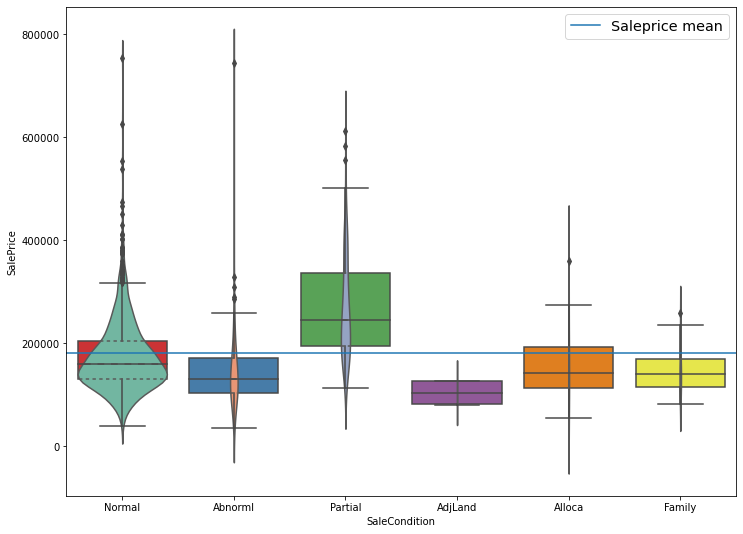

In [172]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='SaleCondition', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="SaleCondition", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [173]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['SaleCondition']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
Partial      0.349896
Normal       0.150719
Abnorml      0.117434
AdjLand      0.050707
Family       0.046169
Alloca       0.017858
Name: SalePrice, dtype: float64

In [174]:
# Partial has higher than 0.3 correlation
train_fe = pd.concat([train_fe, pd.get_dummies(train_fe['SaleCondition'])[['Partial']].rename(columns = {'Partial':'Sale_Cond_Partial'})], axis = 1)
train_fe = train_fe.drop(columns=['SaleCondition'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1455         62.0     7917            6       1999          2000         0.0   
1456         85.0    13175            6       1978          1988       119.0   
1457         66.0     9042            7       1941          2006         0.0   
1458         68.0     9717            5       1950          1996         0.0   
1459         75.0     9937            5       1965          1965         0.0   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0             GLQ         706          Unf           0        150   
1             ALQ         978          Unf           0        284   
2             GLQ         486          Unf           0        434   
3             ALQ         216          Unf           0        540   
4             GLQ         655          Unf           0        490   
...           ...         ...          ...         ...        ...   
1455          Unf           0          Unf           0        953   
1456          ALQ         790          Rec         163        589   
1457          GLQ         275          Unf           0        877   
1458          GLQ          49          Rec        1029          0   
1459          BLQ         830          LwQ         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1455          953       953       694             0       1647             0   
1456         1542      2073         0             0       2073             1   
1457         1152      1188      1152             0       2340             0   
1458         1078      1078         0             0       1078             1   
1459         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4                9           1       2000.0           3    

- Feature Engineering for BsmtFinTypes

In [175]:
train_fe['BsmtFinType1'].value_counts()

Unf            426
GLQ            412
ALQ            220
BLQ            148
Rec            132
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64

In [176]:
train_fe['BsmtFinType2'].value_counts()

Unf            1246
Rec              54
LwQ              46
No Basement      37
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64

In [177]:
train_fe.loc[train_fe['BsmtFinSF1'] > 0]['BsmtFinSF1'].describe()

count     986.000000
mean      649.712982
std       411.779769
min         2.000000
25%       370.000000
50%       602.500000
75%       865.750000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

In [178]:
train_fe.loc[train_fe['BsmtFinSF2'] > 0]['BsmtFinSF2'].describe()

count     166.000000
mean      406.524096
std       285.716106
min        28.000000
25%       177.750000
50%       353.000000
75%       551.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

In [179]:
train_fe.loc[train_fe['BsmtUnfSF'] > 0]['BsmtUnfSF'].describe()

count    1331.000000
mean      616.426747
std       425.811270
min        14.000000
25%       288.000000
50%       536.000000
75%       842.500000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

In [180]:
train_fe.loc[train_fe['TotalBsmtSF'] > 0]['TotalBsmtSF'].describe()

count    1412.000000
mean     1082.552408
std       404.766998
min       105.000000
25%       809.500000
50%      1004.000000
75%      1306.750000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

In [181]:
train_fe['BsmtFin1'] = ""
for i, fintype1, type1area in zip(train_fe.index, train_fe['BsmtFinType1'], train_fe['BsmtFinSF1']) :
    if type1area > 1500:
        train_fe.loc[i,'BsmtFin1'] = fintype1 + "Lr"
    elif (type1area < 500) & (type1area > 0):
        train_fe.loc[i,'BsmtFin1'] = fintype1 + "Sm"
    elif type1area != 0:
        train_fe.loc[i,'BsmtFin1'] = fintype1 + "Md"
    else:
        if train_fe['BsmtUnfSF'][i] != 0:
            if train_fe['BsmtUnfSF'][i] > 1500:
                train_fe.loc[i,'BsmtFin1'] = 'UnfLr'
            elif (train_fe['BsmtUnfSF'][i] < 500) & (train_fe['BsmtUnfSF'][i] > 0):
                train_fe.loc[i,'BsmtFin1'] = 'UnfSm'
            else:
                train_fe.loc[i,'BsmtFin1'] = 'UnfMd'
        else:
            train_fe.loc[i,'BsmtFin1'] = 'No Bsmt'
train_fe['BsmtFin1'].value_counts()

UnfMd      364
GLQMd      295
ALQMd      136
GLQSm       99
ALQSm       81
BLQMd       78
RecSm       73
BLQSm       70
RecMd       59
LwQSm       54
UnfLr       45
No Bsmt     37
LwQMd       20
GLQLr       18
UnfSm       17
ALQLr        3
Name: BsmtFin1, dtype: int64

In [182]:
train_fe['BsmtFin2'] = ""
for i, fintype2, type2area in zip(train_fe.index, train_fe['BsmtFinType2'], train_fe['BsmtFinSF2']) :
    if type2area > 1500:
        train_fe.loc[i,'BsmtFin2'] = fintype2 + "Lr"
    elif (type2area < 500) & (type2area > 0):
        train_fe.loc[i,'BsmtFin2'] = fintype2 + "Sm"
    elif type2area != 0:
        train_fe.loc[i,'BsmtFin2'] = fintype2 + "Md"
    else:
        if train_fe['BsmtUnfSF'][i] != 0:
            if train_fe['BsmtUnfSF'][i] > 1500:
                train_fe.loc[i,'BsmtFin2'] = 'UnfLr'
            elif (train_fe['BsmtUnfSF'][i] < 500) & (train_fe['BsmtUnfSF'][i] > 0):
                train_fe.loc[i,'BsmtFin2'] = 'UnfSm'
            else:
                train_fe.loc[i,'BsmtFin2'] = 'UnfMd'
        else:
            train_fe.loc[i,'BsmtFin2'] = 'No Bsmt'
train_fe['BsmtFin2'].value_counts()

UnfMd      616
UnfSm      527
No Bsmt     80
UnfLr       60
RecSm       40
LwQSm       39
BLQSm       27
ALQMd       15
RecMd       14
GLQMd       10
LwQMd        7
BLQMd        6
GLQSm        4
ALQSm        4
Name: BsmtFin2, dtype: int64

In [183]:
train_fe = train_fe.reset_index(drop=True)
for i in range(len(train_fe['BsmtFin1'])):
    train_fe.loc[i,train_fe['BsmtFin1'][i]] = 1
for i in range(len(train_fe['BsmtFin2'])):
    train_fe.loc[i,train_fe['BsmtFin2'][i]] = 1

In [184]:
train_fe = train_fe.fillna(0)
train_fe = train_fe.drop(columns = ['BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF'])
train_fe

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0            65.0     8450            7       2003          2003       196.0   
1            80.0     9600            6       1976          1976         0.0   
2            68.0    11250            7       2001          2002       162.0   
3            60.0     9550            7       1915          1970         0.0   
4            84.0    14260            8       2000          2000       350.0   
...           ...      ...          ...        ...           ...         ...   
1444         62.0     7917            6       1999          2000         0.0   
1445         85.0    13175            6       1978          1988       119.0   
1446         66.0     9042            7       1941          2006         0.0   
1447         68.0     9717            5       1950          1996         0.0   
1448         75.0     9937            5       1965          1965         0.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0             856       856       854             0       1710             1   
1            1262      1262         0             0       1262             0   
2             920       920       866             0       1786             1   
3             756       961       756             0       1717             1   
4            1145      1145      1053             0       2198             1   
...           ...       ...       ...           ...        ...           ...   
1444          953       953       694             0       1647             0   
1445         1542      2073         0             0       2073             1   
1446         1152      1188      1152             0       2340             0   
1447         1078      1078         0             0       1078             1   
1448         1256      1256         0             0       1256             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1444             0         2         1             3             1   
1445             0         2         0             3             1   
1446             0         2         0             4             1   
1447             0         1         0             2             1   
1448             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
0                8           0       2003.0           2         548   
1                6           1       1976.0           2         460   
2                6           1       2001.0           2         608   
3                7           1       1998.0           3         642   
4                9           1       2000.0           3         836   
...            ...         ...          ...         ...         ...   
1444             7           1       1999.0           2         460   
1445             7           2       1978.0           2         500   
1446             9           2       1941.0           1         252   
1447             5           0       1950.0           1         240   
1448             6           0       1965.0           1         276   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0              0           61              0          0            0   
1            298            0              0          0            0   
2              0           42              0          0            0   
3              0           35            272          0            0   
4            192           84 

In [185]:
train_fe.describe()

LotFrontage        LotArea  OverallQual    YearBuilt  YearRemodAdd  \
count  1449.000000    1449.000000  1449.000000  1449.000000   1449.000000   
mean     57.600414   10505.292616     6.091787  1971.048999   1984.734990   
std      34.671721    9999.462295     1.381306    30.188514     20.654422   
min       0.000000    1300.000000     1.000000  1872.000000   1950.000000   
25%      42.000000    7535.000000     5.000000  1954.000000   1966.000000   
50%      63.000000    9464.000000     6.000000  1972.000000   1993.000000   
75%      79.000000   11600.000000     7.000000  2000.000000   2004.000000   
max     313.000000  215245.000000    10.000000  2010.000000   2010.000000   

        MasVnrArea  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1449.000000  1449.000000  1449.000000  1449.000000   1449.000000   
mean    103.596273  1054.909593  1161.384403   346.641132      5.888889   
std     181.159595   434.546553   385.026776   436.467071     48.804741   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%       0.000000   795.000000   882.000000     0.000000      0.000000   
50%       0.000000   991.000000  1086.000000     0.000000      0.000000   
75%     166.000000  1297.000000  1391.000000   728.000000      0.000000   
max    1600.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1449.000000   1449.000000   1449.000000  1449.000000  1449.000000   
mean   1513.914424      0.423741      0.057971     1.561767     0.380952   
std     526.108808      0.518859      0.239605     0.550440     0.502559   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1128.000000      0.000000      0.000000     1.000000     0.000000   
50%    1459.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.000000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1449.000000   1449.000000   1449.000000  1449.000000  1449.000000   
mean       2.866805      1.046239      6.516218     0.612146  1867.728778   
std        0.815633      0.219715      1.627600     0.643726   455.267635   
min        0.000000      0.000000      2.000000     0.000000     0.000000   
25%        2.000000      1.000000      5.000000     0.000000  1958.000000   
50%        3.000000      1.000000      6.000000     1.000000  1977.000000   
75%        3.000000      1.000000      7.000000     1.000000  2001.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1449.000000  1449.000000  1449.000000  1449.000000    1449.000000   
mean      1.763975   472.242926    94.443754    46.420290      21.982747   
std       0.748516   214.051742   125.492157    66.081656      61.144960   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   327.000000     0.000000     0.000000       0.000000   
50%       2.000000   478.000000     0.000000    24.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000       0.000000   
max       4.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch     PoolArea       MiscVal       MoSold  \
count  1449.000000  1449.000000  1449.000000   1449.000000  1449.000000   
mean      3.435473    15.175293     2.779848     43.819186     6.319531   
std      29.426965    55.953287    40.328903    497.989369     2.698099   
min       0.000000     0.000000     0.000000      0.000000     1.000000   
25%       0.000000     0.000000     0.000000      0.000000     5.000000   
50%       0.000000     0.000000     0.000000      0.000000     6.000000   
75%       0.000000     0.000000     0.000000    

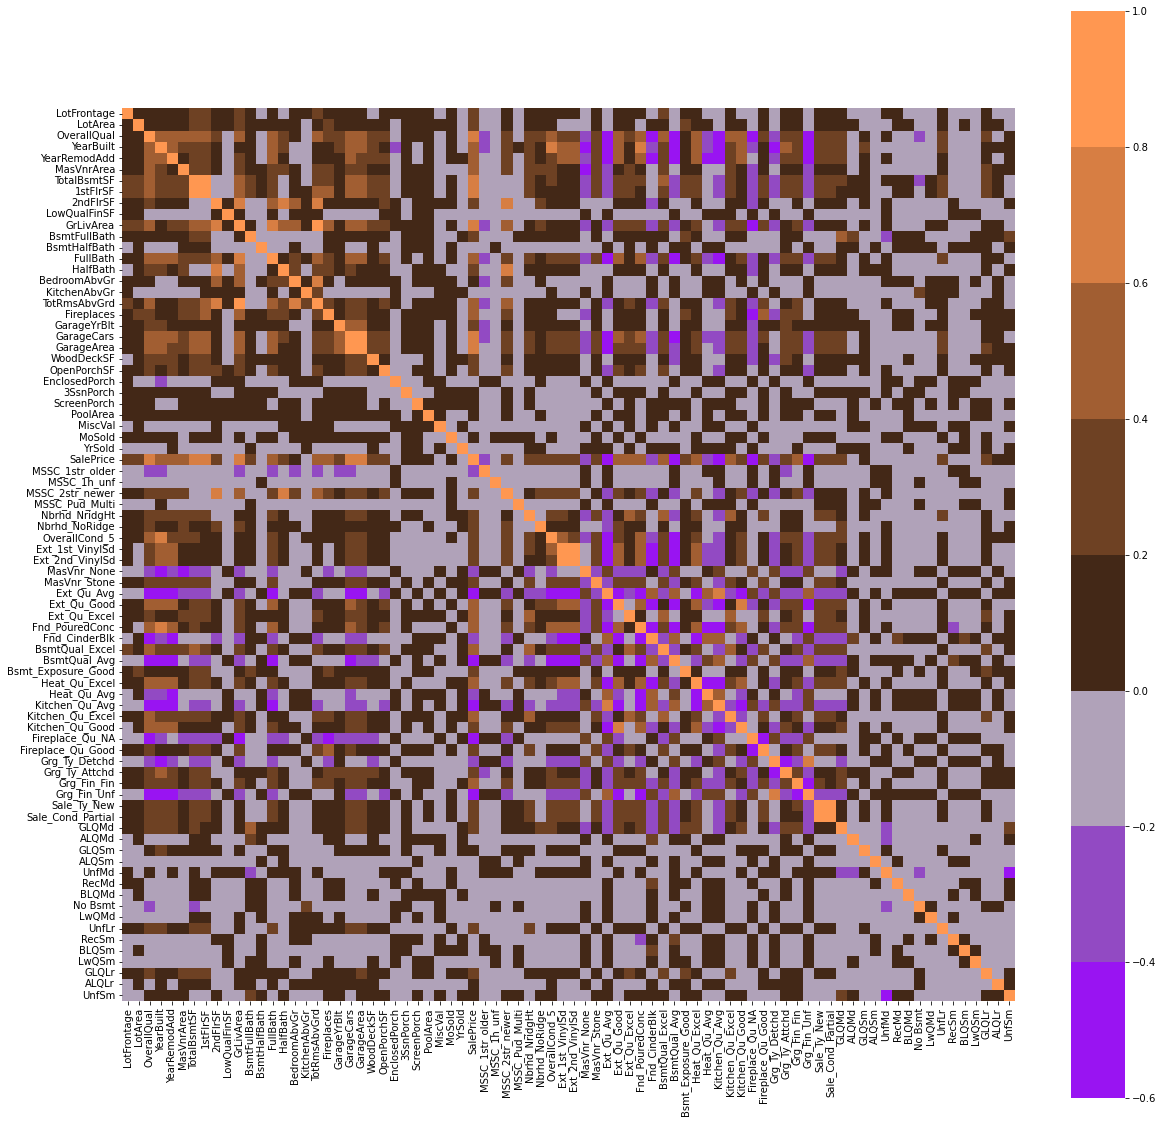

In [186]:
train_fe_corr = train_fe.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(train_fe_corr, cmap=cmap, vmin= -.6, square=True);

- Compare correlation for each feature and if there is any other feature correlated more than 0.8 (or 0.7?), then need to pick one

In [187]:
train_fe_corr['SalePrice']

LotFrontage     0.207892
LotArea         0.264787
OverallQual     0.789881
YearBuilt       0.522918
YearRemodAdd    0.507138
                  ...   
BLQSm          -0.131959
LwQSm          -0.071821
GLQLr           0.286032
ALQLr           0.016537
UnfSm           0.060428
Name: SalePrice, Length: 80, dtype: float64

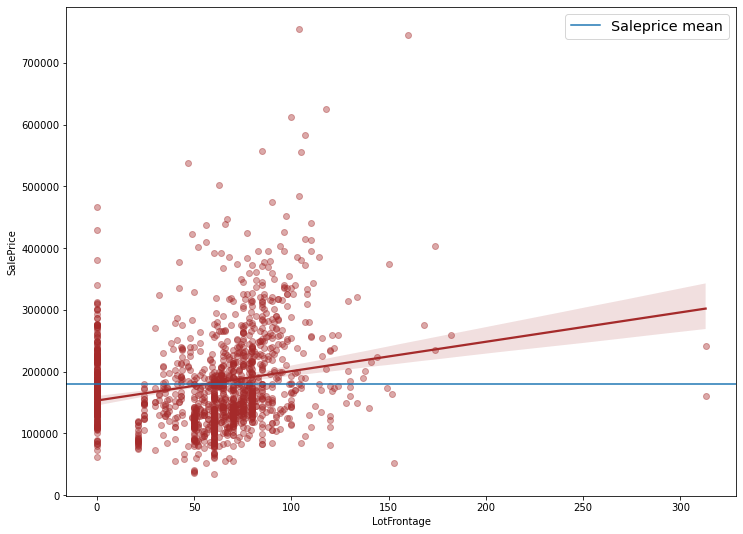

In [188]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.regplot(data=train_fe, x="LotFrontage", y="SalePrice", color = "brown", scatter_kws={'alpha':0.4})
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [189]:
train_fe.loc[train_fe['LotFrontage'] == 0, 'CatLotFrontage'] = 'No LF'
train_fe.loc[(train_fe['LotFrontage'] > 0) & (train_fe['LotFrontage'] <= 50), 'CatLotFrontage'] = 'Sm LF'
train_fe.loc[(train_fe['LotFrontage'] > 50) & (train_fe['LotFrontage'] <= 100), 'CatLotFrontage'] = 'Md LF'
train_fe.loc[(train_fe['LotFrontage'] > 100), 'CatLotFrontage'] = 'Lr LF'

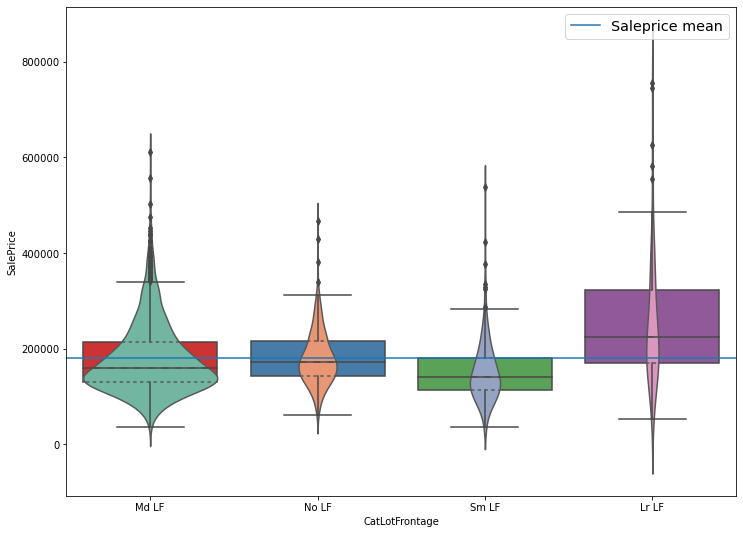

In [190]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='CatLotFrontage', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="CatLotFrontage", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [191]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['CatLotFrontage']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
Lr LF        0.237500
Sm LF        0.144608
Md LF        0.014109
No LF        0.005070
Name: SalePrice, dtype: float64

In [192]:
# no features has high correlation
train_fe = train_fe.drop(columns=['LotFrontage','CatLotFrontage'])
train_fe

LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  TotalBsmtSF  \
0        8450            7       2003          2003       196.0          856   
1        9600            6       1976          1976         0.0         1262   
2       11250            7       2001          2002       162.0          920   
3        9550            7       1915          1970         0.0          756   
4       14260            8       2000          2000       350.0         1145   
...       ...          ...        ...           ...         ...          ...   
1444     7917            6       1999          2000         0.0          953   
1445    13175            6       1978          1988       119.0         1542   
1446     9042            7       1941          2006         0.0         1152   
1447     9717            5       1950          1996         0.0         1078   
1448     9937            5       1965          1965         0.0         1256   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0          856       854             0       1710             1             0   
1         1262         0             0       1262             0             1   
2          920       866             0       1786             1             0   
3          961       756             0       1717             1             0   
4         1145      1053             0       2198             1             0   
...        ...       ...           ...        ...           ...           ...   
1444       953       694             0       1647             0             0   
1445      2073         0             0       2073             1             0   
1446      1188      1152             0       2340             0             0   
1447      1078         0             0       1078             1             0   
1448      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0            2         1             3             1             8   
1            2         0             3             1             6   
2            2         1             3             1             6   
3            1         0             3             1             7   
4            2         1             4             1             9   
...        ...       ...           ...           ...           ...   
1444         2         1             3             1             7   
1445         2         0             3             1             7   
1446         2         0             4             1             9   
1447         1         0             2             1             5   
1448         1         1             3             1             6   

      Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
0              0       2003.0           2         548           0   
1              1       1976.0           2         460         298   
2              1       2001.0           2         608           0   
3              1       1998.0           3         642           0   
4              1       2000.0           3         836         192   
...          ...          ...         ...         ...         ...   
1444           1       1999.0           2         460           0   
1445           2       1978.0           2         500         349   
1446           2       1941.0           1         252           0   
1447           0       1950.0           1         240         366   
1448           0       1965.0           1         276         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4      

In [193]:
train_fe['logLotArea'] = np.log(train_fe['LotArea'])

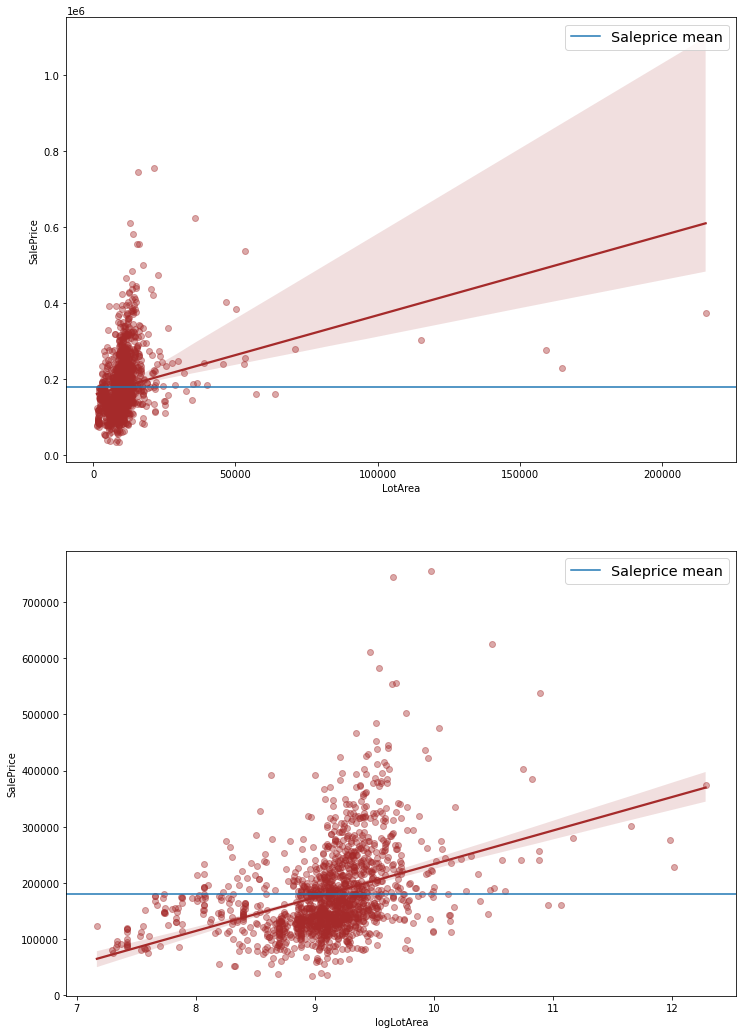

In [194]:
fig, ax =plt.subplots(2,1, figsize=(12,18))
sns.regplot(data=train_fe, x="LotArea", y="SalePrice", color = "brown", scatter_kws={'alpha':0.4}, ax=ax[0])
sns.regplot(data=train_fe, x="logLotArea", y="SalePrice", color = "brown", scatter_kws={'alpha':0.4}, ax=ax[1])
ax[0].axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
ax[0].legend(fontsize = 'x-large')
ax[1].axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
ax[1].legend(fontsize = 'x-large');

In [195]:
# Use logLotArea for less skewed and drop LotArea
train_fe = train_fe.drop(columns=['LotArea'])
train_fe

OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  TotalBsmtSF  1stFlrSF  \
0               7       2003          2003       196.0          856       856   
1               6       1976          1976         0.0         1262      1262   
2               7       2001          2002       162.0          920       920   
3               7       1915          1970         0.0          756       961   
4               8       2000          2000       350.0         1145      1145   
...           ...        ...           ...         ...          ...       ...   
1444            6       1999          2000         0.0          953       953   
1445            6       1978          1988       119.0         1542      2073   
1446            7       1941          2006         0.0         1152      1188   
1447            5       1950          1996         0.0         1078      1078   
1448            5       1965          1965         0.0         1256      1256   

      2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0          854             0       1710             1             0         2   
1            0             0       1262             0             1         2   
2          866             0       1786             1             0         2   
3          756             0       1717             1             0         1   
4         1053             0       2198             1             0         2   
...        ...           ...        ...           ...           ...       ...   
1444       694             0       1647             0             0         2   
1445         0             0       2073             1             0         2   
1446      1152             0       2340             0             0         2   
1447         0             0       1078             1             0         1   
1448         0             0       1256             1             0         1   

      HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0            1             3             1             8           0   
1            0             3             1             6           1   
2            1             3             1             6           1   
3            0             3             1             7           1   
4            1             4             1             9           1   
...        ...           ...           ...           ...         ...   
1444         1             3             1             7           1   
1445         0             3             1             7           2   
1446         0             4             1             9           2   
1447         0             2             1             5           0   
1448         1             3             1             6           0   

      GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0          2003.0           2         548           0           61   
1          1976.0           2         460         298            0   
2          2001.0           2         608           0           42   
3          1998.0           3         642           0           35   
4          2000.0           3         836         192           84   
...           ...         ...         ...         ...          ...   
1444       1999.0           2         460           0           40   
1445       1978.0           2         500         349            0   
1446       1941.0           1         252           0           60   
1447       1950.0           1         240         366            0   
1448       1965.0           1         276         736           68   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0                 0          0            0         0        0       2   
1                 0          0            0         0        0       5   
2                 0          0            0         0        0       9   
3               272          0            0         0     

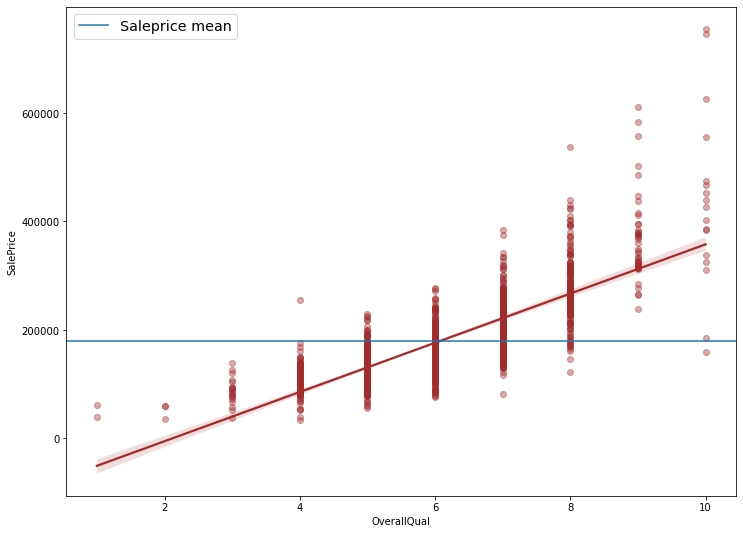

In [196]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.regplot(data=train_fe, x="OverallQual", y="SalePrice", color = "brown", scatter_kws={'alpha':0.4})
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [197]:
train_fe.corr()['SalePrice']['OverallQual']

0.7898812526982149

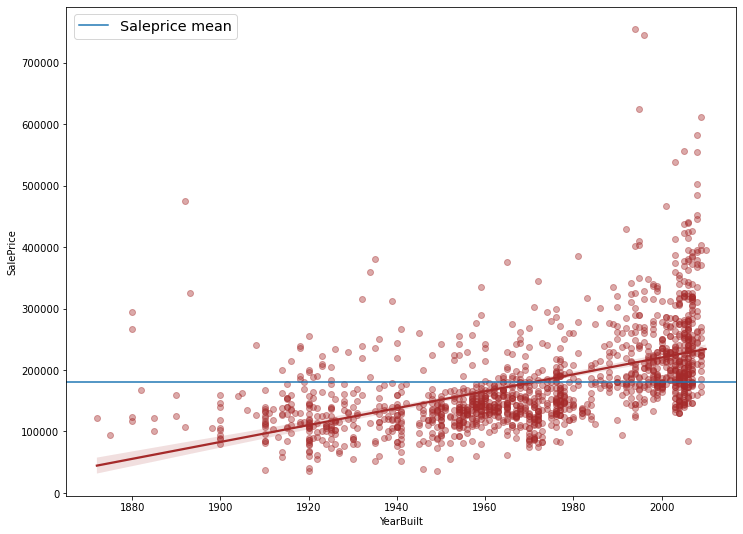

In [198]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.regplot(data=train_fe, x="YearBuilt", y="SalePrice", color = "brown", scatter_kws={'alpha':0.4})
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [199]:
train_fe.corr()['SalePrice']['YearBuilt']

0.5229181927023236

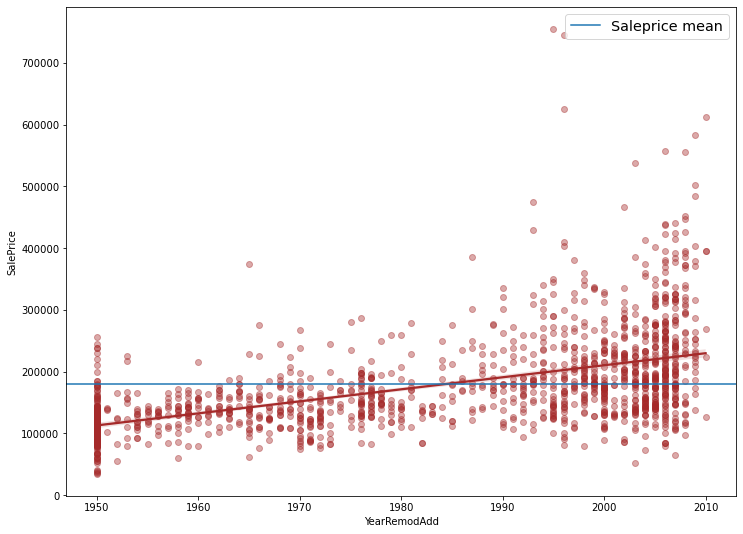

In [200]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.regplot(data=train_fe, x="YearRemodAdd", y="SalePrice", color = "brown", scatter_kws={'alpha':0.4})
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [201]:
train_fe.corr()['SalePrice']['YearRemodAdd']

0.5071384621820506

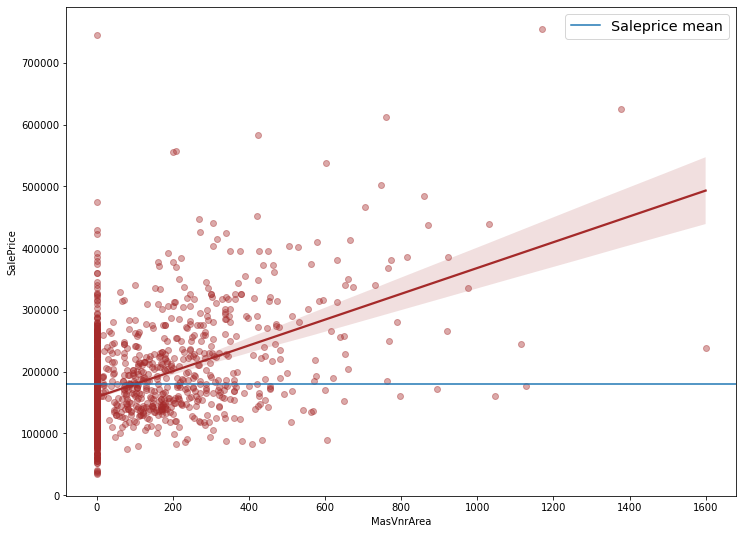

In [202]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.regplot(data=train_fe, x="MasVnrArea", y="SalePrice", color = "brown", scatter_kws={'alpha':0.4})
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [203]:
train_fe.loc[train_fe['MasVnrArea'] == 0, 'CatMasVnrArea'] = 'No MasVnr'
train_fe.loc[(train_fe['MasVnrArea'] > 0) & (train_fe['MasVnrArea'] <= 200), 'CatMasVnrArea'] = 'Sm MasVnr'
train_fe.loc[(train_fe['MasVnrArea'] > 200) & (train_fe['MasVnrArea'] <= 400), 'CatMasVnrArea'] = 'Md MasVnr'
train_fe.loc[(train_fe['MasVnrArea'] > 400), 'CatMasVnrArea'] = 'Lr MasVnr'

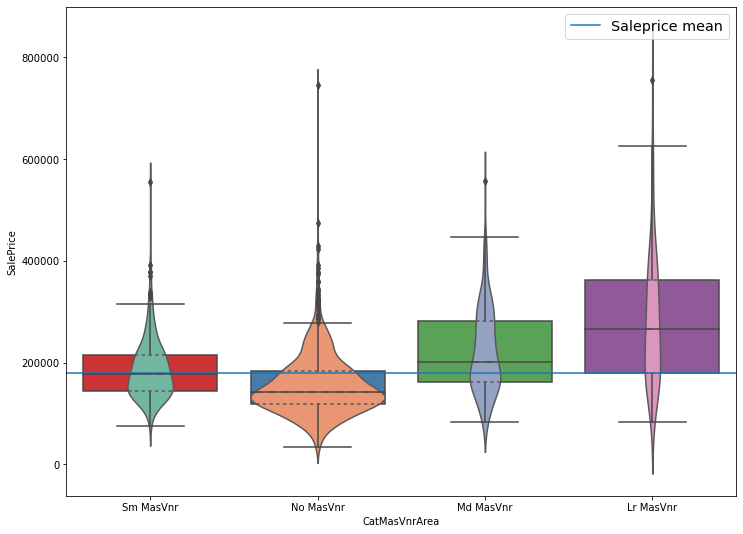

In [204]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='CatMasVnrArea', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="CatMasVnrArea", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [205]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['CatMasVnrArea']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
No MasVnr    0.365729
Lr MasVnr    0.349234
Md MasVnr    0.212749
Sm MasVnr    0.045365
Name: SalePrice, dtype: float64

In [206]:
# No MasVnr, Lr MasVnr have higher than 0.3 correlation
train_fe = pd.concat([train_fe, pd.get_dummies(train_fe['CatMasVnrArea'])[['No MasVnr', 'Lr MasVnr']].rename(columns = {'No MasVnr':'No_MasVnr','Lr MasVnr':'Lr_MasVnr'})], axis = 1)
train_fe = train_fe.drop(columns=['MasVnrArea', 'CatMasVnrArea'])
train_fe

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0               7       2003          2003          856       856       854   
1               6       1976          1976         1262      1262         0   
2               7       2001          2002          920       920       866   
3               7       1915          1970          756       961       756   
4               8       2000          2000         1145      1145      1053   
...           ...        ...           ...          ...       ...       ...   
1444            6       1999          2000          953       953       694   
1445            6       1978          1988         1542      2073         0   
1446            7       1941          2006         1152      1188      1152   
1447            5       1950          1996         1078      1078         0   
1448            5       1965          1965         1256      1256         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0                0       1710             1             0         2         1   
1                0       1262             0             1         2         0   
2                0       1786             1             0         2         1   
3                0       1717             1             0         1         0   
4                0       2198             1             0         2         1   
...            ...        ...           ...           ...       ...       ...   
1444             0       1647             0             0         2         1   
1445             0       2073             1             0         2         0   
1446             0       2340             0             0         2         0   
1447             0       1078             1             0         1         0   
1448             0       1256             1             0         1         1   

      BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0                3             1             8           0       2003.0   
1                3             1             6           1       1976.0   
2                3             1             6           1       2001.0   
3                3             1             7           1       1998.0   
4                4             1             9           1       2000.0   
...            ...           ...           ...         ...          ...   
1444             3             1             7           1       1999.0   
1445             3             1             7           2       1978.0   
1446             4             1             9           2       1941.0   
1447             2             1             5           0       1950.0   
1448             3             1             6           0       1965.0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0              2         548           0           61              0   
1              2         460         298            0              0   
2              2         608           0           42              0   
3              3         642           0           35            272   
4              3         836         192           84              0   
...          ...         ...         ...          ...            ...   
1444           2         460           0           40              0   
1445           2         500         349            0              0   
1446           1         252           0           60              0   
1447           1         240         366            0            112   
1448           1         276         736           68              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  \
0             0            0         0        0       2    2008     208500   
1             0            0         0        0       5    2007     181500   
2             0            0         0        0       9    2008     223500   
3     

In [207]:
train_fe

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0               7       2003          2003          856       856       854   
1               6       1976          1976         1262      1262         0   
2               7       2001          2002          920       920       866   
3               7       1915          1970          756       961       756   
4               8       2000          2000         1145      1145      1053   
...           ...        ...           ...          ...       ...       ...   
1444            6       1999          2000          953       953       694   
1445            6       1978          1988         1542      2073         0   
1446            7       1941          2006         1152      1188      1152   
1447            5       1950          1996         1078      1078         0   
1448            5       1965          1965         1256      1256         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0                0       1710             1             0         2         1   
1                0       1262             0             1         2         0   
2                0       1786             1             0         2         1   
3                0       1717             1             0         1         0   
4                0       2198             1             0         2         1   
...            ...        ...           ...           ...       ...       ...   
1444             0       1647             0             0         2         1   
1445             0       2073             1             0         2         0   
1446             0       2340             0             0         2         0   
1447             0       1078             1             0         1         0   
1448             0       1256             1             0         1         1   

      BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0                3             1             8           0       2003.0   
1                3             1             6           1       1976.0   
2                3             1             6           1       2001.0   
3                3             1             7           1       1998.0   
4                4             1             9           1       2000.0   
...            ...           ...           ...         ...          ...   
1444             3             1             7           1       1999.0   
1445             3             1             7           2       1978.0   
1446             4             1             9           2       1941.0   
1447             2             1             5           0       1950.0   
1448             3             1             6           0       1965.0   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0              2         548           0           61              0   
1              2         460         298            0              0   
2              2         608           0           42              0   
3              3         642           0           35            272   
4              3         836         192           84              0   
...          ...         ...         ...          ...            ...   
1444           2         460           0           40              0   
1445           2         500         349            0              0   
1446           1         252           0           60              0   
1447           1         240         366            0            112   
1448           1         276         736           68              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  \
0             0            0         0        0       2    2008     208500   
1             0            0         0        0       5    2007     181500   
2             0            0         0        0       9    2008     223500   
3     

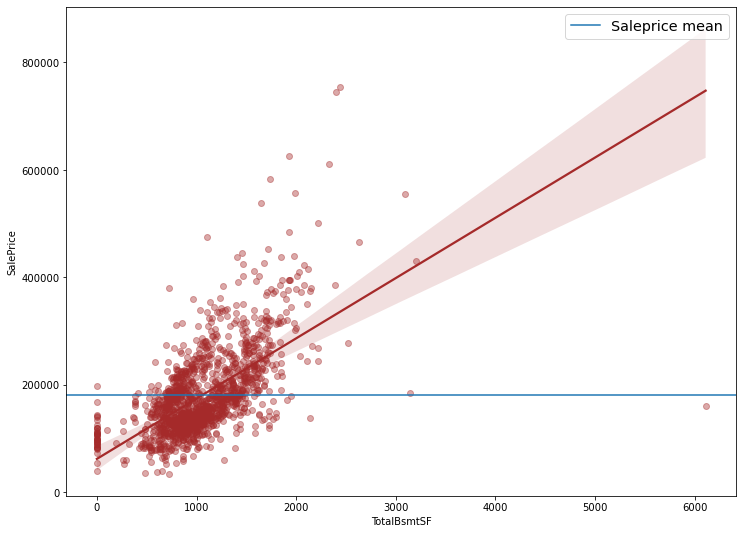

In [208]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.regplot(data=train_fe, x="TotalBsmtSF", y="SalePrice", color = "brown", scatter_kws={'alpha':0.4})
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [209]:
train_fe.corr()['SalePrice']['TotalBsmtSF']

0.6144200720936613

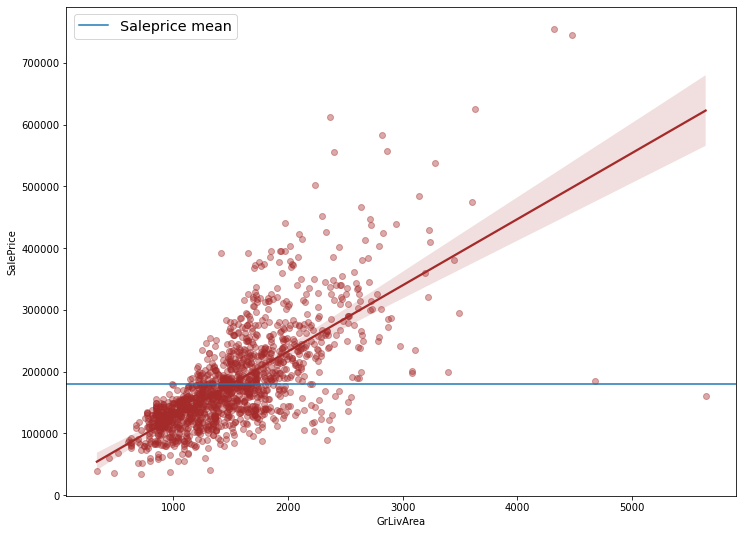

In [210]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.regplot(data=train_fe, x="GrLivArea", y="SalePrice", color = "brown", scatter_kws={'alpha':0.4})
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [211]:
train_fe.corr()['SalePrice']['GrLivArea']

0.7103194326482881

In [212]:
# These 3 column info are included in GrLivArea
train_fe = train_fe.drop(columns = ['1stFlrSF', '2ndFlrSF', 'LowQualFinSF'])
train_fe

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  GrLivArea  \
0               7       2003          2003          856       1710   
1               6       1976          1976         1262       1262   
2               7       2001          2002          920       1786   
3               7       1915          1970          756       1717   
4               8       2000          2000         1145       2198   
...           ...        ...           ...          ...        ...   
1444            6       1999          2000          953       1647   
1445            6       1978          1988         1542       2073   
1446            7       1941          2006         1152       2340   
1447            5       1950          1996         1078       1078   
1448            5       1965          1965         1256       1256   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0                1             0         2         1             3   
1                0             1         2         0             3   
2                1             0         2         1             3   
3                1             0         1         0             3   
4                1             0         2         1             4   
...            ...           ...       ...       ...           ...   
1444             0             0         2         1             3   
1445             1             0         2         0             3   
1446             0             0         2         0             4   
1447             1             0         1         0             2   
1448             1             0         1         1             3   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0                1             8           0       2003.0           2   
1                1             6           1       1976.0           2   
2                1             6           1       2001.0           2   
3                1             7           1       1998.0           3   
4                1             9           1       2000.0           3   
...            ...           ...         ...          ...         ...   
1444             1             7           1       1999.0           2   
1445             1             7           2       1978.0           2   
1446             1             9           2       1941.0           1   
1447             1             5           0       1950.0           1   
1448             1             6           0       1965.0           1   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0            548           0           61              0          0   
1            460         298            0              0          0   
2            608           0           42              0          0   
3            642           0           35            272          0   
4            836         192           84              0          0   
...          ...         ...          ...            ...        ...   
1444         460           0           40              0          0   
1445         500         349            0              0          0   
1446         252           0           60              0          0   
1447         240         366            0            112          0   
1448         276         736           68              0          0   

      ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  \
0               0         0        0       2    2008     208500   
1               0         0        0       5    2007     181500   
2               0         0        0       9    2008     223500   
3               0         0        0       2    2006     140000   
4               0         0        0      12    2008     250000   
...           ...       ...      ...     ...     ...        ...   
1444            0         0        0       8    2007     175000   
1445            0         0        0       2    2010     2

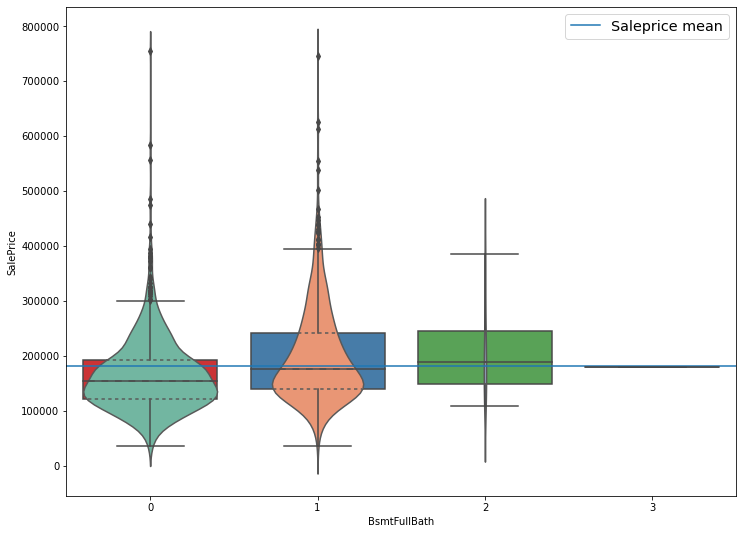

In [213]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='BsmtFullBath', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="BsmtFullBath", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [214]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['BsmtFullBath']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
0            0.227855
1            0.220198
2            0.041944
3            0.000512
Name: SalePrice, dtype: float64

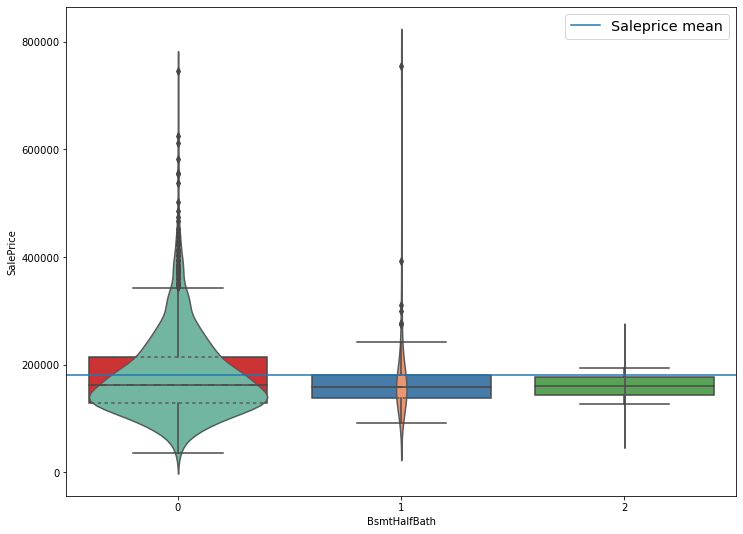

In [215]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='BsmtHalfBath', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="BsmtHalfBath", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [216]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['BsmtHalfBath']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
0            0.014883
1            0.013556
2            0.009234
Name: SalePrice, dtype: float64

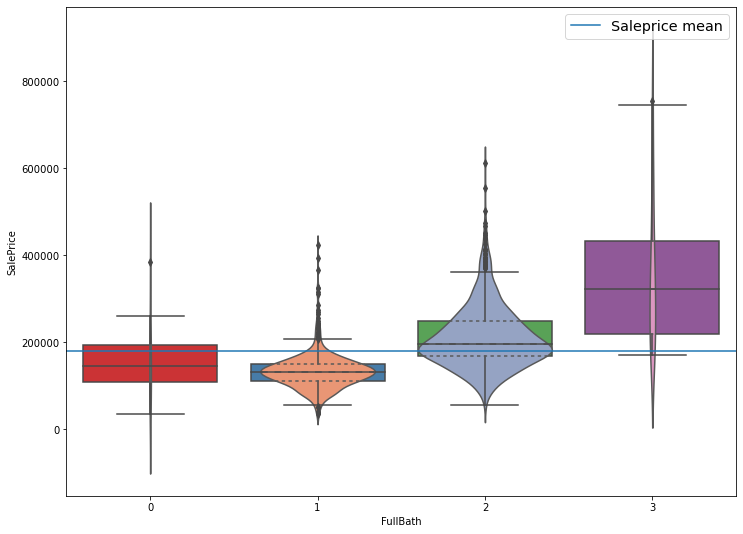

In [217]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='FullBath', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="FullBath", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [218]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['FullBath']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
1            0.521312
2            0.425618
3            0.325747
0            0.015298
Name: SalePrice, dtype: float64

In [219]:
# 1, 2, 3 have higher than 0.3 correlation
train_fe = pd.concat([train_fe, pd.get_dummies(train_fe['FullBath'])[[1, 2, 3]].rename(columns = {1:'FBath_1',2:'FBath_2',3:'FBath_3'})], axis = 1)

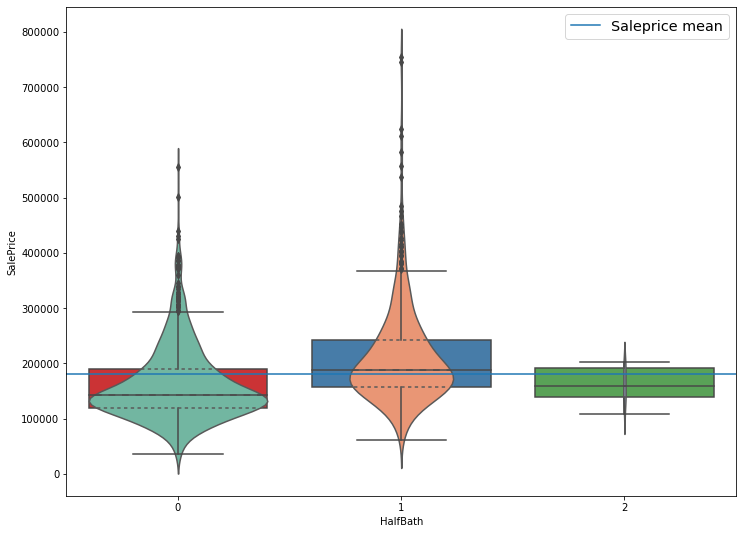

In [220]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='HalfBath', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="HalfBath", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [221]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['HalfBath']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
1            0.303729
0            0.298311
2            0.021339
Name: SalePrice, dtype: float64

In [222]:
# 1 has higher than 0.3 correlation
train_fe = pd.concat([train_fe, pd.get_dummies(train_fe['HalfBath'])[[1]].rename(columns = {1:'HBath_1'})], axis = 1)

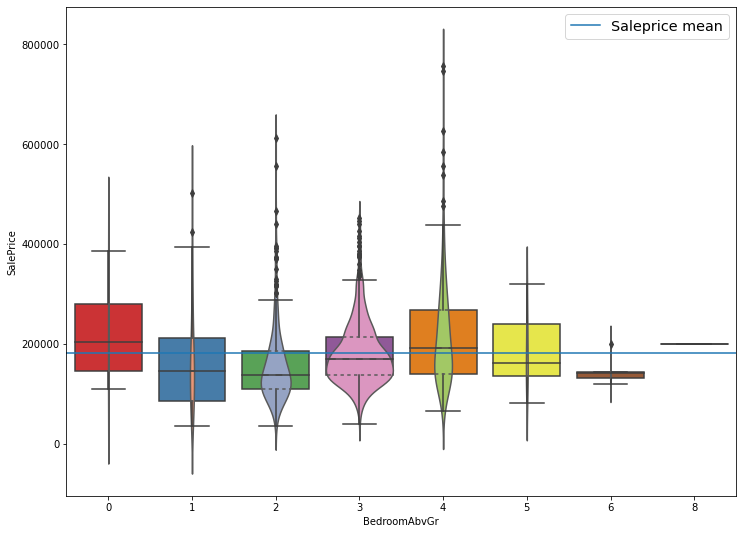

In [223]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='BedroomAbvGr', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="BedroomAbvGr", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [224]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['BedroomAbvGr']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
4            0.208205
2            0.167585
0            0.033300
6            0.032305
1            0.018705
8            0.006448
3            0.003958
5            0.000420
Name: SalePrice, dtype: float64

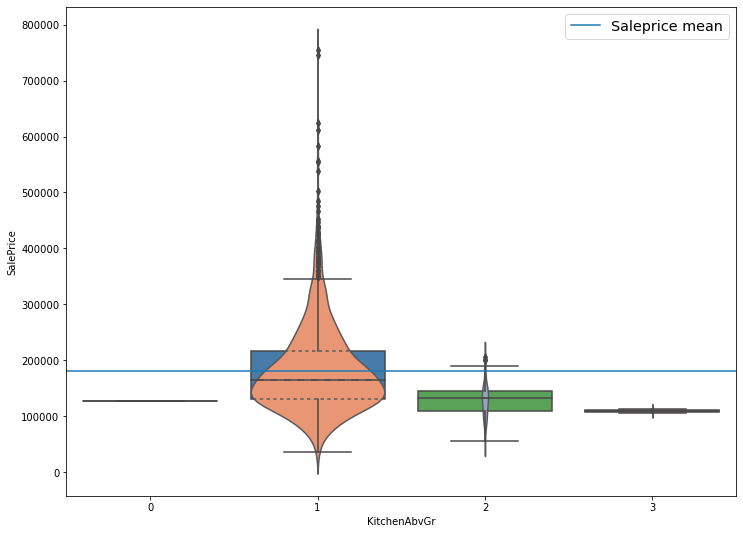

In [225]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='KitchenAbvGr', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="KitchenAbvGr", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [226]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['KitchenAbvGr']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
1            0.142132
2            0.137001
3            0.033310
0            0.017580
Name: SalePrice, dtype: float64

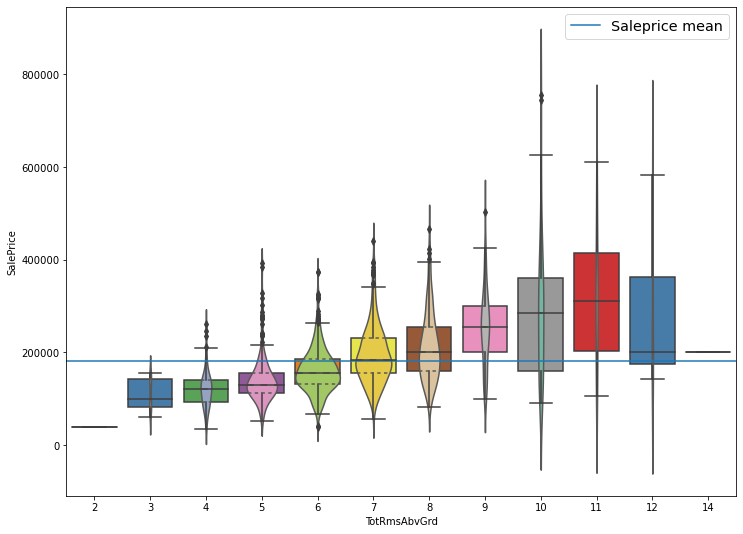

In [227]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='TotRmsAbvGrd', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="TotRmsAbvGrd", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [228]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['TotRmsAbvGrd']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
10           0.267243
5            0.238440
9            0.214020
4            0.196531
11           0.194454
8            0.159066
6            0.150507
12           0.110773
7            0.101121
3            0.095263
2            0.046812
14           0.006448
Name: SalePrice, dtype: float64

In [229]:
train_fe = train_fe.drop(columns = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd'])
train_fe

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  GrLivArea  \
0               7       2003          2003          856       1710   
1               6       1976          1976         1262       1262   
2               7       2001          2002          920       1786   
3               7       1915          1970          756       1717   
4               8       2000          2000         1145       2198   
...           ...        ...           ...          ...        ...   
1444            6       1999          2000          953       1647   
1445            6       1978          1988         1542       2073   
1446            7       1941          2006         1152       2340   
1447            5       1950          1996         1078       1078   
1448            5       1965          1965         1256       1256   

      Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
0              0       2003.0           2         548           0   
1              1       1976.0           2         460         298   
2              1       2001.0           2         608           0   
3              1       1998.0           3         642           0   
4              1       2000.0           3         836         192   
...          ...          ...         ...         ...         ...   
1444           1       1999.0           2         460           0   
1445           2       1978.0           2         500         349   
1446           2       1941.0           1         252           0   
1447           0       1950.0           1         240         366   
1448           0       1965.0           1         276         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1444           40              0          0            0         0        0   
1445            0              0          0            0         0        0   
1446           60              0          0            0         0     2500   
1447            0            112          0            0         0        0   
1448           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  MSSC_1str_older  MSSC_1h_unf  \
0          2    2008     208500                0            0   
1          5    2007     181500                0            0   
2          9    2008     223500                0            0   
3          2    2006     140000                0            0   
4         12    2008     250000                0            0   
...      ...     ...        ...              ...          ...   
1444       8    2007     175000                0            0   
1445       2    2010     210000                0            0   
1446       5    2010     266500                0            0   
1447       4    2010     142125                0            0   
1448       6    2008     147500                0            0   

      MSSC_2str_newer  MSSC_Pud_Multi  Nbrhd_NridgHt  Nbrhd_NoRidge  \
0                   1               0              0              0   
1                   0               0              0              0   
2                   1               0              0              0   
3                   0               0              0              0   
4                   1               0              0              1   
...               ...             ...            ...            ...   
1444                1               0              0              0   
1445                0               0 

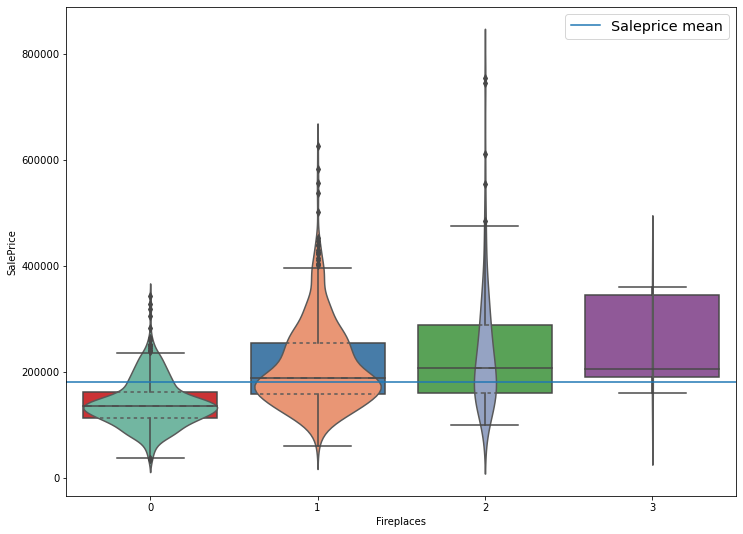

In [230]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='Fireplaces', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="Fireplaces", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [231]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['Fireplaces']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
0            0.472344
1            0.348250
2            0.222308
3            0.053028
Name: SalePrice, dtype: float64

In [232]:
# 0, 1 have higher than 0.3 correlation
train_fe = pd.concat([train_fe, pd.get_dummies(train_fe['Fireplaces'])[[0, 1]].rename(columns = {0:'Fireplace_0', 1:'Fireplace_1'})], axis = 1)
train_fe = train_fe.drop(columns = ['Fireplaces'])
train_fe

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  GrLivArea  \
0               7       2003          2003          856       1710   
1               6       1976          1976         1262       1262   
2               7       2001          2002          920       1786   
3               7       1915          1970          756       1717   
4               8       2000          2000         1145       2198   
...           ...        ...           ...          ...        ...   
1444            6       1999          2000          953       1647   
1445            6       1978          1988         1542       2073   
1446            7       1941          2006         1152       2340   
1447            5       1950          1996         1078       1078   
1448            5       1965          1965         1256       1256   

      GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0          2003.0           2         548           0           61   
1          1976.0           2         460         298            0   
2          2001.0           2         608           0           42   
3          1998.0           3         642           0           35   
4          2000.0           3         836         192           84   
...           ...         ...         ...         ...          ...   
1444       1999.0           2         460           0           40   
1445       1978.0           2         500         349            0   
1446       1941.0           1         252           0           60   
1447       1950.0           1         240         366            0   
1448       1965.0           1         276         736           68   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  \
0                 0          0            0         0        0       2   
1                 0          0            0         0        0       5   
2                 0          0            0         0        0       9   
3               272          0            0         0        0       2   
4                 0          0            0         0        0      12   
...             ...        ...          ...       ...      ...     ...   
1444              0          0            0         0        0       8   
1445              0          0            0         0        0       2   
1446              0          0            0         0     2500       5   
1447            112          0            0         0        0       4   
1448              0          0            0         0        0       6   

      YrSold  SalePrice  MSSC_1str_older  MSSC_1h_unf  MSSC_2str_newer  \
0       2008     208500                0            0                1   
1       2007     181500                0            0                0   
2       2008     223500                0            0                1   
3       2006     140000                0            0                0   
4       2008     250000                0            0                1   
...      ...        ...              ...          ...              ...   
1444    2007     175000                0            0                1   
1445    2010     210000                0            0                0   
1446    2010     266500                0            0                0   
1447    2010     142125                0            0                0   
1448    2008     147500                0            0                0   

      MSSC_Pud_Multi  Nbrhd_NridgHt  Nbrhd_NoRidge  OverallCond_5  \
0                  0              0              0              1   
1                  0              0              0              0   
2                  0              0              0              1   
3                  0              0              0              1   
4                  0              0              1              1   
...              ...            ...            ...            ...   
1444               0              0              0             

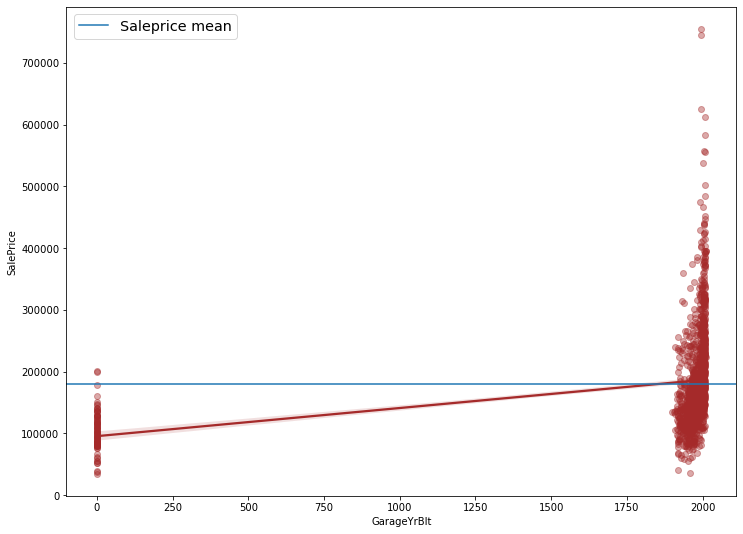

In [233]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.regplot(data=train_fe, x="GarageYrBlt", y="SalePrice", color = "brown", scatter_kws={'alpha':0.4})
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [234]:
train_fe.loc[train_fe['GarageYrBlt'] != 0]['GarageYrBlt'].describe()

count    1368.000000
mean     1978.317982
std        24.686545
min      1900.000000
25%      1961.000000
50%      1979.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [235]:
train_fe.loc[train_fe['GarageYrBlt'] == 0, 'CatGarageYrBlt'] = 'No Grg'
train_fe.loc[(train_fe['GarageYrBlt'] > 0) & (train_fe['GarageYrBlt'] <= 1980), 'CatGarageYrBlt'] = 'Old Grg'
train_fe.loc[(train_fe['GarageYrBlt'] > 1980), 'CatGarageYrBlt'] = 'New Grg'

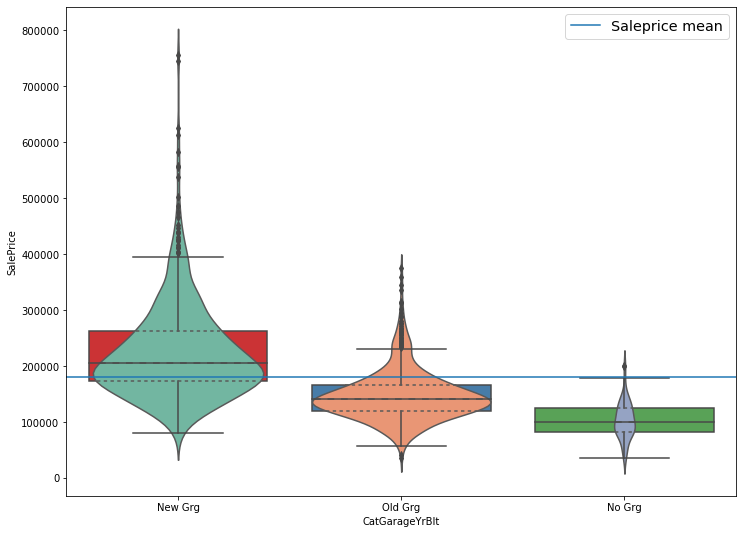

In [236]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='CatGarageYrBlt', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="CatGarageYrBlt", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [237]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['CatGarageYrBlt']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
New Grg      0.519474
Old Grg      0.409236
No Grg       0.236995
Name: SalePrice, dtype: float64

In [238]:
# New Grg, Old Grg have higher than 0.3 correlation
train_fe = pd.concat([train_fe, pd.get_dummies(train_fe['CatGarageYrBlt'])[['New Grg', 'Old Grg']].rename(columns = {'New Grg':'New_Garage', 'Old Grg':'Old_Garage'})], axis = 1)
train_fe = train_fe.drop(columns = ['GarageYrBlt', 'CatGarageYrBlt'])
train_fe

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  GrLivArea  \
0               7       2003          2003          856       1710   
1               6       1976          1976         1262       1262   
2               7       2001          2002          920       1786   
3               7       1915          1970          756       1717   
4               8       2000          2000         1145       2198   
...           ...        ...           ...          ...        ...   
1444            6       1999          2000          953       1647   
1445            6       1978          1988         1542       2073   
1446            7       1941          2006         1152       2340   
1447            5       1950          1996         1078       1078   
1448            5       1965          1965         1256       1256   

      GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0              2         548           0           61              0   
1              2         460         298            0              0   
2              2         608           0           42              0   
3              3         642           0           35            272   
4              3         836         192           84              0   
...          ...         ...         ...          ...            ...   
1444           2         460           0           40              0   
1445           2         500         349            0              0   
1446           1         252           0           60              0   
1447           1         240         366            0            112   
1448           1         276         736           68              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  \
0             0            0         0        0       2    2008     208500   
1             0            0         0        0       5    2007     181500   
2             0            0         0        0       9    2008     223500   
3             0            0         0        0       2    2006     140000   
4             0            0         0        0      12    2008     250000   
...         ...          ...       ...      ...     ...     ...        ...   
1444          0            0         0        0       8    2007     175000   
1445          0            0         0        0       2    2010     210000   
1446          0            0         0     2500       5    2010     266500   
1447          0            0         0        0       4    2010     142125   
1448          0            0         0        0       6    2008     147500   

      MSSC_1str_older  MSSC_1h_unf  MSSC_2str_newer  MSSC_Pud_Multi  \
0                   0            0                1               0   
1                   0            0                0               0   
2                   0            0                1               0   
3                   0            0                0               0   
4                   0            0                1               0   
...               ...          ...              ...             ...   
1444                0            0                1               0   
1445                0            0                0               0   
1446                0            0                0               0   
1447                0            0                0               0   
1448                0            0                0               0   

      Nbrhd_NridgHt  Nbrhd_NoRidge  OverallCond_5  Ext_1st_VinylSd  \
0                 0              0              1                1   
1                 0              0              0                0   
2                 0              0              1                1   
3                 0              0              1                0   
4                 0              1              1                1   
...             ...            ...            ...              ...   
1444              0 

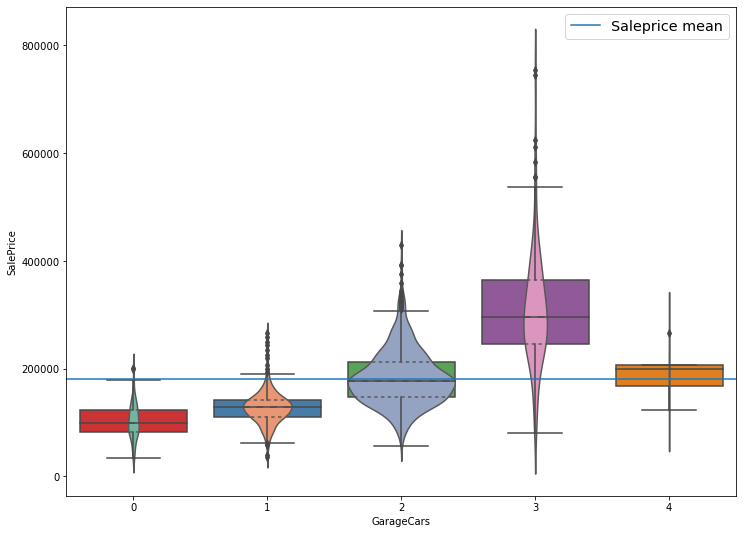

In [239]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='GarageCars', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="GarageCars", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [240]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['GarageCars']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
3            0.607780
1            0.386485
0            0.236995
2            0.044968
4            0.008988
Name: SalePrice, dtype: float64

In [241]:
# 3, 1 have higher than 0.3 correlation
train_fe = pd.concat([train_fe, pd.get_dummies(train_fe['GarageCars'])[[3, 1]].rename(columns = {3:'Grg_3cars', 1:'Grg_1car'})], axis = 1)
train_fe = train_fe.drop(columns = ['GarageCars'])
train_fe

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  GrLivArea  \
0               7       2003          2003          856       1710   
1               6       1976          1976         1262       1262   
2               7       2001          2002          920       1786   
3               7       1915          1970          756       1717   
4               8       2000          2000         1145       2198   
...           ...        ...           ...          ...        ...   
1444            6       1999          2000          953       1647   
1445            6       1978          1988         1542       2073   
1446            7       1941          2006         1152       2340   
1447            5       1950          1996         1078       1078   
1448            5       1965          1965         1256       1256   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0            548           0           61              0          0   
1            460         298            0              0          0   
2            608           0           42              0          0   
3            642           0           35            272          0   
4            836         192           84              0          0   
...          ...         ...          ...            ...        ...   
1444         460           0           40              0          0   
1445         500         349            0              0          0   
1446         252           0           60              0          0   
1447         240         366            0            112          0   
1448         276         736           68              0          0   

      ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  \
0               0         0        0       2    2008     208500   
1               0         0        0       5    2007     181500   
2               0         0        0       9    2008     223500   
3               0         0        0       2    2006     140000   
4               0         0        0      12    2008     250000   
...           ...       ...      ...     ...     ...        ...   
1444            0         0        0       8    2007     175000   
1445            0         0        0       2    2010     210000   
1446            0         0     2500       5    2010     266500   
1447            0         0        0       4    2010     142125   
1448            0         0        0       6    2008     147500   

      MSSC_1str_older  MSSC_1h_unf  MSSC_2str_newer  MSSC_Pud_Multi  \
0                   0            0                1               0   
1                   0            0                0               0   
2                   0            0                1               0   
3                   0            0                0               0   
4                   0            0                1               0   
...               ...          ...              ...             ...   
1444                0            0                1               0   
1445                0            0                0               0   
1446                0            0                0               0   
1447                0            0                0               0   
1448                0            0                0               0   

      Nbrhd_NridgHt  Nbrhd_NoRidge  OverallCond_5  Ext_1st_VinylSd  \
0                 0              0              1                1   
1                 0              0              0                0   
2                 0              0              1                1   
3                 0              0              1                0   
4                 0              1              1                1   
...             ...            ...            ...              ...   
1444              0              0              1                1   
1445              0              0              0                0   
1446              0     

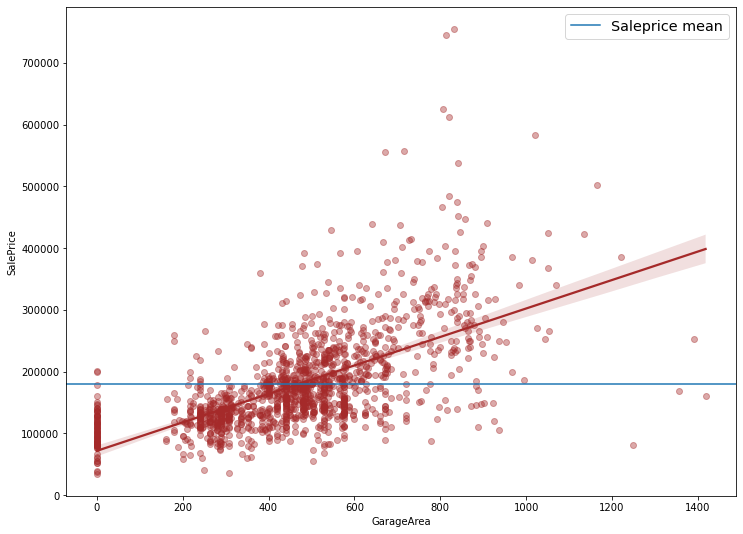

In [242]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.regplot(data=train_fe, x="GarageArea", y="SalePrice", color = "brown", scatter_kws={'alpha':0.4})
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [243]:
train_fe.corr()['SalePrice']['GarageArea']

0.6219177231702997

- Since garage area is directly related to the garage cars, choose one
- Choose GarageArea because it has a higher correlation

In [244]:
train_fe = train_fe.drop(columns = ['Grg_3cars', 'Grg_1car'])
train_fe

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  GrLivArea  \
0               7       2003          2003          856       1710   
1               6       1976          1976         1262       1262   
2               7       2001          2002          920       1786   
3               7       1915          1970          756       1717   
4               8       2000          2000         1145       2198   
...           ...        ...           ...          ...        ...   
1444            6       1999          2000          953       1647   
1445            6       1978          1988         1542       2073   
1446            7       1941          2006         1152       2340   
1447            5       1950          1996         1078       1078   
1448            5       1965          1965         1256       1256   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0            548           0           61              0          0   
1            460         298            0              0          0   
2            608           0           42              0          0   
3            642           0           35            272          0   
4            836         192           84              0          0   
...          ...         ...          ...            ...        ...   
1444         460           0           40              0          0   
1445         500         349            0              0          0   
1446         252           0           60              0          0   
1447         240         366            0            112          0   
1448         276         736           68              0          0   

      ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  \
0               0         0        0       2    2008     208500   
1               0         0        0       5    2007     181500   
2               0         0        0       9    2008     223500   
3               0         0        0       2    2006     140000   
4               0         0        0      12    2008     250000   
...           ...       ...      ...     ...     ...        ...   
1444            0         0        0       8    2007     175000   
1445            0         0        0       2    2010     210000   
1446            0         0     2500       5    2010     266500   
1447            0         0        0       4    2010     142125   
1448            0         0        0       6    2008     147500   

      MSSC_1str_older  MSSC_1h_unf  MSSC_2str_newer  MSSC_Pud_Multi  \
0                   0            0                1               0   
1                   0            0                0               0   
2                   0            0                1               0   
3                   0            0                0               0   
4                   0            0                1               0   
...               ...          ...              ...             ...   
1444                0            0                1               0   
1445                0            0                0               0   
1446                0            0                0               0   
1447                0            0                0               0   
1448                0            0                0               0   

      Nbrhd_NridgHt  Nbrhd_NoRidge  OverallCond_5  Ext_1st_VinylSd  \
0                 0              0              1                1   
1                 0              0              0                0   
2                 0              0              1                1   
3                 0              0              1                0   
4                 0              1              1                1   
...             ...            ...            ...              ...   
1444              0              0              1                1   
1445              0              0              0                0   
1446              0     

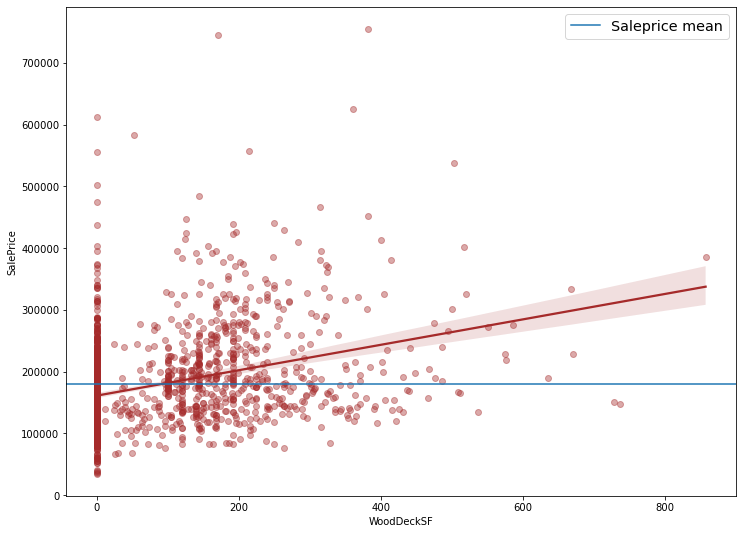

In [245]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.regplot(data=train_fe, x="WoodDeckSF", y="SalePrice", color = "brown", scatter_kws={'alpha':0.4})
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [246]:
train_fe.loc[train_fe['WoodDeckSF'] == 0, 'CatWoodDeckSF'] = 'No WdDeck'
train_fe.loc[(train_fe['WoodDeckSF'] > 0) & (train_fe['WoodDeckSF'] <= 200), 'CatWoodDeckSF'] = 'Sm WdDeck'
train_fe.loc[(train_fe['WoodDeckSF'] > 200) & (train_fe['WoodDeckSF'] <= 400), 'CatWoodDeckSF'] = 'Md WdDeck'
train_fe.loc[train_fe['WoodDeckSF'] > 400, 'CatWoodDeckSF'] = 'Lr WdDeck'

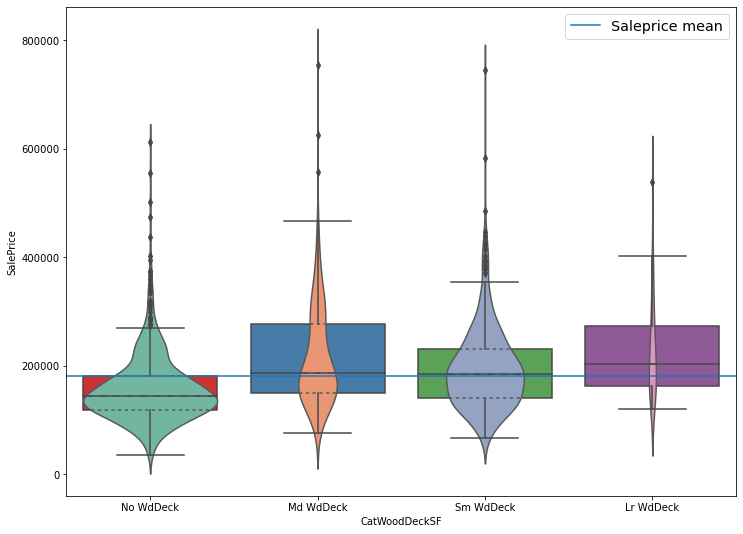

In [247]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='CatWoodDeckSF', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="CatWoodDeckSF", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [248]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['CatWoodDeckSF']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
No WdDeck    0.299388
Md WdDeck    0.199573
Sm WdDeck    0.134116
Lr WdDeck    0.102315
Name: SalePrice, dtype: float64

In [249]:
train_fe = train_fe.drop(columns = ['WoodDeckSF', 'CatWoodDeckSF'])
train_fe

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  GrLivArea  \
0               7       2003          2003          856       1710   
1               6       1976          1976         1262       1262   
2               7       2001          2002          920       1786   
3               7       1915          1970          756       1717   
4               8       2000          2000         1145       2198   
...           ...        ...           ...          ...        ...   
1444            6       1999          2000          953       1647   
1445            6       1978          1988         1542       2073   
1446            7       1941          2006         1152       2340   
1447            5       1950          1996         1078       1078   
1448            5       1965          1965         1256       1256   

      GarageArea  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0            548           61              0          0            0   
1            460            0              0          0            0   
2            608           42              0          0            0   
3            642           35            272          0            0   
4            836           84              0          0            0   
...          ...          ...            ...        ...          ...   
1444         460           40              0          0            0   
1445         500            0              0          0            0   
1446         252           60              0          0            0   
1447         240            0            112          0            0   
1448         276           68              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold  SalePrice  MSSC_1str_older  \
0            0        0       2    2008     208500                0   
1            0        0       5    2007     181500                0   
2            0        0       9    2008     223500                0   
3            0        0       2    2006     140000                0   
4            0        0      12    2008     250000                0   
...        ...      ...     ...     ...        ...              ...   
1444         0        0       8    2007     175000                0   
1445         0        0       2    2010     210000                0   
1446         0     2500       5    2010     266500                0   
1447         0        0       4    2010     142125                0   
1448         0        0       6    2008     147500                0   

      MSSC_1h_unf  MSSC_2str_newer  MSSC_Pud_Multi  Nbrhd_NridgHt  \
0               0                1               0              0   
1               0                0               0              0   
2               0                1               0              0   
3               0                0               0              0   
4               0                1               0              0   
...           ...              ...             ...            ...   
1444            0                1               0              0   
1445            0                0               0              0   
1446            0                0               0              0   
1447            0                0               0              0   
1448            0                0               0              0   

      Nbrhd_NoRidge  OverallCond_5  Ext_1st_VinylSd  Ext_2nd_VinylSd  \
0                 0              1                1                1   
1                 0              0                0                0   
2                 0              1                1                1   
3                 0              1                0                0   
4                 1              1                1                1   
...             ...            ...              ...              ...   
1444              0              1                1                1   
1445              0              0        

In [250]:
train_fe['TotPorchSF'] = train_fe['OpenPorchSF'] + train_fe['EnclosedPorch'] + train_fe['3SsnPorch'] + train_fe['ScreenPorch']

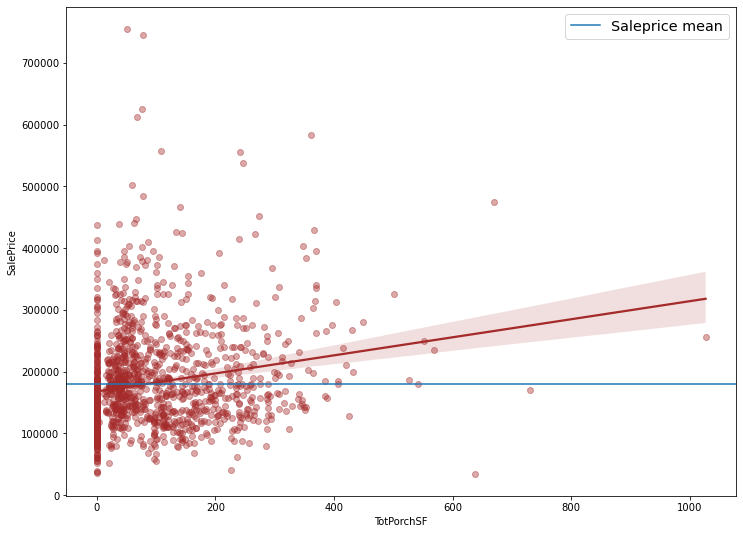

In [251]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.regplot(data=train_fe, x="TotPorchSF", y="SalePrice", color = "brown", scatter_kws={'alpha':0.4})
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [252]:
train_fe.loc[train_fe['TotPorchSF'] == 0, 'CatTotPorchSF'] = 'No Porch'
train_fe.loc[train_fe['TotPorchSF'] > 0, 'CatTotPorchSF'] = 'Porch'

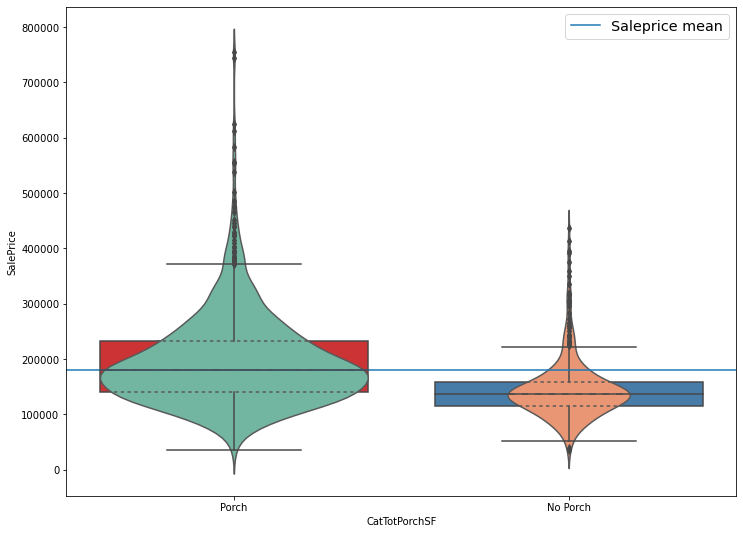

In [253]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='CatTotPorchSF', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="CatTotPorchSF", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [254]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['CatTotPorchSF']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.00000
No Porch     0.29825
Porch        0.29825
Name: SalePrice, dtype: float64

In [255]:
train_fe = train_fe.drop(columns = ['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','TotPorchSF','CatTotPorchSF'])
train_fe

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  GrLivArea  \
0               7       2003          2003          856       1710   
1               6       1976          1976         1262       1262   
2               7       2001          2002          920       1786   
3               7       1915          1970          756       1717   
4               8       2000          2000         1145       2198   
...           ...        ...           ...          ...        ...   
1444            6       1999          2000          953       1647   
1445            6       1978          1988         1542       2073   
1446            7       1941          2006         1152       2340   
1447            5       1950          1996         1078       1078   
1448            5       1965          1965         1256       1256   

      GarageArea  PoolArea  MiscVal  MoSold  YrSold  SalePrice  \
0            548         0        0       2    2008     208500   
1            460         0        0       5    2007     181500   
2            608         0        0       9    2008     223500   
3            642         0        0       2    2006     140000   
4            836         0        0      12    2008     250000   
...          ...       ...      ...     ...     ...        ...   
1444         460         0        0       8    2007     175000   
1445         500         0        0       2    2010     210000   
1446         252         0     2500       5    2010     266500   
1447         240         0        0       4    2010     142125   
1448         276         0        0       6    2008     147500   

      MSSC_1str_older  MSSC_1h_unf  MSSC_2str_newer  MSSC_Pud_Multi  \
0                   0            0                1               0   
1                   0            0                0               0   
2                   0            0                1               0   
3                   0            0                0               0   
4                   0            0                1               0   
...               ...          ...              ...             ...   
1444                0            0                1               0   
1445                0            0                0               0   
1446                0            0                0               0   
1447                0            0                0               0   
1448                0            0                0               0   

      Nbrhd_NridgHt  Nbrhd_NoRidge  OverallCond_5  Ext_1st_VinylSd  \
0                 0              0              1                1   
1                 0              0              0                0   
2                 0              0              1                1   
3                 0              0              1                0   
4                 0              1              1                1   
...             ...            ...            ...              ...   
1444              0              0              1                1   
1445              0              0              0                0   
1446              0              0              0                0   
1447              0              0              0                0   
1448              0              0              0                0   

      Ext_2nd_VinylSd  MasVnr_None  MasVnr_Stone  Ext_Qu_Avg  Ext_Qu_Good  \
0                   1            0             0           0            1   
1                   0            1             0           1            0   
2                   1            0             0           0            1   
3                   0            1             0           1            0   
4                   1            0             0           0            1   
...               ...          ...           ...         ...          ...   
1444                1            1             0           1            0   
1445                0            0             1           1  

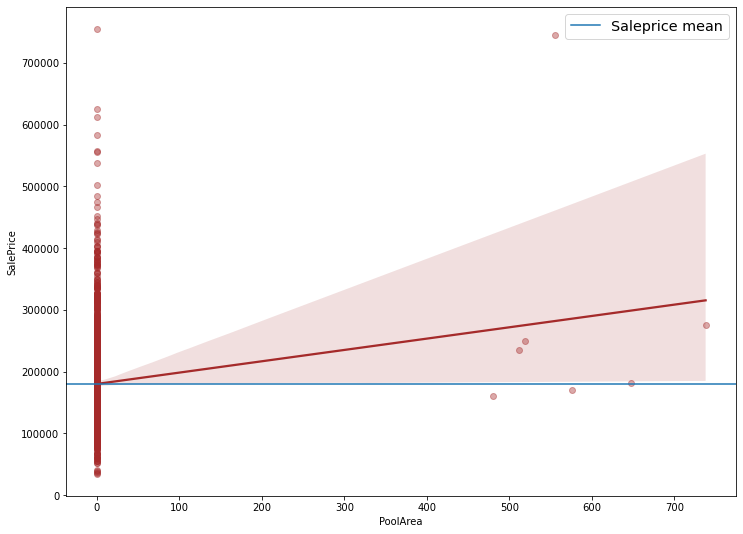

In [256]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.regplot(data=train_fe, x="PoolArea", y="SalePrice", color = "brown", scatter_kws={'alpha':0.4})
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [257]:
train_fe.loc[train_fe['PoolArea'] == 0, 'CatPoolArea'] = 'No Pool'
train_fe.loc[train_fe['PoolArea'] > 0, 'CatPoolArea'] = 'Pool'

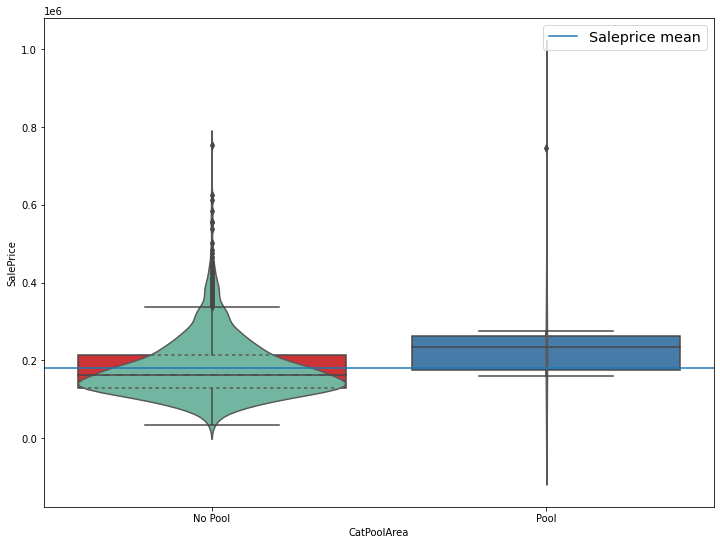

In [258]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='CatPoolArea', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="CatPoolArea", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [259]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['CatPoolArea']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
Pool         0.094542
No Pool      0.094542
Name: SalePrice, dtype: float64

In [260]:
train_fe = train_fe.drop(columns = ['PoolArea', 'CatPoolArea'])
train_fe

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  GrLivArea  \
0               7       2003          2003          856       1710   
1               6       1976          1976         1262       1262   
2               7       2001          2002          920       1786   
3               7       1915          1970          756       1717   
4               8       2000          2000         1145       2198   
...           ...        ...           ...          ...        ...   
1444            6       1999          2000          953       1647   
1445            6       1978          1988         1542       2073   
1446            7       1941          2006         1152       2340   
1447            5       1950          1996         1078       1078   
1448            5       1965          1965         1256       1256   

      GarageArea  MiscVal  MoSold  YrSold  SalePrice  MSSC_1str_older  \
0            548        0       2    2008     208500                0   
1            460        0       5    2007     181500                0   
2            608        0       9    2008     223500                0   
3            642        0       2    2006     140000                0   
4            836        0      12    2008     250000                0   
...          ...      ...     ...     ...        ...              ...   
1444         460        0       8    2007     175000                0   
1445         500        0       2    2010     210000                0   
1446         252     2500       5    2010     266500                0   
1447         240        0       4    2010     142125                0   
1448         276        0       6    2008     147500                0   

      MSSC_1h_unf  MSSC_2str_newer  MSSC_Pud_Multi  Nbrhd_NridgHt  \
0               0                1               0              0   
1               0                0               0              0   
2               0                1               0              0   
3               0                0               0              0   
4               0                1               0              0   
...           ...              ...             ...            ...   
1444            0                1               0              0   
1445            0                0               0              0   
1446            0                0               0              0   
1447            0                0               0              0   
1448            0                0               0              0   

      Nbrhd_NoRidge  OverallCond_5  Ext_1st_VinylSd  Ext_2nd_VinylSd  \
0                 0              1                1                1   
1                 0              0                0                0   
2                 0              1                1                1   
3                 0              1                0                0   
4                 1              1                1                1   
...             ...            ...              ...              ...   
1444              0              1                1                1   
1445              0              0                0                0   
1446              0              0                0                0   
1447              0              0                0                0   
1448              0              0                0                0   

      MasVnr_None  MasVnr_Stone  Ext_Qu_Avg  Ext_Qu_Good  Ext_Qu_Excel  \
0               0             0           0            1             0   
1               1             0           1            0             0   
2               0             0           0            1             0   
3               1             0           1            0             0   
4               0             0           0            1             0   
...           ...           ...         ...          ...           ...   
1444            1             0           1            0             0   
14

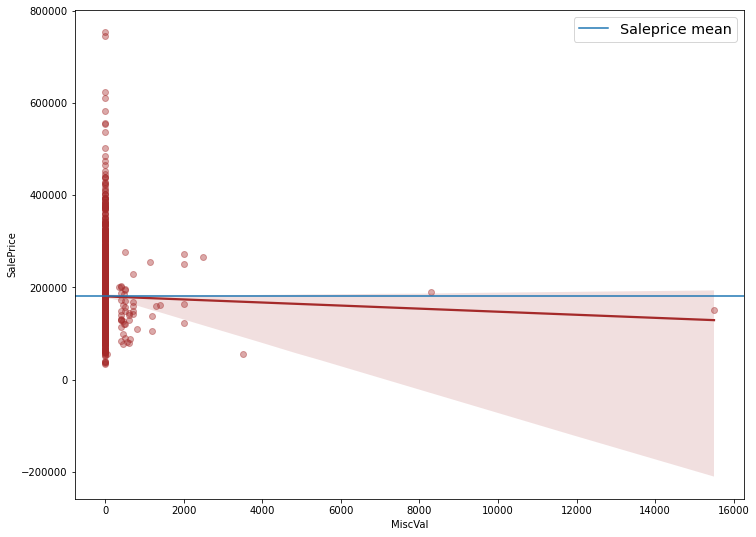

In [261]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.regplot(data=train_fe, x="MiscVal", y="SalePrice", color = "brown", scatter_kws={'alpha':0.4})
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [262]:
train_fe.loc[train_fe['MiscVal'] == 0, 'CatMiscVal'] = 'No Misc'
train_fe.loc[(train_fe['MiscVal'] > 0) & (train_fe['MiscVal'] <= 1000), 'CatMiscVal'] = 'Sm Misc'
train_fe.loc[train_fe['MiscVal'] > 1000, 'CatMiscVal'] = 'Lr Misc'

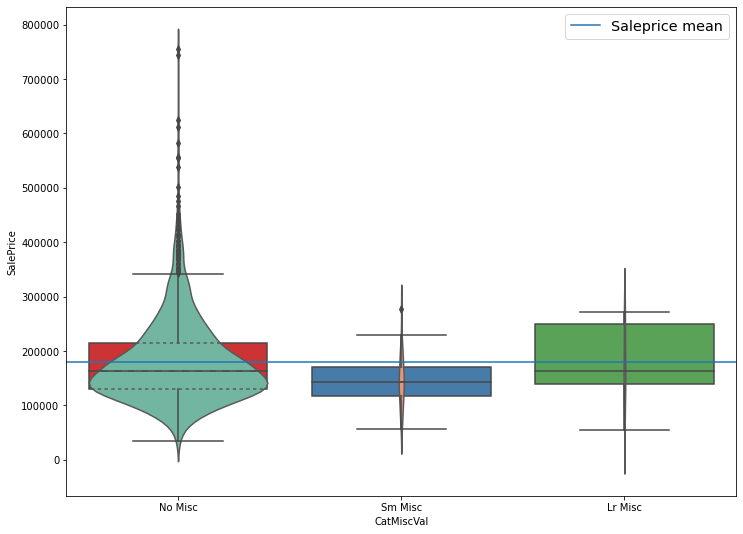

In [263]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='CatMiscVal', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="CatMiscVal", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [264]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['CatMiscVal']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
Sm Misc      0.075287
No Misc      0.067833
Lr Misc      0.004595
Name: SalePrice, dtype: float64

In [265]:
train_fe = train_fe.drop(columns = ['MiscVal', 'CatMiscVal'])
train_fe

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  GrLivArea  \
0               7       2003          2003          856       1710   
1               6       1976          1976         1262       1262   
2               7       2001          2002          920       1786   
3               7       1915          1970          756       1717   
4               8       2000          2000         1145       2198   
...           ...        ...           ...          ...        ...   
1444            6       1999          2000          953       1647   
1445            6       1978          1988         1542       2073   
1446            7       1941          2006         1152       2340   
1447            5       1950          1996         1078       1078   
1448            5       1965          1965         1256       1256   

      GarageArea  MoSold  YrSold  SalePrice  MSSC_1str_older  MSSC_1h_unf  \
0            548       2    2008     208500                0            0   
1            460       5    2007     181500                0            0   
2            608       9    2008     223500                0            0   
3            642       2    2006     140000                0            0   
4            836      12    2008     250000                0            0   
...          ...     ...     ...        ...              ...          ...   
1444         460       8    2007     175000                0            0   
1445         500       2    2010     210000                0            0   
1446         252       5    2010     266500                0            0   
1447         240       4    2010     142125                0            0   
1448         276       6    2008     147500                0            0   

      MSSC_2str_newer  MSSC_Pud_Multi  Nbrhd_NridgHt  Nbrhd_NoRidge  \
0                   1               0              0              0   
1                   0               0              0              0   
2                   1               0              0              0   
3                   0               0              0              0   
4                   1               0              0              1   
...               ...             ...            ...            ...   
1444                1               0              0              0   
1445                0               0              0              0   
1446                0               0              0              0   
1447                0               0              0              0   
1448                0               0              0              0   

      OverallCond_5  Ext_1st_VinylSd  Ext_2nd_VinylSd  MasVnr_None  \
0                 1                1                1            0   
1                 0                0                0            1   
2                 1                1                1            0   
3                 1                0                0            1   
4                 1                1                1            0   
...             ...              ...              ...          ...   
1444              1                1                1            1   
1445              0                0                0            0   
1446              0                0                0            1   
1447              0                0                0            1   
1448              0                0                0            1   

      MasVnr_Stone  Ext_Qu_Avg  Ext_Qu_Good  Ext_Qu_Excel  Fnd_PouredConc  \
0                0           0            1             0               1   
1                0           1            0             0               0   
2                0           0            1             0               1   
3                0           1            0             0               0   
4                0           0            1             0               1   
...            ...         ...          ...           ...             ...   
1444   

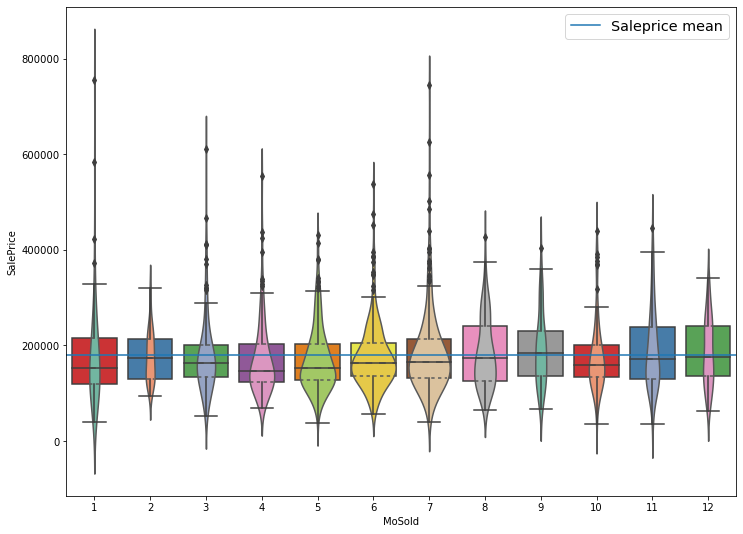

In [266]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='MoSold', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="MoSold", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [267]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['MoSold']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
5            0.043530
4            0.037437
11           0.034797
7            0.032027
9            0.028783
6            0.018265
8            0.015628
12           0.015586
2            0.007104
3            0.007103
1            0.006983
10           0.006950
Name: SalePrice, dtype: float64

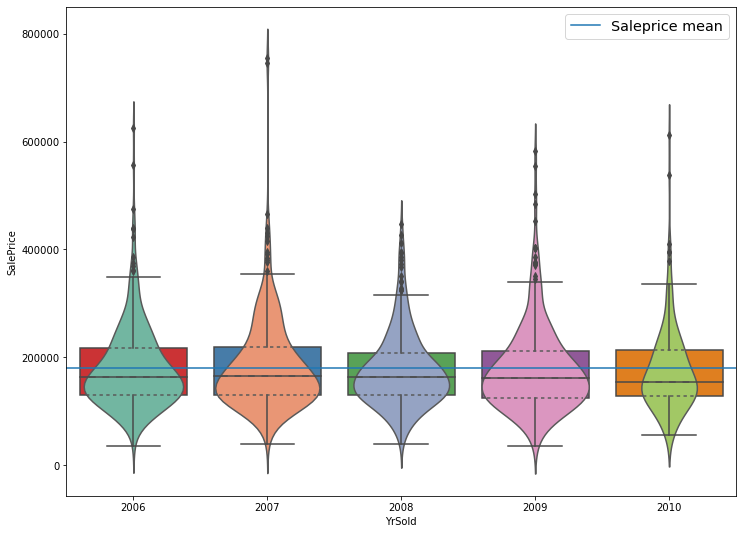

In [268]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='YrSold', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="YrSold", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [269]:
# correlation check
abs(pd.concat([pd.get_dummies(train_fe['YrSold']),train_fe['SalePrice']], axis=1).corr()['SalePrice']).sort_values(ascending = False)

SalePrice    1.000000
2007         0.036982
2008         0.022300
2010         0.015727
2009         0.009978
2006         0.007054
Name: SalePrice, dtype: float64

In [270]:
train_fe['SoldDate'] = pd.to_datetime(train_fe[['YrSold','MoSold']].rename(columns = {'YrSold':'year','MoSold':'month'}).assign(DAY=1))

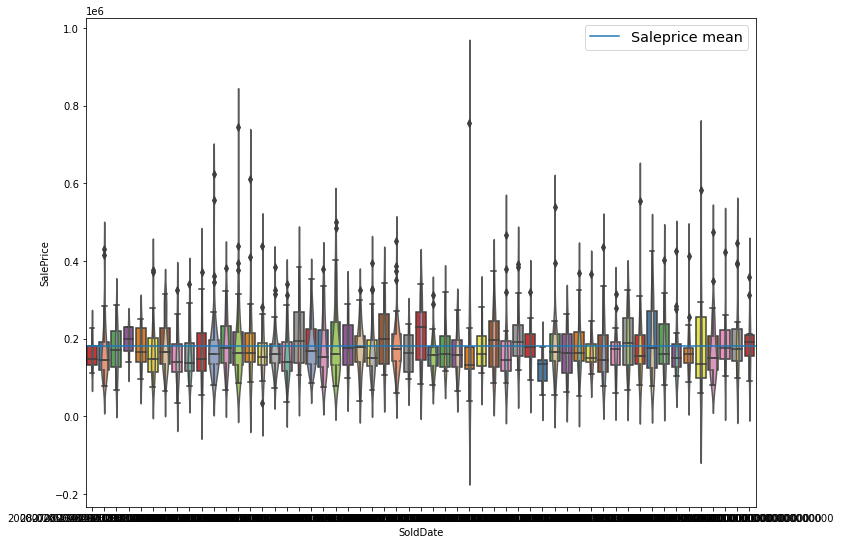

In [271]:
fig, ax =plt.subplots(1,1, figsize=(12,9))
sns.boxplot(data= train_fe, x='SoldDate', y='SalePrice', palette='Set1')
sns.violinplot(y="SalePrice", x="SoldDate", data=train_fe, scale = "count", inner = "quartile", palette='Set2')
plt.axhline(y = train_fe['SalePrice'].mean(), label='Saleprice mean')
plt.legend(fontsize = 'x-large');

In [272]:
train_fe = train_fe.drop(columns = ['MoSold', 'YrSold', 'SoldDate'])
train_fe

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  GrLivArea  \
0               7       2003          2003          856       1710   
1               6       1976          1976         1262       1262   
2               7       2001          2002          920       1786   
3               7       1915          1970          756       1717   
4               8       2000          2000         1145       2198   
...           ...        ...           ...          ...        ...   
1444            6       1999          2000          953       1647   
1445            6       1978          1988         1542       2073   
1446            7       1941          2006         1152       2340   
1447            5       1950          1996         1078       1078   
1448            5       1965          1965         1256       1256   

      GarageArea  SalePrice  MSSC_1str_older  MSSC_1h_unf  MSSC_2str_newer  \
0            548     208500                0            0                1   
1            460     181500                0            0                0   
2            608     223500                0            0                1   
3            642     140000                0            0                0   
4            836     250000                0            0                1   
...          ...        ...              ...          ...              ...   
1444         460     175000                0            0                1   
1445         500     210000                0            0                0   
1446         252     266500                0            0                0   
1447         240     142125                0            0                0   
1448         276     147500                0            0                0   

      MSSC_Pud_Multi  Nbrhd_NridgHt  Nbrhd_NoRidge  OverallCond_5  \
0                  0              0              0              1   
1                  0              0              0              0   
2                  0              0              0              1   
3                  0              0              0              1   
4                  0              0              1              1   
...              ...            ...            ...            ...   
1444               0              0              0              1   
1445               0              0              0              0   
1446               0              0              0              0   
1447               0              0              0              0   
1448               0              0              0              0   

      Ext_1st_VinylSd  Ext_2nd_VinylSd  MasVnr_None  MasVnr_Stone  Ext_Qu_Avg  \
0                   1                1            0             0           0   
1                   0                0            1             0           1   
2                   1                1            0             0           0   
3                   0                0            1             0           1   
4                   1                1            0             0           0   
...               ...              ...          ...           ...         ...   
1444                1                1            1             0           1   
1445                0                0            0             1           1   
1446                0                0            1             0           0   
1447                0                0            1             0           1   
1448                0                0            1             0           0   

      Ext_Qu_Good  Ext_Qu_Excel  Fnd_PouredConc  Fnd_CinderBlk  \
0               1             0               1              0   
1               0             0               0              1   
2               1             0               1              0   
3               0             0               0              0   
4               1             0               1              0   
...           ...           ..

- remove outliers

In [273]:
train_fe[train_fe['SalePrice'] > 700000]

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  GrLivArea  \
687            10       1994          1995         2444       4316   
1174           10       1996          1996         2396       4476   

      GarageArea  SalePrice  MSSC_1str_older  MSSC_1h_unf  MSSC_2str_newer  \
687          832     755000                0            0                1   
1174         813     745000                0            0                1   

      MSSC_Pud_Multi  Nbrhd_NridgHt  Nbrhd_NoRidge  OverallCond_5  \
687                0              0              1              0   
1174               0              0              1              1   

      Ext_1st_VinylSd  Ext_2nd_VinylSd  MasVnr_None  MasVnr_Stone  Ext_Qu_Avg  \
687                 0                0            0             0           0   
1174                0                0            1             0           0   

      Ext_Qu_Good  Ext_Qu_Excel  Fnd_PouredConc  Fnd_CinderBlk  \
687             0             1               1              0   
1174            1             0               1              0   

      BsmtQual_Excel  BsmtQual_Avg  Bsmt_Exposure_Good  Heat_Qu_Excel  \
687                1             0                   1              1   
1174               1             0                   0              1   

      Heat_Qu_Avg  Kitchen_Qu_Avg  Kitchen_Qu_Excel  Kitchen_Qu_Good  \
687             0               0                 1                0   
1174            0               0                 1                0   

      Fireplace_Qu_NA  Fireplace_Qu_Good  Grg_Ty_Detchd  Grg_Ty_Attchd  \
687                 0                  0              0              1   
1174                0                  0              0              1   

      Grg_Fin_Fin  Grg_Fin_Unf  Sale_Ty_New  Sale_Cond_Partial BsmtFin1  \
687             1            0            0                  0    GLQMd   
1174            1            0            0                  0    GLQLr   

     BsmtFin2  GLQMd  ALQMd  GLQSm  ALQSm  UnfMd  RecMd  BLQMd  No Bsmt  \
687     UnfMd    1.0    0.0    0.0    0.0    1.0    0.0    0.0      0.0   
1174    UnfSm    0.0    0.0    0.0    0.0    0.0    0.0    0.0      0.0   

      LwQMd  UnfLr  RecSm  BLQSm  LwQSm  GLQLr  ALQLr  UnfSm  logLotArea  \
687     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    9.977435   
1174    0.0    0.0    0.0    0.0    0.0    1.0    0.0    1.0    9.656499   

      No_MasVnr  Lr_MasVnr  FBath_1  FBath_2  FBath_3  HBath_1  Fireplace_0  \
687           0          1        0        0        1        1            0   
1174          1          0        0        0        1        1            0   

      Fireplace_1  New_Garage  Old_Garage  
687             0           1           0  
1174            0           1           0

In [274]:
train_ro = train_fe.drop([687, 1174])
train_ro.reset_index()

index  OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  GrLivArea  \
0         0            7       2003          2003          856       1710   
1         1            6       1976          1976         1262       1262   
2         2            7       2001          2002          920       1786   
3         3            7       1915          1970          756       1717   
4         4            8       2000          2000         1145       2198   
...     ...          ...        ...           ...          ...        ...   
1442   1444            6       1999          2000          953       1647   
1443   1445            6       1978          1988         1542       2073   
1444   1446            7       1941          2006         1152       2340   
1445   1447            5       1950          1996         1078       1078   
1446   1448            5       1965          1965         1256       1256   

      GarageArea  SalePrice  MSSC_1str_older  MSSC_1h_unf  MSSC_2str_newer  \
0            548     208500                0            0                1   
1            460     181500                0            0                0   
2            608     223500                0            0                1   
3            642     140000                0            0                0   
4            836     250000                0            0                1   
...          ...        ...              ...          ...              ...   
1442         460     175000                0            0                1   
1443         500     210000                0            0                0   
1444         252     266500                0            0                0   
1445         240     142125                0            0                0   
1446         276     147500                0            0                0   

      MSSC_Pud_Multi  Nbrhd_NridgHt  Nbrhd_NoRidge  OverallCond_5  \
0                  0              0              0              1   
1                  0              0              0              0   
2                  0              0              0              1   
3                  0              0              0              1   
4                  0              0              1              1   
...              ...            ...            ...            ...   
1442               0              0              0              1   
1443               0              0              0              0   
1444               0              0              0              0   
1445               0              0              0              0   
1446               0              0              0              0   

      Ext_1st_VinylSd  Ext_2nd_VinylSd  MasVnr_None  MasVnr_Stone  Ext_Qu_Avg  \
0                   1                1            0             0           0   
1                   0                0            1             0           1   
2                   1                1            0             0           0   
3                   0                0            1             0           1   
4                   1                1            0             0           0   
...               ...              ...          ...           ...         ...   
1442                1                1            1             0           1   
1443                0                0            0             1           1   
1444                0                0            1             0           0   
1445                0                0            1             0           1   
1446                0                0            1             0           0   

      Ext_Qu_Good  Ext_Qu_Excel  Fnd_PouredConc  Fnd_CinderBlk  \
0               1             0               1              0   
1               0             0               0              1   
2               1             0               1              0   
3               0             0               0              0   
4           

In [275]:
train_ro_corr = train_ro.corr()

In [276]:
for col in train_ro_corr.columns:
    print("correlation check for ", col)
    for i, v in enumerate(train_ro_corr[col].sort_values(ascending=False)):
        if i !=0:
            if v >= 0.8:
                print(train_ro_corr[col].sort_values(ascending=False).index[i])
                print(v)

correlation check for  OverallQual
correlation check for  YearBuilt
correlation check for  YearRemodAdd
correlation check for  TotalBsmtSF
correlation check for  GrLivArea
correlation check for  GarageArea
correlation check for  SalePrice
correlation check for  MSSC_1str_older
correlation check for  MSSC_1h_unf
correlation check for  MSSC_2str_newer
correlation check for  MSSC_Pud_Multi
correlation check for  Nbrhd_NridgHt
correlation check for  Nbrhd_NoRidge
correlation check for  OverallCond_5
correlation check for  Ext_1st_VinylSd
Ext_2nd_VinylSd
0.9772516558937522
correlation check for  Ext_2nd_VinylSd
Ext_1st_VinylSd
0.9772516558937522
correlation check for  MasVnr_None
No_MasVnr
0.9899741929583168
correlation check for  MasVnr_Stone
correlation check for  Ext_Qu_Avg
correlation check for  Ext_Qu_Good
correlation check for  Ext_Qu_Excel
correlation check for  Fnd_PouredConc
correlation check for  Fnd_CinderBlk
correlation check for  BsmtQual_Excel
correlation check for  BsmtQual_A

In [277]:
train_ro = train_ro.drop(columns = ['Ext_2nd_VinylSd','No_MasVnr','Fireplace_Qu_NA','Sale_Cond_Partial'])
train_ro_corr2 = train_ro.corr()

In [278]:
for col in train_ro_corr2.columns:
    print("correlation check for ", col)
    for i, v in enumerate(train_ro_corr2[col].sort_values(ascending=False)):
        if i !=0:
            if v >= 0.8:
                print(train_ro_corr2[col].sort_values(ascending=False).index[i])
                print(v)

correlation check for  OverallQual
correlation check for  YearBuilt
correlation check for  YearRemodAdd
correlation check for  TotalBsmtSF
correlation check for  GrLivArea
correlation check for  GarageArea
correlation check for  SalePrice
correlation check for  MSSC_1str_older
correlation check for  MSSC_1h_unf
correlation check for  MSSC_2str_newer
correlation check for  MSSC_Pud_Multi
correlation check for  Nbrhd_NridgHt
correlation check for  Nbrhd_NoRidge
correlation check for  OverallCond_5
correlation check for  Ext_1st_VinylSd
correlation check for  MasVnr_None
correlation check for  MasVnr_Stone
correlation check for  Ext_Qu_Avg
correlation check for  Ext_Qu_Good
correlation check for  Ext_Qu_Excel
correlation check for  Fnd_PouredConc
correlation check for  Fnd_CinderBlk
correlation check for  BsmtQual_Excel
correlation check for  BsmtQual_Avg
correlation check for  Bsmt_Exposure_Good
correlation check for  Heat_Qu_Excel
correlation check for  Heat_Qu_Avg
correlation check for

In [279]:
feat_count = 0
for i, v in enumerate(train_ro_corr2['SalePrice'].sort_values(ascending=False)):
    if i !=0:
        if abs(v) >= 0.2:
            print(train_ro_corr2['SalePrice'].sort_values(ascending=False).index[i])
            print(v)
            feat_count += 1
print('total features: ', feat_count)

OverallQual
0.7948985832794848
GrLivArea
0.6952407403686657
GarageArea
0.6296511060559392
TotalBsmtSF
0.6093681678339888
BsmtQual_Excel
0.5414433454226417
YearBuilt
0.5346797777309887
New_Garage
0.5283340018863555
YearRemodAdd
0.5209742038392567
Fnd_PouredConc
0.5049681508984039
Kitchen_Qu_Excel
0.48621464581907914
Ext_Qu_Good
0.47010380637049937
FBath_2
0.4528000996329029
Heat_Qu_Excel
0.4403536948351027
Ext_Qu_Excel
0.44013642298798417
Grg_Fin_Fin
0.41891445568948316
Nbrhd_NridgHt
0.41265721713828796
logLotArea
0.3905424058753695
MSSC_2str_newer
0.37611925613093006
Sale_Ty_New
0.3719111933495612
Fireplace_1
0.37081494862446784
GLQMd
0.36453260582656893
Fireplace_Qu_Good
0.35537093779650103
MasVnr_Stone
0.349648634158755
Lr_MasVnr
0.34632467793460187
Kitchen_Qu_Good
0.3453411575526605
Grg_Ty_Attchd
0.3395571249934524
OverallCond_5
0.3300598260729213
Ext_1st_VinylSd
0.3218152317869044
HBath_1
0.30193146259385967
Bsmt_Exposure_Good
0.300785025720074
Nbrhd_NoRidge
0.29224198895561676
FBa

## 5. Machine Learning

In [280]:
X = train_ro[['OverallQual','GrLivArea','GarageArea','TotalBsmtSF','BsmtQual_Excel','YearBuilt','New_Garage','YearRemodAdd','Fnd_PouredConc','Kitchen_Qu_Avg','FBath_1','Ext_Qu_Avg',  'Kitchen_Qu_Excel','Ext_Qu_Good','FBath_2','BsmtQual_Avg','Fireplace_0','Heat_Qu_Excel','Ext_Qu_Excel','Grg_Fin_Fin','Nbrhd_NridgHt','Old_Garage','Grg_Fin_Unf','logLotArea','MSSC_2str_newer','Sale_Ty_New','Fireplace_1','GLQMd','Fireplace_Qu_Good','Grg_Ty_Detchd','MasVnr_None','MasVnr_Stone','Lr_MasVnr','Kitchen_Qu_Good','Grg_Ty_Attchd','OverallCond_5','Ext_1st_VinylSd','HBath_1','Bsmt_Exposure_Good','Heat_Qu_Avg','Fnd_CinderBlk', 'Nbrhd_NoRidge','FBath_3','GLQLr','UnfLr']]
y = np.log(train_ro['SalePrice'])

In [281]:
# Model
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import learning_curve
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor

In [282]:
kf = KFold(n_splits=5 , shuffle=True, random_state=71)

In [283]:
def print_metrics(estimator):  
    mae = -cross_val_score(estimator, X, y, cv = kf, scoring="neg_mean_absolute_error", n_jobs=-1)
    mse = -cross_val_score(estimator, X, y, cv = kf, scoring="neg_mean_squared_error", n_jobs=-1)
    rmse = np.sqrt(-cross_val_score(estimator, X, y, cv = kf, scoring="neg_mean_squared_error", n_jobs=-1))
    r2 = cross_val_score(estimator, X, y, cv = kf, scoring="r2", error_score='raise', n_jobs=-1)
    print(estimator,'\n--------------------------------')
    print('MAE:', np.mean(mae))
    print('MSE:', np.mean(mse))
    print('RMSE:', np.mean(rmse))
    print('R2:', np.mean(r2))
    print('--------------------------------\n')

In [284]:
def predict_metrics(y, pred):  
    mae = mean_absolute_error(y, pred)
    mse = mean_squared_error(y, pred)
    rmse = np.sqrt(mean_squared_error(y, pred))
    r2 = r2_score(y, pred)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2:', r2)
    print('')

In [285]:
def check_rmse(estimator):  
    rmse = np.sqrt(-cross_val_score(estimator, X, y, cv = kf, scoring="neg_mean_squared_error", n_jobs=-1))
    return np.mean(rmse)

In [286]:
def predict_rmse(y, pred):
    rmse = np.sqrt(mean_squared_error(y, pred))
    return np.mean(rmse)

In [287]:
%%time
lr = LinearRegression().fit(X, y)
lasso = Lasso(random_state=71).fit(X, y)
ridge = Ridge(random_state=71).fit(X, y)
elastic = ElasticNet(random_state=71).fit(X, y)
svr = SVR().fit(X, y)
kr = KernelRidge().fit(X, y)
sgd = SGDRegressor(random_state=71).fit(X, y)
rf = RandomForestRegressor(random_state=71, n_jobs=-1).fit(X, y)

Wall time: 217 ms


In [288]:
print_metrics(lr), 
print_metrics(lasso), 
print_metrics(ridge),
print_metrics(elastic),
print_metrics(svr),
print_metrics(kr),
print_metrics(sgd), 
print_metrics(rf)

LinearRegression() 
--------------------------------
MAE: 0.10380231515286498
MSE: 0.02541590516010512
RMSE: 0.1580203244469574
R2: 0.8348661683658989
--------------------------------

Lasso(random_state=71) 
--------------------------------
MAE: 0.1301107755629116
MSE: 0.04176534455445412
RMSE: 0.20142054291641873
R2: 0.7256880161599207
--------------------------------

Ridge(random_state=71) 
--------------------------------
MAE: 0.10341727832344935
MSE: 0.025273463771725253
RMSE: 0.15757344875711246
R2: 0.8357082610802455
--------------------------------

ElasticNet(random_state=71) 
--------------------------------
MAE: 0.12682569589930365
MSE: 0.03950183453082764
RMSE: 0.1961948699352753
R2: 0.7406254814883102
--------------------------------

SVR() 
--------------------------------
MAE: 0.13251151651886578
MSE: 0.035377757383827875
RMSE: 0.18748983942006997
R2: 0.7729318732983822
--------------------------------

KernelRidge() 
--------------------------------
MAE: 0.103681274434

In [289]:
def grid_search (estimator, param):
    gscv = GridSearchCV(estimator, param, cv=kf, n_jobs=-1, scoring='neg_mean_squared_error')
    gscv.fit(X, y)
    return gscv.best_estimator_

def random_search (estimator, param):
    rscv = RandomizedSearchCV(estimator, param, cv=kf, n_jobs=-1, scoring='neg_mean_squared_error')
    rscv.fit(X, y)
    return rscv.best_estimator_

In [290]:
lasso_params = {'alpha':[.0005, .001, .0015, .01, .015, .1, 1]}
ridge_params = {'alpha':[.01, .015, .1, 1, 10, 100]}
sgd_params = {'alpha':[.001, .01, .1, 1], 'eta0':[.001, .003, .01, .03, .1, .3, 1]}
elastic_params ={'alpha':[.0005, .001, .0015, .01, .015, .1, 1], 'l1_ratio':[.1, .5, .9, .95, .99]}
svr_params = {'C': [.001, .015, .01, .1], 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
kr_params = {'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
rf_params = {'n_estimators': range(100, 551, 50)}

gscv_param = [lasso_params, ridge_params, elastic_params, sgd_params, kr_params]
rscv_param = [svr_params, rf_params]

In [291]:
%%time
best_est = []
n=0
for model in [lasso, ridge, elastic, sgd, kr]:
    best_est.append(grid_search(model, gscv_param[n]))
    n+=1
n=0
for model in [svr, rf]:
    best_est.append(random_search(model, rscv_param[n]))
    n+=1

Wall time: 29.3 s


In [292]:
best_est

[Lasso(alpha=0.0005, random_state=71),
 Ridge(alpha=10, random_state=71),
 ElasticNet(alpha=0.0015, l1_ratio=0.1, random_state=71),
 SGDRegressor(alpha=0.001, eta0=0.001, random_state=71),
 KernelRidge(),
 SVR(C=0.1, kernel='poly'),
 RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=71)]

In [293]:
for model in best_est:
    print_metrics(model)

Lasso(alpha=0.0005, random_state=71) 
--------------------------------
MAE: 0.10293050127576749
MSE: 0.025497646900870818
RMSE: 0.15815087686890805
R2: 0.833846305177989
--------------------------------

Ridge(alpha=10, random_state=71) 
--------------------------------
MAE: 0.10222872836201305
MSE: 0.025053822915174207
RMSE: 0.15679781521613265
R2: 0.8367550980114127
--------------------------------

ElasticNet(alpha=0.0015, l1_ratio=0.1, random_state=71) 
--------------------------------
MAE: 0.10303275849357714
MSE: 0.025260140300201406
RMSE: 0.15749669143450176
R2: 0.8356428433966382
--------------------------------

SGDRegressor(alpha=0.001, eta0=0.001, random_state=71) 
--------------------------------
MAE: 213861693836715.16
MSE: 7.957910518201936e+28
RMSE: 229084120581073.2
R2: -4.968323668568393e+29
--------------------------------

KernelRidge() 
--------------------------------
MAE: 0.10368127443452732
MSE: 0.025493944334451096
RMSE: 0.15825864817786095
R2: 0.834197375810988

In [294]:
lasso = best_est[0]
ridge = best_est[1]
elastic = best_est[2]
kr = best_est[4]
svr = best_est[5]
rf = best_est[6]

lasso_rmse = predict_rmse(y, lasso.predict(X))
ridge_rmse = predict_rmse(y, ridge.predict(X))
elastic_rmse = predict_rmse(y, elastic.predict(X))
kr_rmse = predict_rmse(y, kr.predict(X))
svr_rmse = predict_rmse(y, svr.predict(X))
rf_rmse = predict_rmse(y, rf.predict(X))

In [295]:
def plot_learning_curve(estimator, X, y):
    
    train_sizes, train_score, test_score = learning_curve(
    estimator =  estimator,
    X = X,
    y = y, 
    train_sizes = np.linspace(0.01, 1.0, 50), 
    cv = kf,
    n_jobs=-1,
    shuffle=True,
    scoring='neg_mean_squared_error',
    random_state=17) 
    
    mean_train = -np.mean(train_score, axis=1)
    mean_test = -np.mean(test_score, axis=1)

    plt.plot(train_sizes, mean_train, '--', color="b",  label="Training score")
    plt.plot(train_sizes, mean_test ,color="g", label="Cross-validation score")

    plt.title('Learning curve')
    plt.xlabel("Size"),
    plt.ylabel("Rmse"),
    plt.legend(loc="best")
    plt.show()

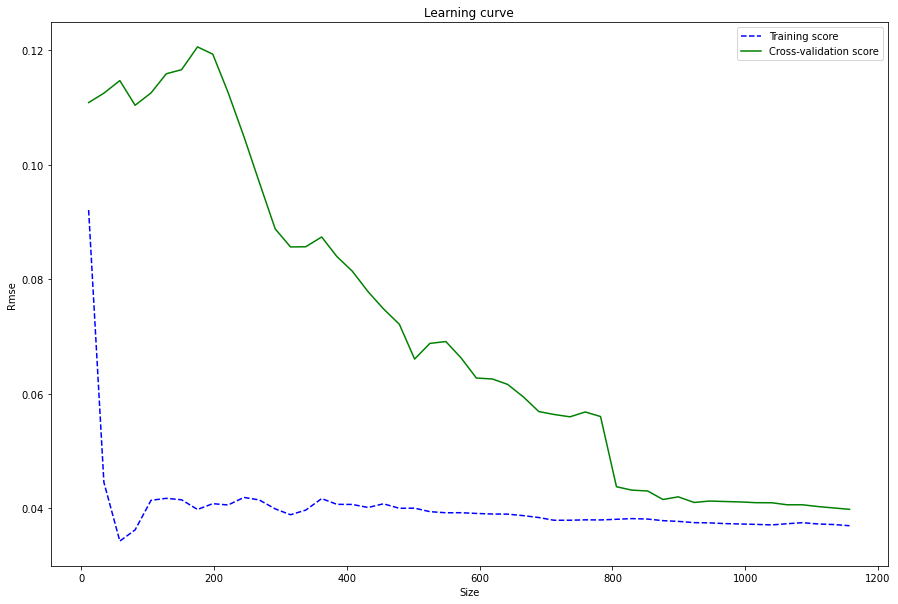

In [296]:
plt.figure(figsize=(15,10))
plot_learning_curve(svr, X, y)

In [299]:
import xgboost as xgb

In [320]:
model_xgb = xgb.XGBRegressor(n_estimators=2200)
model_xgb.fit(X, y)
print_metrics(model_xgb)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=2200, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None) 
--------------------------------
MAE: 0.10582708795627724
MSE: 0.02247835756565903
RMSE: 0.14961379370325273
R2: 0.8564607061986538
--------------------------------



In [323]:
%%time
stack = StackingRegressor([('lasso',lasso),('ridge',ridge),('svr',svr), ('kr',kr),('elastic',elastic),('rf',rf),('xgb',model_xgb)], kr, cv=kf, n_jobs=-1)
stack.fit(X, y)

Wall time: 6.36 s


StackingRegressor(cv=KFold(n_splits=5, random_state=71, shuffle=True),
                  estimators=[('lasso', Lasso(alpha=0.0005, random_state=71)),
                              ('ridge', Ridge(alpha=10, random_state=71)),
                              ('svr', SVR(C=0.1, kernel='poly')),
                              ('kr', KernelRidge()),
                              ('elastic',
                               ElasticNet(alpha=0.0015, l1_ratio=0.1,
                                          random_state=71)),
                              ('rf',
                               RandomForestRegressor(n_estimators=300,
                                                     n_jobs=-1,
                                                     random_...
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                             

In [324]:
print_metrics(stack)

StackingRegressor(cv=KFold(n_splits=5, random_state=71, shuffle=True),
                  estimators=[('lasso', Lasso(alpha=0.0005, random_state=71)),
                              ('ridge', Ridge(alpha=10, random_state=71)),
                              ('svr', SVR(C=0.1, kernel='poly')),
                              ('kr', KernelRidge()),
                              ('elastic',
                               ElasticNet(alpha=0.0015, l1_ratio=0.1,
                                          random_state=71)),
                              ('rf',
                               RandomForestRegressor(n_estimators=300,
                                                     n_jobs=-1,
                                                     random_...
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                             

## Use randomforest with best est

- Preprocessing to the test data set

In [302]:
test_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1            Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4            HLS    AllPub    Inside       Gtl      StoneBr       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     1Story            5            6       1961   
1          Norm     1Fam     1Story            6            6       1958   
2          Norm     1Fam     2Story            5            5       1997   
3          Norm     1Fam     2Story            6            6       1998   
4          Norm   TwnhsE     1Story            8            5       1992   
...         ...      ...        ...          ...          ...        ...   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1961     Gable  CompShg     VinylSd     VinylSd       None   
1             1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2             1998     Gable  CompShg     VinylSd     VinylSd       None   
3             1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4             1992     Gable  CompShg     HdBoard     HdBoard       None   
...            ...       ...      ...         ...         ...        ...   
1454          1970     Gable  CompShg     CemntBd     CmentBd       None   
1455          1970     Gable  CompShg     CemntBd     CmentBd       None   
1456          1996     Gable  CompShg     VinylSd     VinylSd       None   
1457          1992     Gable  CompShg     HdBoard     Wd Shng       None   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       TA       TA   
1          108.0        TA        TA     CBlock       TA       TA   
2            0.0        TA        TA      PConc       Gd       TA   
3           20.0        TA        TA      PConc       TA       TA   

In [303]:
test_noid = test_df.drop(columns = ['Id'])

In [304]:
test_noid.loc[test_noid['PoolQC'].isna(), 'PoolQC'] = 'No Pool'
test_noid.loc[test_noid['MiscFeature'].isna(), 'MiscFeature'] = 'No Misc'
test_noid.loc[test_noid['Alley'].isna(), 'Alley'] = 'No Alley'
test_noid.loc[test_noid['Fence'].isna(), 'Fence'] = 'No Fence'
test_noid.loc[test_noid['FireplaceQu'].isna(), 'FireplaceQu'] = 'No Fireplace'
test_noid.loc[test_noid['LotFrontage'].isna(), 'LotFrontage'] = 0
test_noid.loc[test_noid['GarageFinish'].isna(), ['GarageFinish','GarageCond','GarageType','GarageQual']] = 'No Garage'
test_noid.loc[test_noid['BsmtFinType1'].isna(), ['BsmtFinType1','BsmtQual','BsmtCond','BsmtFinType2','BsmtExposure']] = 'No Basement'

In [305]:
test_noid.isna().sum().sort_values(ascending=False)

GarageYrBlt      78
MasVnrType       16
MasVnrArea       15
MSZoning          4
BsmtCond          3
                 ..
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
SaleCondition     0
Length: 79, dtype: int64

In [306]:
test_fe = test_noid

In [307]:
test_fe = pd.concat([test_fe, pd.get_dummies(test_fe['MSSubClass'])[60].rename('MSSC_2str_newer')], axis = 1)
test_fe = test_fe.drop(columns=['MSSubClass'])
test_fe = test_fe.drop(columns=['MSZoning'])
test_fe = test_fe.drop(columns=['Street'])
test_fe = test_fe.drop(columns=['Alley'])
test_fe = test_fe.drop(columns=['LotShape'])
test_fe = test_fe.drop(columns=['LandContour'])
test_fe = test_fe.drop(columns=['Utilities'])
test_fe = test_fe.drop(columns=['LotConfig'])
test_fe = test_fe.drop(columns=['LandSlope'])
test_fe = pd.concat([test_fe, pd.get_dummies(test_fe['Neighborhood'])[['NridgHt','NoRidge']].rename(columns = {'NridgHt':'Nbrhd_NridgHt','NoRidge':'Nbrhd_NoRidge'})], axis = 1)
test_fe = test_fe.drop(columns=['Neighborhood'])
test_fe = test_fe.drop(columns=['Condition1'])
test_fe = test_fe.drop(columns=['Condition2'])
test_fe = test_fe.drop(columns=['BldgType'])
test_fe = test_fe.drop(columns=['HouseStyle'])
test_fe = pd.concat([test_fe, pd.get_dummies(test_fe['OverallCond'])[5].rename('OverallCond_5')], axis = 1)
test_fe = test_fe.drop(columns=['OverallCond'])
test_fe = test_fe.drop(columns=['RoofStyle'])
test_fe = test_fe.drop(columns=['RoofMatl'])
test_fe = pd.concat([test_fe, pd.get_dummies(test_fe['Exterior1st'])['VinylSd'].rename('Ext_1st_VinylSd')], axis = 1)
test_fe = test_fe.drop(columns=['Exterior1st'])
test_fe = pd.concat([test_fe, pd.get_dummies(test_fe['Exterior2nd'])['VinylSd'].rename('Ext_2nd_VinylSd')], axis = 1)
test_fe = test_fe.drop(columns=['Exterior2nd'])
test_fe = pd.concat([test_fe, pd.get_dummies(test_fe['MasVnrType'])[['None','Stone']].rename(columns = {'None':'MasVnr_None','Stone':'MasVnr_Stone'})], axis = 1)
test_fe = test_fe.drop(columns=['MasVnrType'])
test_fe = pd.concat([test_fe, pd.get_dummies(test_fe['ExterQual'])[['TA','Gd','Ex']].rename(columns = {'TA':'Ext_Qu_Avg','Gd':'Ext_Qu_Good','Ex':'Ext_Qu_Excel'})], axis = 1)
test_fe = test_fe.drop(columns=['ExterQual'])
test_fe = test_fe.drop(columns=['ExterCond'])
test_fe = pd.concat([test_fe, pd.get_dummies(test_fe['Foundation'])[['PConc','CBlock']].rename(columns = {'PConc':'Fnd_PouredConc','CBlock':'Fnd_CinderBlk'})], axis = 1)
test_fe = test_fe.drop(columns=['Foundation'])
test_fe = pd.concat([test_fe, pd.get_dummies(test_fe['BsmtQual'])[['Ex','TA']].rename(columns = {'Ex':'BsmtQual_Excel','TA':'BsmtQual_Avg'})], axis = 1)
test_fe = test_fe.drop(columns=['BsmtQual'])
test_fe = test_fe.drop(columns=['BsmtCond'])
test_fe = pd.concat([test_fe, pd.get_dummies(test_fe['BsmtExposure'])[['Gd']].rename(columns = {'Gd':'Bsmt_Exposure_Good'})], axis = 1)
test_fe = test_fe.drop(columns=['BsmtExposure'])
test_fe = test_fe.drop(columns=['Heating'])
test_fe = pd.concat([test_fe, pd.get_dummies(test_fe['HeatingQC'])[['Ex','TA']].rename(columns = {'Ex':'Heat_Qu_Excel','TA':'Heat_Qu_Avg'})], axis = 1)
test_fe = test_fe.drop(columns=['HeatingQC'])
test_fe = test_fe.drop(columns=['CentralAir'])
test_fe = test_fe.drop(columns=['Electrical'])
test_fe = pd.concat([test_fe, pd.get_dummies(test_fe['KitchenQual'])[['TA','Ex','Gd']].rename(columns = {'TA':'Kitchen_Qu_Avg','Ex':'Kitchen_Qu_Excel','Gd':'Kitchen_Qu_Good'})], axis = 1)
test_fe = test_fe.drop(columns=['KitchenQual'])
test_fe = test_fe.drop(columns=['Functional'])
test_fe = pd.concat([test_fe, pd.get_dummies(test_fe['FireplaceQu'])[['No Fireplace','Gd']].rename(columns = {'No Fireplace':'Fireplace_Qu_NA','Gd':'Fireplace_Qu_Good'})], axis = 1)
test_fe = test_fe.drop(columns=['FireplaceQu'])
test_fe = pd.concat([test_fe, pd.get_dummies(test_fe['GarageType'])[['Detchd','Attchd']].rename(columns = {'Detchd':'Grg_Ty_Detchd','Attchd':'Grg_Ty_Attchd'})], axis = 1)
test_fe = test_fe.drop(columns=['GarageType'])
test_fe = pd.concat([test_fe, pd.get_dummies(test_fe['GarageFinish'])[['Fin','Unf']].rename(columns = {'Fin':'Grg_Fin_Fin','Unf':'Grg_Fin_Unf'})], axis = 1)
test_fe = test_fe.drop(columns=['GarageFinish'])
test_fe = test_fe.drop(columns=['GarageQual'])
test_fe = test_fe.drop(columns=['GarageCond'])
test_fe = test_fe.drop(columns=['PavedDrive'])
test_fe = test_fe.drop(columns=['PoolQC'])
test_fe = test_fe.drop(columns=['Fence'])
test_fe = test_fe.drop(columns=['MiscFeature'])
test_fe = pd.concat([test_fe, pd.get_dummies(test_fe['SaleType'])[['New']].rename(columns = {'New':'Sale_Ty_New'})], axis = 1)
test_fe = test_fe.drop(columns=['SaleType'])
test_fe = pd.concat([test_fe, pd.get_dummies(test_fe['SaleCondition'])[['Partial']].rename(columns = {'Partial':'Sale_Cond_Partial'})], axis = 1)
test_fe = test_fe.drop(columns=['SaleCondition'])

In [308]:
test_fe['BsmtFin1'] = ""
for i, fintype1, type1area in zip(test_fe.index, test_fe['BsmtFinType1'], test_fe['BsmtFinSF1']) :
    if type1area > 1500:
        test_fe.loc[i,'BsmtFin1'] = fintype1 + "Lr"
    elif (type1area < 500) & (type1area > 0):
        test_fe.loc[i,'BsmtFin1'] = fintype1 + "Sm"
    elif type1area != 0:
        test_fe.loc[i,'BsmtFin1'] = fintype1 + "Md"
    else:
        if test_fe['BsmtUnfSF'][i] != 0:
            if test_fe['BsmtUnfSF'][i] > 1500:
                test_fe.loc[i,'BsmtFin1'] = 'UnfLr'
            elif (test_fe['BsmtUnfSF'][i] < 500) & (test_fe['BsmtUnfSF'][i] > 0):
                test_fe.loc[i,'BsmtFin1'] = 'UnfSm'
            else:
                test_fe.loc[i,'BsmtFin1'] = 'UnfMd'
        else:
            test_fe.loc[i,'BsmtFin1'] = 'No Bsmt'
test_fe['BsmtFin1'].value_counts()

UnfMd            330
GLQMd            293
ALQMd            129
GLQSm            107
RecSm            102
ALQSm             78
BLQMd             61
BLQSm             60
LwQSm             58
UnfLr             57
RecMd             53
No Bsmt           41
UnfSm             34
GLQLr             31
LwQMd             22
ALQLr              2
No BasementMd      1
Name: BsmtFin1, dtype: int64

In [309]:
test_fe['BsmtFin2'] = ""
for i, fintype2, type2area in zip(test_fe.index, test_fe['BsmtFinType2'], test_fe['BsmtFinSF2']) :
    if type2area > 1500:
        test_fe.loc[i,'BsmtFin2'] = fintype2 + "Lr"
    elif (type2area < 500) & (type2area > 0):
        test_fe.loc[i,'BsmtFin2'] = fintype2 + "Sm"
    elif type2area != 0:
        test_fe.loc[i,'BsmtFin2'] = fintype2 + "Md"
    else:
        if test_fe['BsmtUnfSF'][i] != 0:
            if test_fe['BsmtUnfSF'][i] > 1500:
                test_fe.loc[i,'BsmtFin2'] = 'UnfLr'
            elif (test_fe['BsmtUnfSF'][i] < 500) & (test_fe['BsmtUnfSF'][i] > 0):
                test_fe.loc[i,'BsmtFin2'] = 'UnfSm'
            else:
                test_fe.loc[i,'BsmtFin2'] = 'UnfMd'
        else:
            test_fe.loc[i,'BsmtFin2'] = 'No Bsmt'
test_fe['BsmtFin2'].value_counts()

UnfMd            583
UnfSm            546
No Bsmt           81
UnfLr             69
RecSm             40
LwQSm             33
BLQSm             25
ALQSm             17
ALQMd             16
GLQMd             15
RecMd             11
BLQMd              9
LwQMd              8
GLQSm              4
GLQLr              1
No BasementMd      1
Name: BsmtFin2, dtype: int64

In [310]:
test_fe = test_fe.reset_index(drop=True)
for i in range(len(test_fe['BsmtFin1'])):
    test_fe.loc[i,test_fe['BsmtFin1'][i]] = 1
for i in range(len(test_fe['BsmtFin2'])):
    test_fe.loc[i,test_fe['BsmtFin2'][i]] = 1
test_fe = test_fe.fillna(0)
test_fe = test_fe.drop(columns = ['BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF'])

In [311]:
test_fe = test_fe.drop(columns=['LotFrontage'])
test_fe['logLotArea'] = np.log(test_fe['LotArea'])
test_fe = test_fe.drop(columns=['LotArea'])

In [312]:
test_fe.loc[test_fe['MasVnrArea'] == 0, 'CatMasVnrArea'] = 'No MasVnr'
test_fe.loc[(test_fe['MasVnrArea'] > 0) & (test_fe['MasVnrArea'] <= 200), 'CatMasVnrArea'] = 'Sm MasVnr'
test_fe.loc[(test_fe['MasVnrArea'] > 200) & (test_fe['MasVnrArea'] <= 400), 'CatMasVnrArea'] = 'Md MasVnr'
test_fe.loc[(test_fe['MasVnrArea'] > 400), 'CatMasVnrArea'] = 'Lr MasVnr'
test_fe = pd.concat([test_fe, pd.get_dummies(test_fe['CatMasVnrArea'])[['No MasVnr', 'Lr MasVnr']].rename(columns = {'No MasVnr':'No_MasVnr','Lr MasVnr':'Lr_MasVnr'})], axis = 1)
test_fe = test_fe.drop(columns=['MasVnrArea', 'CatMasVnrArea'])
test_fe = test_fe.drop(columns = ['1stFlrSF', '2ndFlrSF', 'LowQualFinSF'])
test_fe = pd.concat([test_fe, pd.get_dummies(test_fe['FullBath'])[[1, 2, 3]].rename(columns = {1:'FBath_1',2:'FBath_2',3:'FBath_3'})], axis = 1)
test_fe = pd.concat([test_fe, pd.get_dummies(test_fe['HalfBath'])[[1]].rename(columns = {1:'HBath_1'})], axis = 1)
test_fe = test_fe.drop(columns = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd'])
test_fe = pd.concat([test_fe, pd.get_dummies(test_fe['Fireplaces'])[[0, 1]].rename(columns = {0:'Fireplace_0', 1:'Fireplace_1'})], axis = 1)
test_fe = test_fe.drop(columns = ['Fireplaces'])

In [313]:
test_fe.loc[test_fe['GarageYrBlt'] == 0, 'CatGarageYrBlt'] = 'No Grg'
test_fe.loc[(test_fe['GarageYrBlt'] > 0) & (test_fe['GarageYrBlt'] <= 1980), 'CatGarageYrBlt'] = 'Old Grg'
test_fe.loc[(test_fe['GarageYrBlt'] > 1980), 'CatGarageYrBlt'] = 'New Grg'
test_fe = pd.concat([test_fe, pd.get_dummies(test_fe['CatGarageYrBlt'])[['New Grg', 'Old Grg']].rename(columns = {'New Grg':'New_Garage', 'Old Grg':'Old_Garage'})], axis = 1)
test_fe = test_fe.drop(columns = ['GarageYrBlt', 'CatGarageYrBlt'])
test_fe = test_fe.drop(columns = ['GarageCars'])
test_fe = test_fe.drop(columns = ['WoodDeckSF'])
test_fe = test_fe.drop(columns = ['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'])
test_fe = test_fe.drop(columns = ['PoolArea'])
test_fe = test_fe.drop(columns = ['MiscVal'])
test_fe = test_fe.drop(columns = ['MoSold', 'YrSold'])

In [314]:
test_fe

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  GrLivArea  \
0               5       1961          1961        882.0        896   
1               6       1958          1958       1329.0       1329   
2               5       1997          1998        928.0       1629   
3               6       1998          1998        926.0       1604   
4               8       1992          1992       1280.0       1280   
...           ...        ...           ...          ...        ...   
1454            4       1970          1970        546.0       1092   
1455            4       1970          1970        546.0       1092   
1456            5       1960          1996       1224.0       1224   
1457            5       1992          1992        912.0        970   
1458            7       1993          1994        996.0       2000   

      GarageArea  MSSC_2str_newer  Nbrhd_NridgHt  Nbrhd_NoRidge  \
0          730.0                0              0              0   
1          312.0                0              0              0   
2          482.0                1              0              0   
3          470.0                1              0              0   
4          506.0                0              0              0   
...          ...              ...            ...            ...   
1454         0.0                0              0              0   
1455       286.0                0              0              0   
1456       576.0                0              0              0   
1457         0.0                0              0              0   
1458       650.0                1              0              0   

      OverallCond_5  Ext_1st_VinylSd  Ext_2nd_VinylSd  MasVnr_None  \
0                 0                1                1            1   
1                 0                0                0            0   
2                 1                1                1            1   
3                 0                1                1            0   
4                 1                0                0            1   
...             ...              ...              ...          ...   
1454              0                0                0            1   
1455              1                0                0            1   
1456              0                1                1            1   
1457              1                0                0            1   
1458              1                0                0            0   

      MasVnr_Stone  Ext_Qu_Avg  Ext_Qu_Good  Ext_Qu_Excel  Fnd_PouredConc  \
0                0           1            0             0               0   
1                0           1            0             0               0   
2                0           1            0             0               1   
3                0           1            0             0               1   
4                0           0            1             0               1   
...            ...         ...          ...           ...             ...   
1454             0           1            0             0               0   
1455             0           1            0             0               0   
1456             0           1            0             0               0   
1457             0           1            0             0               1   
1458             0           1            0             0               1   

      Fnd_CinderBlk  BsmtQual_Excel  BsmtQual_Avg  Bsmt_Exposure_Good  \
0                 1               0             1                   0   
1                 1               0             1                   0   
2                 0               0             0                   0   
3                 0               0             1                   0   
4                 0               0             0                   0   
...             ...             ...           ...                 ...   
1454              1               0             1                   0   
1455      

In [315]:
test_fe.isna().sum().sort_values(ascending=False)

OverallQual          0
Sale_Ty_New          0
BsmtFin1             0
BsmtFin2             0
RecSm                0
                    ..
Fireplace_Qu_NA      0
Fireplace_Qu_Good    0
Grg_Ty_Detchd        0
Grg_Ty_Attchd        0
Old_Garage           0
Length: 65, dtype: int64

In [316]:
X_test = test_fe[['OverallQual','GrLivArea','GarageArea','TotalBsmtSF','BsmtQual_Excel','YearBuilt','New_Garage','YearRemodAdd','Fnd_PouredConc','Kitchen_Qu_Avg','FBath_1','Ext_Qu_Avg',  'Kitchen_Qu_Excel','Ext_Qu_Good','FBath_2','BsmtQual_Avg','Fireplace_0','Heat_Qu_Excel','Ext_Qu_Excel','Grg_Fin_Fin','Nbrhd_NridgHt','Old_Garage','Grg_Fin_Unf','logLotArea','MSSC_2str_newer','Sale_Ty_New','Fireplace_1','GLQMd','Fireplace_Qu_Good','Grg_Ty_Detchd','MasVnr_None','MasVnr_Stone','Lr_MasVnr','Kitchen_Qu_Good','Grg_Ty_Attchd','OverallCond_5','Ext_1st_VinylSd','HBath_1','Bsmt_Exposure_Good','Heat_Qu_Avg','Fnd_CinderBlk', 'Nbrhd_NoRidge','FBath_3','GLQLr','UnfLr']]

In [328]:
test_predict = np.exp(stack.predict(X_test))

In [336]:
submission = pd.DataFrame({'Id':test_df.Id, 'SalePrice': test_predict})
submission['SalePrice'] = submission['SalePrice'].round()
submission.head()

Id  SalePrice
0  1461   128930.0
1  1462   143612.0
2  1463   180647.0
3  1464   198268.0
4  1465   183311.0

In [337]:
submission.to_csv('submission.csv', index=False)